# Entropy of metabolic neighbourhoods 

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.figure import figaspect

import os
#os.sys.path.append('../../../')
from mesa import ecospatial as eco

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [ ]:
new_directory = # Replace with the desired path
os.chdir(new_directory)

In [20]:
pwd()

'/mnt/c/Users/NaomiBerrell/Nextcloud/SPATIALOMX-Q4777/Naomi/Projects/ADjTMA/Metabolic_clustring_investigation'

In [ ]:
adata = ad.read_h5ad('adjTMA_PCF_upload.h5ad') 

In [4]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y',
       'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB',
       'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology',
       'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate',
       'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       'FOXP3_pos', 'Ki67_pos', 'Gra

In [ ]:
adata.obs['nb_immune'] = np.where(adata.obs['base_celltypes'].str.contains('Tumour', case=False, na=False),
                            adata.obs['protein_exp_nb'],  # if cell is tumour replace with protein expression nb 
                            adata.obs['CT_basetumour'])  # if not

adata.obs['nb_immune'].value_counts()

nb_immune
low                            180487
Other_Stromal_cells            128939
Macrophages                    110021
Fibroblast                     102592
CD4_cells                      100664
CD8_cells                       65310
Vessels                         64901
Oxphos                          61541
Glutamineimport_PPP             55101
pNRFhiSDHAhi_CPTA1lo            53155
Hypoxic                         48029
Hypoxic_glutamineimport         43773
Hypoxic_glutamineimport_PPP     38277
Macrophages_M2                  35610
Lipid_oxidation                 33268
B_cells                         29657
Macrophages_PDL1+               12017
Macrophages_M2_PDL1+             9521
CD4_TFH                          5863
PD1+_CD8_cells                   5254
Cytotoxic_CD8_cells              3531
Name: count, dtype: int64

In [23]:
adata.obsm['spatial'] = adata.obsm['spatial']/(1/0.5085) # convert to microns  - based on SPACEC conversion

In [8]:
#plt.rcParams['font.serif'] = 'DejaVu Sans'
#plt.rcParams['svg.fonttype'] = 'none'  # To keep text as editable text in SVGs

In [24]:
space = adata.obs

In [25]:
space = space[['x','y']]

In [26]:
space

x        y
43218     2276.4   1257.7
43219     2254.4   1261.8
43220     2234.1   1265.9
43221     2315.7   1273.0
43222     2235.7   1276.6
...          ...      ...
1282975  15794.7  25948.8
1282976  15808.1  25947.6
1282977  15816.2  25947.9
1282978  15825.7  25947.6
1282979  15759.2  25948.4

[1187511 rows x 2 columns]

In [27]:
from matplotlib import colors as mcolors
from matplotlib import colormaps

In [28]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y',
       'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB',
       'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology',
       'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate',
       'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       'FOXP3_pos', 'Ki67_pos', 'Gra

In [29]:
set(adata.obs.Histology)


{'Adenocarcinoma', 'Adenosquamous', 'Large cell', 'Squamous'}

In [15]:
adata.write_h5ad('adjTMA_entropy.h5ad')

In [30]:
cell_names = sorted(adata.obs['nb_immune'].unique().tolist())

In [31]:
cell_names

['B_cells',
 'CD4_TFH',
 'CD4_cells',
 'CD8_cells',
 'Cytotoxic_CD8_cells',
 'Fibroblast',
 'Glutamineimport_PPP',
 'Hypoxic',
 'Hypoxic_glutamineimport',
 'Hypoxic_glutamineimport_PPP',
 'Lipid_oxidation',
 'Macrophages',
 'Macrophages_M2',
 'Macrophages_M2_PDL1+',
 'Macrophages_PDL1+',
 'Other_Stromal_cells',
 'Oxphos',
 'PD1+_CD8_cells',
 'Vessels',
 'low',
 'pNRFhiSDHAhi_CPTA1lo']

### Color palette 

In [32]:
tab10 = colormaps['tab10']
tab20b = colormaps['tab20b']
tab20c = colormaps['tab20c']

# Extract specific colors by indexing into the colormap (values from 0 to 1)
# From tab20b: indices 8 to 19
colors_from_tab20b = [tab20b(i) for i in range(8, 20)] + [tab20b(0),tab20b(4),tab20b(3)]
# From tab20c: indices 0-3, 8-11, and 16-19
colors_from_tab20c = [tab20c(i) for i in range(4)] + [tab20c(i) for i in range(8, 12)] + [tab20c(i) for i in range(16, 20)]


# Combine the colors into a custom palette
custom_palette = colors_from_tab20c + colors_from_tab20b

colors_hex = [mcolors.rgb2hex(color) for color in custom_palette]
color_dict = dict(zip(cell_names, colors_hex))
color_dict['Glutamineimport_PPP'] = '#5F4BB6'
color_dict['Hypoxic'] = '#09BC8A'
color_dict['Hypoxic_glutamineimport']= '#CAFF8A'
color_dict['Hypoxic_glutamineimport_PPP'] = '#D6EFFF'
color_dict['Lipid_oxidation'] = '#846C5B'
color_dict['Oxphos'] = '#CE84AD'
color_dict['low'] = '#FED18C'
color_dict['pNRFhiSDHAhi_CPTA1lo'] = '#FE654F'

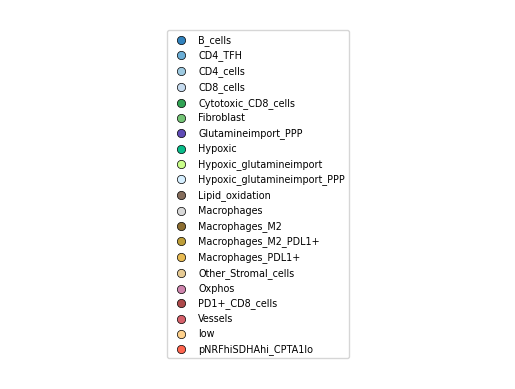

In [33]:
fig, ax = plt.subplots()

for label, color in color_dict.items():
    ax.scatter([], [], c=color, label=label, marker='o',edgecolors='black', linewidths=0.5)

ax.legend(loc='center', ncol=1, fontsize='x-small')
ax.axis('off')
plt.show()

In [34]:
scales = [2., 4., 8., 16., 24., 32., 48., 64., 72.]

## MDI results

In [32]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'Class', 'TMA core', 'Parent', 'ROI', 'x',
       'y', 'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'tumour_metatypes', 'unique_core', 'patientID', 'adjtma_PCF_repA',
       'adjtma_PCF_repB', 'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode',
       'Histology', 'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery',
       'StartDate', 'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos',
       'Granzyme B_

In [35]:
library_ids = adata.obs['unique_core'].unique().tolist()

# Define the sequence of scales
scales = [2., 4., 8., 16., 24., 32., 48., 64., 72.]

mdi_results = eco.calculate_MDI(spatial_data=adata,
                                scales=scales,
                                library_key='unique_core',
                                library_id=library_ids,
                                spatial_key='spatial',
                                cluster_key='nb_immune',
                                selecting_scale=True,
                                random_patch=False,
                                plotfigs=False,
                                savefigs=False,
                                patch_kwargs={'random_seed': None, 'min_points':2},
                                other_kwargs={'metric': 'Shannon Diversity'})

Processing region: TMA_A_A1 at scale 2.0
0.000 per cent patches are empty
TMA_A_A1 at scale 2.0 has 0 patches with zero diveristy
TMA_A_A1 at scale 2.0 diversity is 2.1200820896651336
Processing region: TMA_A_A2 at scale 2.0
0.000 per cent patches are empty
TMA_A_A2 at scale 2.0 has 0 patches with zero diveristy
TMA_A_A2 at scale 2.0 diversity is 3.166096455412374
Processing region: TMA_A_A3 at scale 2.0
0.000 per cent patches are empty
TMA_A_A3 at scale 2.0 has 0 patches with zero diveristy
TMA_A_A3 at scale 2.0 diversity is 2.0059722412189718
Processing region: TMA_A_A4 at scale 2.0
0.000 per cent patches are empty
TMA_A_A4 at scale 2.0 has 0 patches with zero diveristy
TMA_A_A4 at scale 2.0 diversity is 2.966201582191467
Processing region: TMA_A_A5 at scale 2.0
0.000 per cent patches are empty
TMA_A_A5 at scale 2.0 has 0 patches with zero diveristy
TMA_A_A5 at scale 2.0 diversity is 3.0097647289796967
Processing region: TMA_A_A6 at scale 2.0
0.000 per cent patches are empty
TMA_A_A6

In [39]:
mdi_results

2.0       4.0       8.0      16.0      24.0      32.0      48.0  \
0   -0.333333  0.208023  0.308595  0.413083  0.360373  0.274661  0.184912   
1   -0.333333 -0.142519  0.314549  0.633616  0.669162  0.622413  0.549426   
2   -0.333333  0.243331  0.209993  0.441429  0.423711  0.394413  0.326385   
3   -0.333333  0.120383  0.208582  0.638389  0.662579  0.610041  0.507681   
4   -0.333333 -0.159317  0.103697  0.620323  0.693784  0.715904  0.599961   
..        ...       ...       ...       ...       ...       ...       ...   
105 -0.333333  0.092395  0.109073  0.423711  0.457917  0.459667   0.41262   
106 -0.333333  0.134309 -0.030631  0.438361   0.49193  0.505705  0.506587   
107 -0.333333 -0.137522   0.23357  0.623042  0.666544  0.657015  0.611964   
108 -0.333333 -0.167311  0.044896  0.532868  0.588523  0.605712  0.569307   
109 -0.333333  0.193773   0.02548  0.522547  0.555161  0.528783  0.436604   

         64.0      72.0     Slope unique_core       Histology Relapse  
0    0.119998  0.087216 -0.047090    TMA_A_A1  Adenocarcinoma      No  
1    0.443409  0.429623 -0.159307    TMA_A_A2        Squamous     Yes  
2    0.265668  0.245952 -0.083366    TMA_A_A3  Adenocarcinoma     Yes  
3    0.387746   0.33596 -0.128598    TMA_A_A4  Adenocarcinoma      No  
4    0.450857  0.386738 -0.173353    TMA_A_A5        Squamous     Yes  
..        ...       ...       ...         ...             ...     ...  
105   0.30577  0.252201 -0.110832    TMA_B_J2  Adenocarcinoma     Yes  
106  0.468352  0.439221 -0.146342    TMA_B_J3  Adenocarcinoma      No  
107  0.486479  0.437643 -0.170607    TMA_B_J4  Adenocarcinoma     Yes  
108   0.51168  0.476271 -0.181227    TMA_B_J7  Adenocarcinoma      No  
109  0.353057    0.3301 -0.120092    TMA_B_J8  Adenocarcinoma     Yes  

[110 rows x 13 columns]

In [ ]:
# Add 'Condition' and 'Sample_id' to the columns
#mdi_results['Condition'] = ' '
mdi_results['unique_core'] = mdi_results.index

mdi_results

2.0       4.0       8.0      16.0      24.0      32.0  \
TMA_A_A1 -0.333333  0.208023  0.308595  0.413083  0.360373  0.274661   
TMA_A_A2 -0.333333 -0.142519  0.314549  0.633616  0.669162  0.622413   
TMA_A_A3 -0.333333  0.243331  0.209993  0.441429  0.423711  0.394413   
TMA_A_A4 -0.333333  0.120383  0.208582  0.638389  0.662579  0.610041   
TMA_A_A5 -0.333333 -0.159317  0.103697  0.620323  0.693784  0.715904   
...            ...       ...       ...       ...       ...       ...   
TMA_B_J2 -0.333333  0.092395  0.109073  0.423711  0.457917  0.459667   
TMA_B_J3 -0.333333  0.134309 -0.030631  0.438361   0.49193  0.505705   
TMA_B_J4 -0.333333 -0.137522   0.23357  0.623042  0.666544  0.657015   
TMA_B_J7 -0.333333 -0.167311  0.044896  0.532868  0.588523  0.605712   
TMA_B_J8 -0.333333  0.193773   0.02548  0.522547  0.555161  0.528783   

              48.0      64.0      72.0     Slope unique_core  
TMA_A_A1  0.184912  0.119998  0.087216 -0.047090    TMA_A_A1  
TMA_A_A2  0.549426  0.443409  0.429623 -0.159307    TMA_A_A2  
TMA_A_A3  0.326385  0.265668  0.245952 -0.083366    TMA_A_A3  
TMA_A_A4  0.507681  0.387746   0.33596 -0.128598    TMA_A_A4  
TMA_A_A5  0.599961  0.450857  0.386738 -0.173353    TMA_A_A5  
...            ...       ...       ...       ...         ...  
TMA_B_J2   0.41262   0.30577  0.252201 -0.110832    TMA_B_J2  
TMA_B_J3  0.506587  0.468352  0.439221 -0.146342    TMA_B_J3  
TMA_B_J4  0.611964  0.486479  0.437643 -0.170607    TMA_B_J4  
TMA_B_J7  0.569307   0.51168  0.476271 -0.181227    TMA_B_J7  
TMA_B_J8  0.436604  0.353057    0.3301 -0.120092    TMA_B_J8  

[110 rows x 11 columns]

In [ ]:
mdi_results

In [37]:
df1_unique = adata.obs.drop_duplicates(subset='unique_core', keep='first')

# Merge df1_unique (only unique patients) with df2 on the 'patient' column
mdi_results = pd.merge(mdi_results, df1_unique[['unique_core', 'Histology','Relapse']], on='unique_core', how='left')


# View the resulting dataframe
print(mdi_results)


          2.0       4.0       8.0      16.0      24.0      32.0      48.0  \
0   -0.333333  0.208023  0.308595  0.413083  0.360373  0.274661  0.184912   
1   -0.333333 -0.142519  0.314549  0.633616  0.669162  0.622413  0.549426   
2   -0.333333  0.243331  0.209993  0.441429  0.423711  0.394413  0.326385   
3   -0.333333  0.120383  0.208582  0.638389  0.662579  0.610041  0.507681   
4   -0.333333 -0.159317  0.103697  0.620323  0.693784  0.715904  0.599961   
..        ...       ...       ...       ...       ...       ...       ...   
105 -0.333333  0.092395  0.109073  0.423711  0.457917  0.459667   0.41262   
106 -0.333333  0.134309 -0.030631  0.438361   0.49193  0.505705  0.506587   
107 -0.333333 -0.137522   0.23357  0.623042  0.666544  0.657015  0.611964   
108 -0.333333 -0.167311  0.044896  0.532868  0.588523  0.605712  0.569307   
109 -0.333333  0.193773   0.02548  0.522547  0.555161  0.528783  0.436604   

         64.0      72.0     Slope unique_core       Histology Relapse  
0  

In [40]:
mdi_results.to_csv('./Feature_csv/metabolicnb_mdi_xbounds.csv')

###

In [41]:
df_melted = pd.melt(mdi_results, id_vars=['unique_core', 'Histology', 'Relapse'], value_vars=scales,
                    var_name='Scale', value_name='Diversity Value')
df_melted['sample'] = 'Tissue Sample'
df_melted

unique_core       Histology Relapse Scale Diversity Value         sample
0      TMA_A_A1  Adenocarcinoma      No   2.0       -0.333333  Tissue Sample
1      TMA_A_A2        Squamous     Yes   2.0       -0.333333  Tissue Sample
2      TMA_A_A3  Adenocarcinoma     Yes   2.0       -0.333333  Tissue Sample
3      TMA_A_A4  Adenocarcinoma      No   2.0       -0.333333  Tissue Sample
4      TMA_A_A5        Squamous     Yes   2.0       -0.333333  Tissue Sample
..          ...             ...     ...   ...             ...            ...
985    TMA_B_J2  Adenocarcinoma     Yes  72.0        0.252201  Tissue Sample
986    TMA_B_J3  Adenocarcinoma      No  72.0        0.439221  Tissue Sample
987    TMA_B_J4  Adenocarcinoma     Yes  72.0        0.437643  Tissue Sample
988    TMA_B_J7  Adenocarcinoma      No  72.0        0.476271  Tissue Sample
989    TMA_B_J8  Adenocarcinoma     Yes  72.0          0.3301  Tissue Sample

[990 rows x 6 columns]

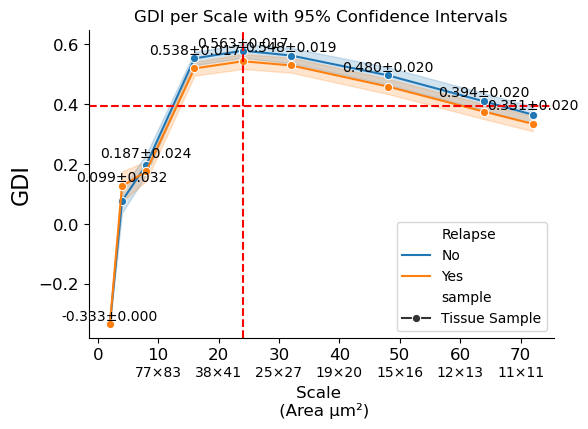

<Figure size 640x480 with 0 Axes>

In [43]:
xrange = []
yrange = []
for region in adata.obs['unique_core'].unique():
    spatial_value = adata[adata.obs['unique_core']==region].obsm['spatial']
    xrange.append(spatial_value.max(axis=0)[0] - spatial_value.min(axis=0)[0])
    yrange.append(spatial_value.max(axis=0)[1] - spatial_value.min(axis=0)[1])
mean_xrange = np.mean(xrange)
std_xrange = np.std(xrange)
mean_yrange = np.mean(yrange)
std_yrange = np.std(yrange)

# Calculate mean and confidence interval
grouped = df_melted.groupby('Scale')
mean_values = grouped['Diversity Value'].mean()
conf_intervals = grouped['Diversity Value'].apply(lambda x: stats.sem(x) * stats.t.ppf((1 + 0.95) / 2., len(x)-1))

# Plotting using sns.lineplot
plt.figure(figsize=(6, 4))
ax = sns.lineplot(data=df_melted,
                  x='Scale',
                  y='Diversity Value',
                  hue = 'Relapse',
                  style='sample',
                  markers=True,
                  estimator='mean',
                  legend = 'auto'
                  #err_style='bars',
                  #errorbar=("ci", 95),
                  #err_kws={"capsize":5.0}
                 )

# Annotating error bars with their value
for i, (scale, mean, ci) in enumerate(zip(mean_values.index, mean_values, conf_intervals)):
    ax.text(scale, mean + ci, f'{mean:.3f}±{ci:.3f}', color='black', ha='center', va='bottom')

# Drawing red dashed horizontal lines at half the maximum of x and y axes
mean_diversity_per_scale = df_melted.groupby('Scale')['Diversity Value'].mean()
y_sep = mean_diversity_per_scale.median()
x_sep = mean_diversity_per_scale.idxmax()

ax.axhline(y_sep, color='red', linestyle='--')
ax.axvline(x_sep, color='red', linestyle='--')
#ax.get_legend().remove()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('', fontsize=0)
plt.xticks(fontsize=12)
plt.ylabel(f"GDI", fontsize=16)
plt.yticks(fontsize=12)

# Add secondary x-axis
xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()][2:-1]
scales = [int(label) for label in xtick_labels if label.strip() != '']
x_sizes = [mean_xrange / scale for scale in scales]
y_sizes = [mean_yrange / scale for scale in scales]
size_labels = [f"{int(x_size)}×{int(y_size)}" for x_size, y_size in zip(x_sizes, y_sizes)]
secax = ax.secondary_xaxis(location=-0.075)
secax.set_xticks(scales)
secax.set_xticklabels(size_labels)
secax.tick_params('x', length=0)
secax.spines['bottom'].set_linewidth(0)
secax.set_xlabel(f'Scale \n (Area μm²)', fontsize=12)

plt.title(f'GDI per Scale with 95% Confidence Intervals')
plt.grid(False)
fig = plt.gcf()
plt.show()
plt.savefig('./GDI_lineplot_metabolic_relapse_xbounds.svg')

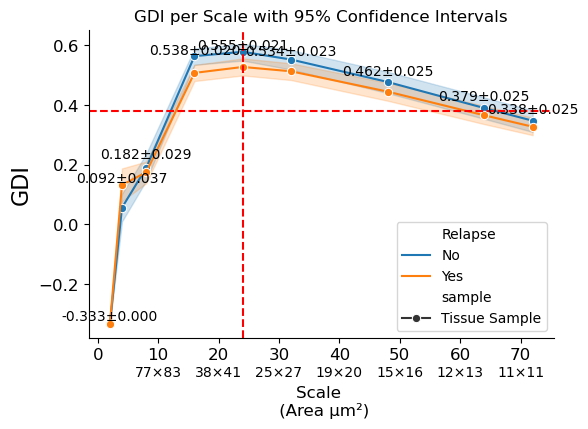

In [137]:
xrange = []
yrange = []
for region in adata.obs['unique_core'].unique():
    spatial_value = adata[adata.obs['unique_core']==region].obsm['spatial']
    xrange.append(spatial_value.max(axis=0)[0] - spatial_value.min(axis=0)[0])
    yrange.append(spatial_value.max(axis=0)[1] - spatial_value.min(axis=0)[1])
mean_xrange = np.mean(xrange)
std_xrange = np.std(xrange)
mean_yrange = np.mean(yrange)
std_yrange = np.std(yrange)

# Calculate mean and confidence interval
grouped = df_adeno.groupby('Scale')
mean_values = grouped['Diversity Value'].mean()
conf_intervals = grouped['Diversity Value'].apply(lambda x: stats.sem(x) * stats.t.ppf((1 + 0.95) / 2., len(x)-1))

# Plotting using sns.lineplot
plt.figure(figsize=(6, 4))
ax = sns.lineplot(data=df_adeno,
                  x='Scale',
                  y='Diversity Value',
                  hue = 'Relapse',
                  style='sample',
                  markers=True,
                  estimator='mean',
                  legend = 'auto'
                  #err_style='bars',
                  #errorbar=("ci", 95),
                  #err_kws={"capsize":5.0}
                 )

# Annotating error bars with their value
for i, (scale, mean, ci) in enumerate(zip(mean_values.index, mean_values, conf_intervals)):
    ax.text(scale, mean + ci, f'{mean:.3f}±{ci:.3f}', color='black', ha='center', va='bottom')

# Drawing red dashed horizontal lines at half the maximum of x and y axes
mean_diversity_per_scale = df_adeno.groupby('Scale')['Diversity Value'].mean()
y_sep = mean_diversity_per_scale.median()
x_sep = mean_diversity_per_scale.idxmax()

ax.axhline(y_sep, color='red', linestyle='--')
ax.axvline(x_sep, color='red', linestyle='--')
#ax.get_legend().remove()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('', fontsize=0)
plt.xticks(fontsize=12)
plt.ylabel(f"GDI", fontsize=16)
plt.yticks(fontsize=12)

# Add secondary x-axis
xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()][2:-1]
scales = [int(label) for label in xtick_labels if label.strip() != '']
x_sizes = [mean_xrange / scale for scale in scales]
y_sizes = [mean_yrange / scale for scale in scales]
size_labels = [f"{int(x_size)}×{int(y_size)}" for x_size, y_size in zip(x_sizes, y_sizes)]
secax = ax.secondary_xaxis(location=-0.075)
secax.set_xticks(scales)
secax.set_xticklabels(size_labels)
secax.tick_params('x', length=0)
secax.spines['bottom'].set_linewidth(0)
secax.set_xlabel(f'Scale \n (Area μm²)', fontsize=12)

plt.title(f'GDI per Scale with 95% Confidence Intervals')
plt.grid(False)
fig = plt.gcf()
plt.savefig('./GDI_lineplot_metabolic_relapse_xbounds_adeno.svg')

plt.show()


In [133]:
df_melted

unique_core       Histology Relapse Scale  Diversity Value         sample
0      TMA_A_A1  Adenocarcinoma      No   2.0        -0.333333  Tissue Sample
1      TMA_A_A2        Squamous     Yes   2.0        -0.333333  Tissue Sample
2      TMA_A_A3  Adenocarcinoma     Yes   2.0        -0.333333  Tissue Sample
3      TMA_A_A4  Adenocarcinoma      No   2.0        -0.333333  Tissue Sample
4      TMA_A_A5        Squamous     Yes   2.0        -0.333333  Tissue Sample
..          ...             ...     ...   ...              ...            ...
985    TMA_B_J2  Adenocarcinoma     Yes  72.0         0.252201  Tissue Sample
986    TMA_B_J3  Adenocarcinoma      No  72.0         0.439221  Tissue Sample
987    TMA_B_J4  Adenocarcinoma     Yes  72.0         0.437643  Tissue Sample
988    TMA_B_J7  Adenocarcinoma      No  72.0         0.476271  Tissue Sample
989    TMA_B_J8  Adenocarcinoma     Yes  72.0         0.330100  Tissue Sample

[990 rows x 6 columns]

In [135]:
df_adeno = df_melted[df_melted['Histology'].isin(['Adenocarcinoma'])]

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


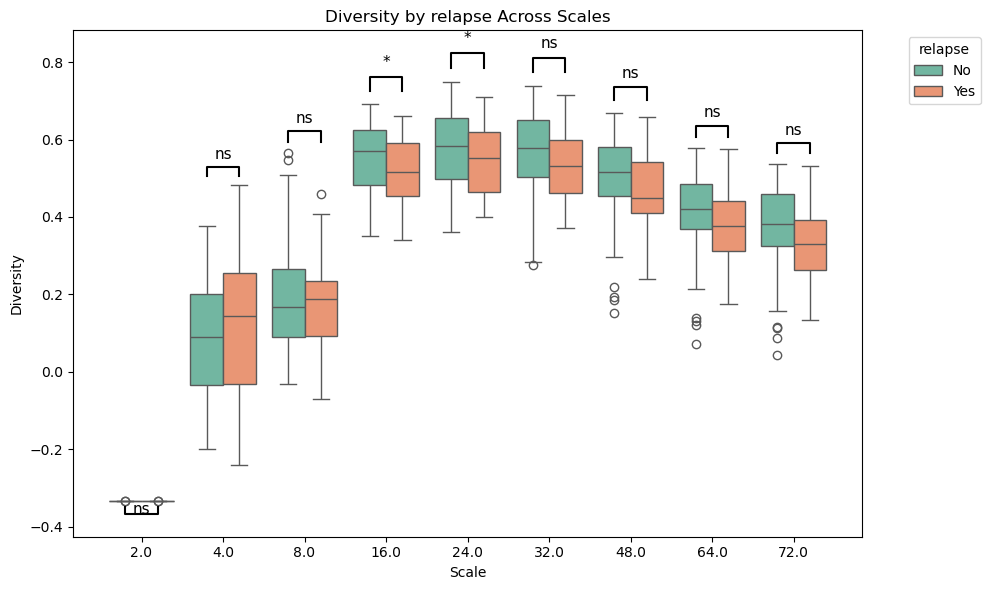

<Figure size 640x480 with 0 Axes>

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_melted, x='Scale', y='Diversity Value', hue='Relapse', palette='Set2')
df_melted['Diversity Value'] = pd.to_numeric(df_melted['Diversity Value'], errors='coerce')
# Run t-test and annotate for each scale
for i, scale in enumerate(sorted(df_melted['Scale'].unique())):
    sub = df_melted[df_melted['Scale'] == scale]
    groups = sub['Relapse'].unique()
    
    # Only do the test if there are exactly two groups
    if len(groups) == 2:
        try:
            group1 = sub[sub['Relapse'] == groups[0]]['Diversity Value']
            group2 = sub[sub['Relapse'] == groups[1]]['Diversity Value']
            # Ensure 'diversity' is numeric
            

            stat, pval = ttest_ind(group1, group2)

            # Annotate plot
            y_max = max(group1.max(), group2.max())
            height = y_max * 0.05
            x1 = i - 0.2  # left box
            x2 = i + 0.2  # right box

            ax.plot([x1, x1, x2, x2], [y_max + height, y_max + 2*height, y_max + 2*height, y_max + height], c='black')

            if pval < 0.001:
                text = '***'
            elif pval < 0.01:
                text = '**'
            elif pval < 0.05:
                text = '*'
            else:
                text = 'ns'

            ax.text(i, y_max + 2.5*height, text, ha='center', va='bottom', fontsize=11)

        except Exception as e:
            print(f"Skipped scale {scale} due to error: {e}")

# Final formatting
plt.title("Diversity by relapse Across Scales")
plt.ylabel("Diversity")
plt.xlabel("Scale")
plt.legend(title='relapse', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('./GDI_scale_relapse_metabolic_xbound.svg')

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


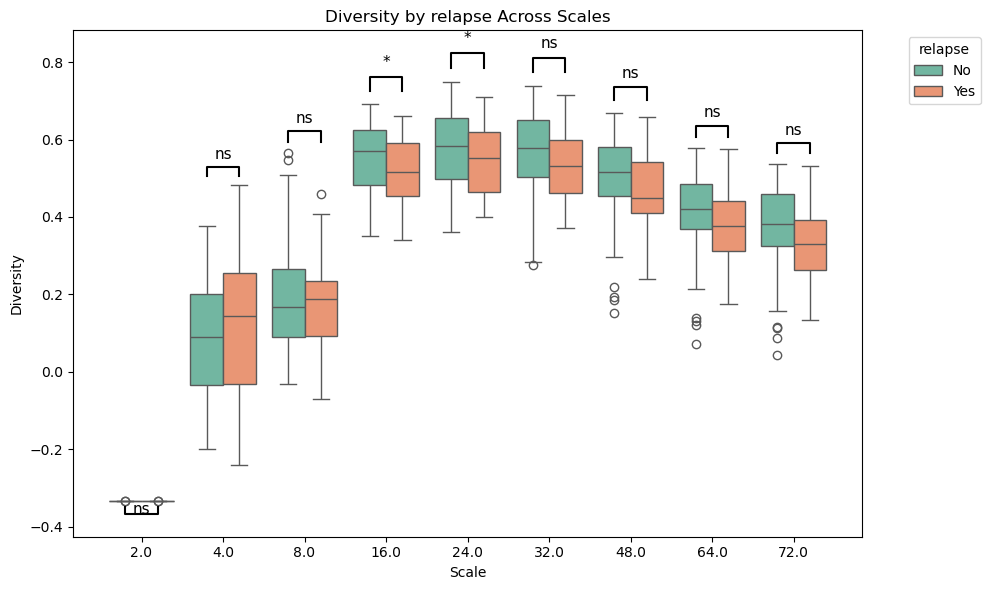

<Figure size 640x480 with 0 Axes>

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_melted, x='Scale', y='Diversity Value', hue='Relapse', palette='Set2')
df_melted['Diversity Value'] = pd.to_numeric(df_melted['Diversity Value'], errors='coerce')
# Run t-test and annotate for each scale
for i, scale in enumerate(sorted(df_melted['Scale'].unique())):
    sub = df_melted[df_melted['Scale'] == scale]
    groups = sub['Relapse'].unique()
    
    # Only do the test if there are exactly two groups
    if len(groups) == 2:
        try:
            group1 = sub[sub['Relapse'] == groups[0]]['Diversity Value']
            group2 = sub[sub['Relapse'] == groups[1]]['Diversity Value']
            # Ensure 'diversity' is numeric
            

            stat, pval = ttest_ind(group1, group2)

            # Annotate plot
            y_max = max(group1.max(), group2.max())
            height = y_max * 0.05
            x1 = i - 0.2  # left box
            x2 = i + 0.2  # right box

            ax.plot([x1, x1, x2, x2], [y_max + height, y_max + 2*height, y_max + 2*height, y_max + height], c='black')

            if pval < 0.001:
                text = '***'
            elif pval < 0.01:
                text = '**'
            elif pval < 0.05:
                text = '*'
            else:
                text = 'ns'

            ax.text(i, y_max + 2.5*height, text, ha='center', va='bottom', fontsize=11)

        except Exception as e:
            print(f"Skipped scale {scale} due to error: {e}")

# Final formatting
plt.title("Diversity by relapse Across Scales")
plt.ylabel("Diversity")
plt.xlabel("Scale")
plt.legend(title='relapse', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('./GDI_scale_relapse_metabolic_xbound.svg')

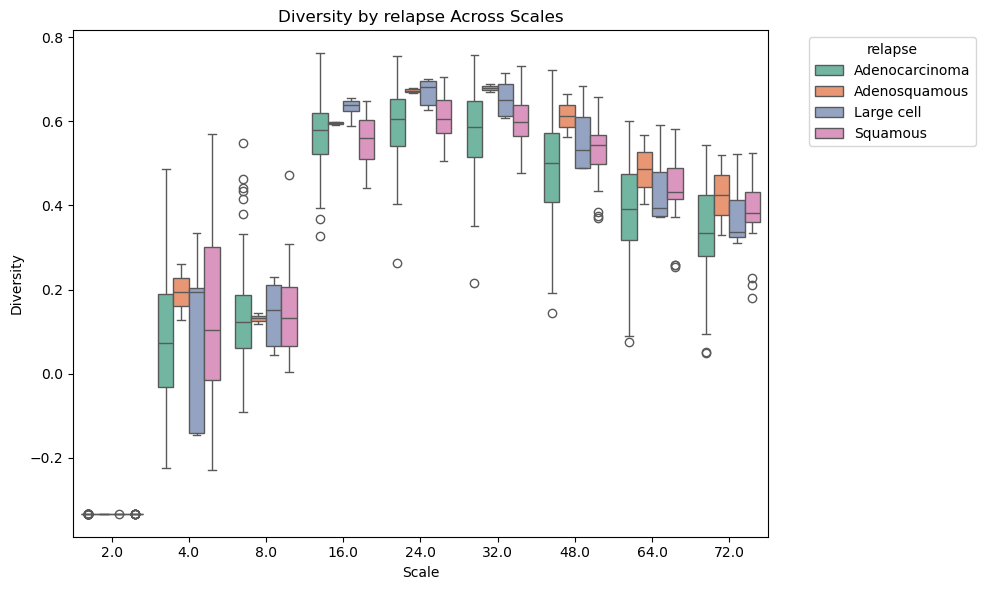

<Figure size 640x480 with 0 Axes>

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_melted, x='Scale', y='Diversity Value', hue='Histology', palette='Set2')
df_melted['Diversity Value'] = pd.to_numeric(df_melted['Diversity Value'], errors='coerce')
# Run t-test and annotate for each scale
for i, scale in enumerate(sorted(df_melted['Scale'].unique())):
    sub = df_melted[df_melted['Scale'] == scale]
    groups = sub['Histology'].unique()
    
    # Only do the test if there are exactly two groups
    if len(groups) == 2:
        try:
            group1 = sub[sub['Histology'] == groups[0]]['Diversity Value']
            group2 = sub[sub['Histology'] == groups[1]]['Diversity Value']
            # Ensure 'diversity' is numeric
            

            stat, pval = ttest_ind(group1, group2)

            # Annotate plot
            y_max = max(group1.max(), group2.max())
            height = y_max * 0.05
            x1 = i - 0.2  # left box
            x2 = i + 0.2  # right box

            ax.plot([x1, x1, x2, x2], [y_max + height, y_max + 2*height, y_max + 2*height, y_max + height], c='black')

            if pval < 0.001:
                text = '***'
            elif pval < 0.01:
                text = '**'
            elif pval < 0.05:
                text = '*'
            else:
                text = 'ns'

            ax.text(i, y_max + 2.5*height, text, ha='center', va='bottom', fontsize=11)

        except Exception as e:
            print(f"Skipped scale {scale} due to error: {e}")

# Final formatting
plt.title("Diversity by relapse Across Scales")
plt.ylabel("Diversity")
plt.xlabel("Scale")
plt.legend(title='relapse', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('./Metabolic_entropy/GDI_scale_histology_metabolic.svg')

## GDI results

In [46]:
library_ids = adata.obs['unique_core'].unique().tolist()

In [47]:
gdi_results = eco.calculate_GDI(spatial_data=adata,
                                scale=32.0,
                                library_key='unique_core',
                                library_id=library_ids,
                                spatial_key='spatial',
                                cluster_key='nb_immune',
                                hotspot=True,
                                restricted=False,
                                metric='Shannon Diversity')
gdi_results

Processing region: TMA_A_A1 at scale 32.0
17.480 per cent patches are empty
Processing region: TMA_A_A2 at scale 32.0
20.996 per cent patches are empty
Processing region: TMA_A_A3 at scale 32.0
16.992 per cent patches are empty
Processing region: TMA_A_A4 at scale 32.0
19.727 per cent patches are empty
Processing region: TMA_A_A5 at scale 32.0
17.090 per cent patches are empty
Processing region: TMA_A_A6 at scale 32.0
17.188 per cent patches are empty
Processing region: TMA_A_A7 at scale 32.0
18.945 per cent patches are empty
Processing region: TMA_A_B2 at scale 32.0
19.238 per cent patches are empty
Processing region: TMA_A_B3 at scale 32.0
19.141 per cent patches are empty
Processing region: TMA_A_B4 at scale 32.0
17.090 per cent patches are empty
Processing region: TMA_A_B5 at scale 32.0
17.578 per cent patches are empty
Processing region: TMA_A_B6 at scale 32.0
17.383 per cent patches are empty
Processing region: TMA_A_B7 at scale 32.0
17.188 per cent patches are empty
Processing r

GDI
TMA_A_A1  0.274661
TMA_A_A2  0.622413
TMA_A_A3  0.394413
TMA_A_A4  0.610041
TMA_A_A5  0.715904
...            ...
TMA_B_J2  0.459667
TMA_B_J3  0.505705
TMA_B_J4  0.657015
TMA_B_J7  0.605712
TMA_B_J8  0.528783

[110 rows x 1 columns]

In [50]:
gdi_results['unique_core'] = gdi_results.index

In [53]:
gdi_results

GDI unique_core  Surv_status  Surv_Followup  Relapse_status  \
0    0.274661    TMA_A_A1          0.0         1968.0             0.0   
1    0.622413    TMA_A_A2          0.0         1662.0             1.0   
2    0.394413    TMA_A_A3          1.0         1025.0             1.0   
3    0.610041    TMA_A_A4          0.0         1204.0             0.0   
4    0.715904    TMA_A_A5          0.0         1172.0             1.0   
..        ...         ...          ...            ...             ...   
105  0.459667    TMA_B_J2          1.0         2602.0             1.0   
106  0.505705    TMA_B_J3          0.0          995.0             0.0   
107  0.657015    TMA_B_J4          1.0          407.0             1.0   
108  0.605712    TMA_B_J7          0.0         2558.0             0.0   
109  0.528783    TMA_B_J8          1.0          530.0             1.0   

    Relapse_followup  
0               1968  
1                234  
2                233  
3               1204  
4                907  
..               ...  
105             2262  
106              995  
107              214  
108             2558  
109              416  

[110 rows x 6 columns]

In [67]:
df1_unique.columns

Index(['Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y',
       'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB',
       'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology',
       'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate',
       'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       'FOXP3_pos', 'Ki67_pos', 'Gra

In [52]:
gdi_results = pd.merge(gdi_results, df1_unique[['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup']], on='unique_core', how='left')

In [55]:
gdi_results = pd.merge(gdi_results, df1_unique[['unique_core', 'Histology','Relapse']], on='unique_core', how='left')


# View the resulting dataframe
print(gdi_results)

          GDI unique_core  Surv_status  Surv_Followup  Relapse_status  \
0    0.274661    TMA_A_A1          0.0         1968.0             0.0   
1    0.622413    TMA_A_A2          0.0         1662.0             1.0   
2    0.394413    TMA_A_A3          1.0         1025.0             1.0   
3    0.610041    TMA_A_A4          0.0         1204.0             0.0   
4    0.715904    TMA_A_A5          0.0         1172.0             1.0   
..        ...         ...          ...            ...             ...   
105  0.459667    TMA_B_J2          1.0         2602.0             1.0   
106  0.505705    TMA_B_J3          0.0          995.0             0.0   
107  0.657015    TMA_B_J4          1.0          407.0             1.0   
108  0.605712    TMA_B_J7          0.0         2558.0             0.0   
109  0.528783    TMA_B_J8          1.0          530.0             1.0   

    Relapse_followup       Histology Relapse  
0               1968  Adenocarcinoma      No  
1                234        S

In [56]:
gdi_results.to_csv('./gdi_results_metabolic_xbounds.csv')

### GDI plots

has p value of 0.07734401067393257


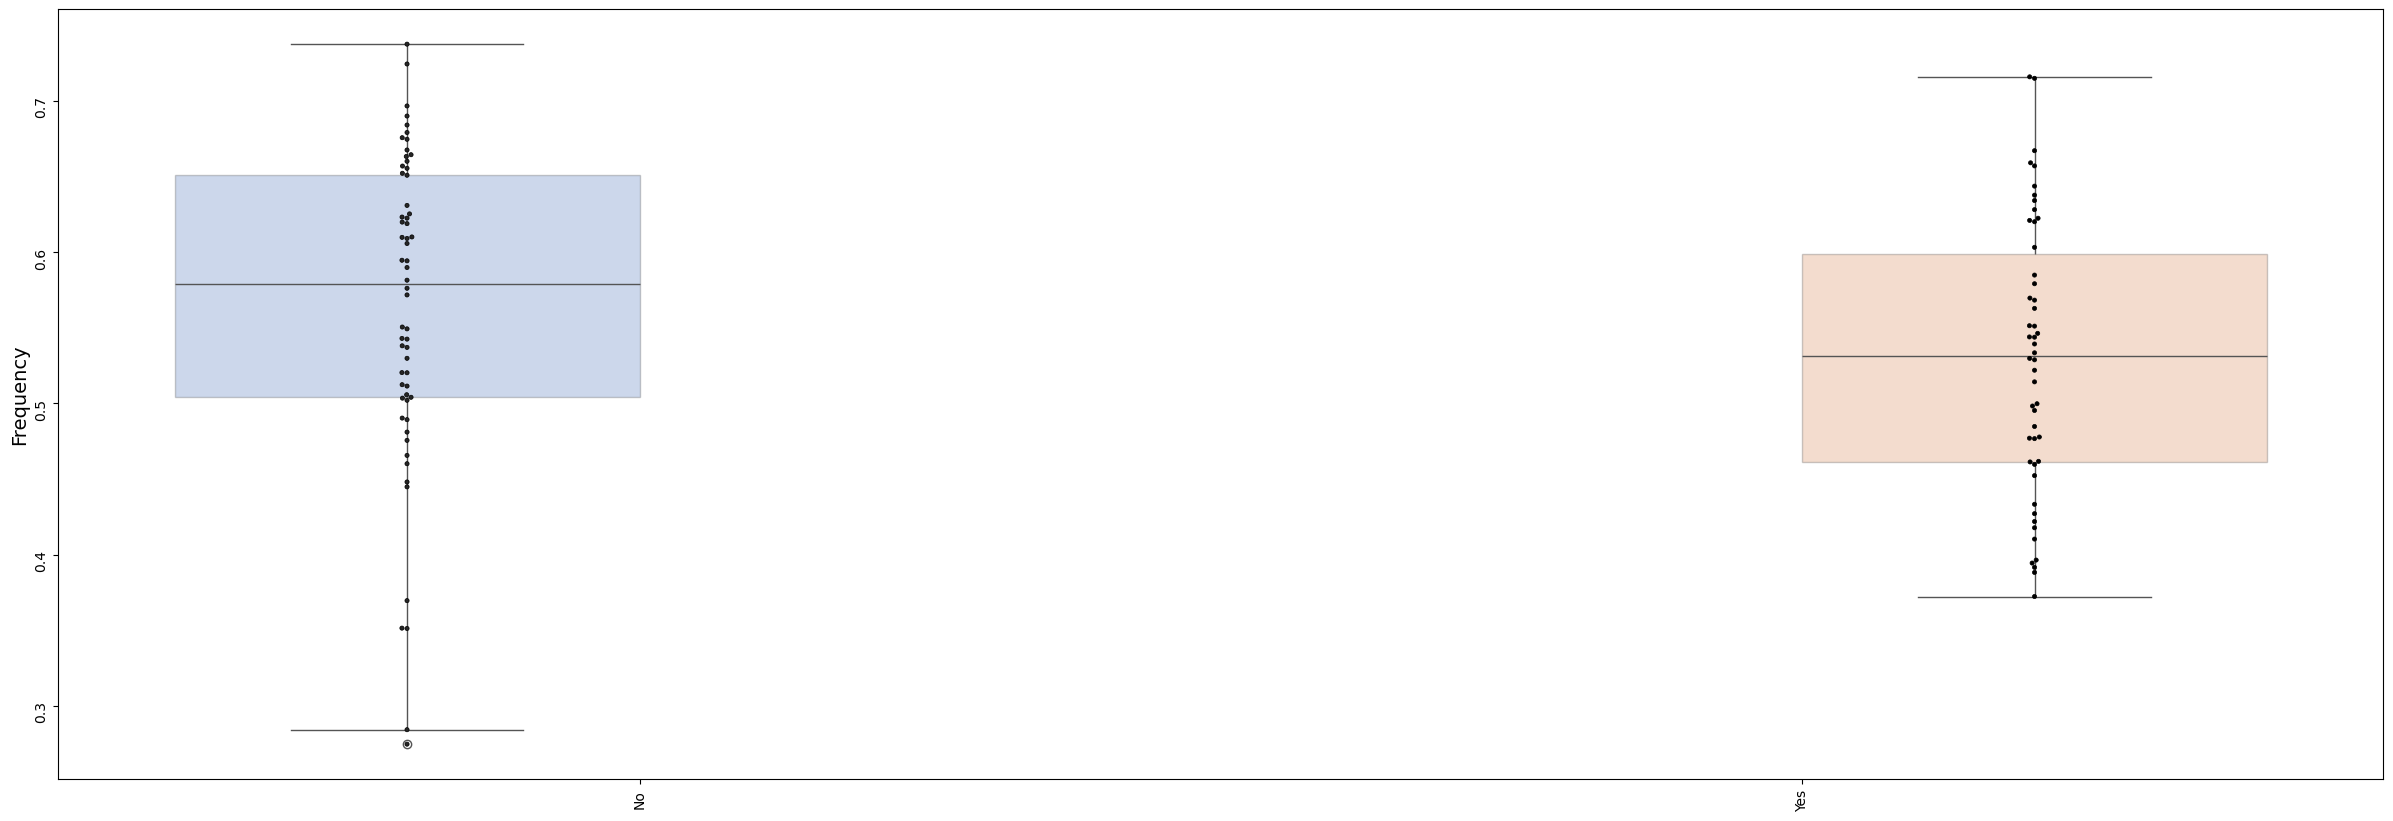

In [57]:
group1 = gdi_results[(gdi_results['Relapse'] == 'Yes')]['GDI']
group2 = gdi_results[(gdi_results['Relapse'] == 'No')]['GDI']
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print(f"has p value of {p_value}")
#selected_p_values.append(p_value)

# Plot the filtered data
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=gdi_results, x='Relapse', y='GDI', hue='Relapse', palette='muted', boxprops=dict(alpha=.3), ax=ax, dodge=True)
sns.swarmplot(data=gdi_results, x='Relapse', y='GDI', hue='Relapse', palette='dark:black', size=3.0, dodge=True, ax=ax, edgecolor='auto', linewidth=0.5)



ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()
#plt.savefig('hotspot_coocurrence.svg')
plt.close(fig)

In [58]:
group1 = gdi_results[(gdi_results['Relapse'] == 'Yes')&(gdi_results['Histology'] == 'Squamous')]['GDI']
group2 = gdi_results[(gdi_results['Relapse'] == 'No')&(gdi_results['Histology'] == 'Squamous')]['GDI']
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print(f"has p value of {p_value}")

has p value of 0.37814070366074204


In [61]:
group1 = gdi_results[(gdi_results['Relapse'] == 'Yes')&(gdi_results['Histology'] == 'Adenocarcinoma')]['GDI']
group2 = gdi_results[(gdi_results['Relapse'] == 'No')&(gdi_results['Histology'] == 'Adenocarcinoma')]['GDI']
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print(f"has p value of {p_value}")

has p value of 0.08289633894438207


In [59]:
group1 = gdi_results[(gdi_results['Histology'] == 'Adenocarcinoma')]['GDI']
group2 = gdi_results[(gdi_results['Histology'] == 'Squamous')]['GDI']
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print(f"has p value of {p_value}")

has p value of 0.08157879544581681


has p value of 0.08289633894438207


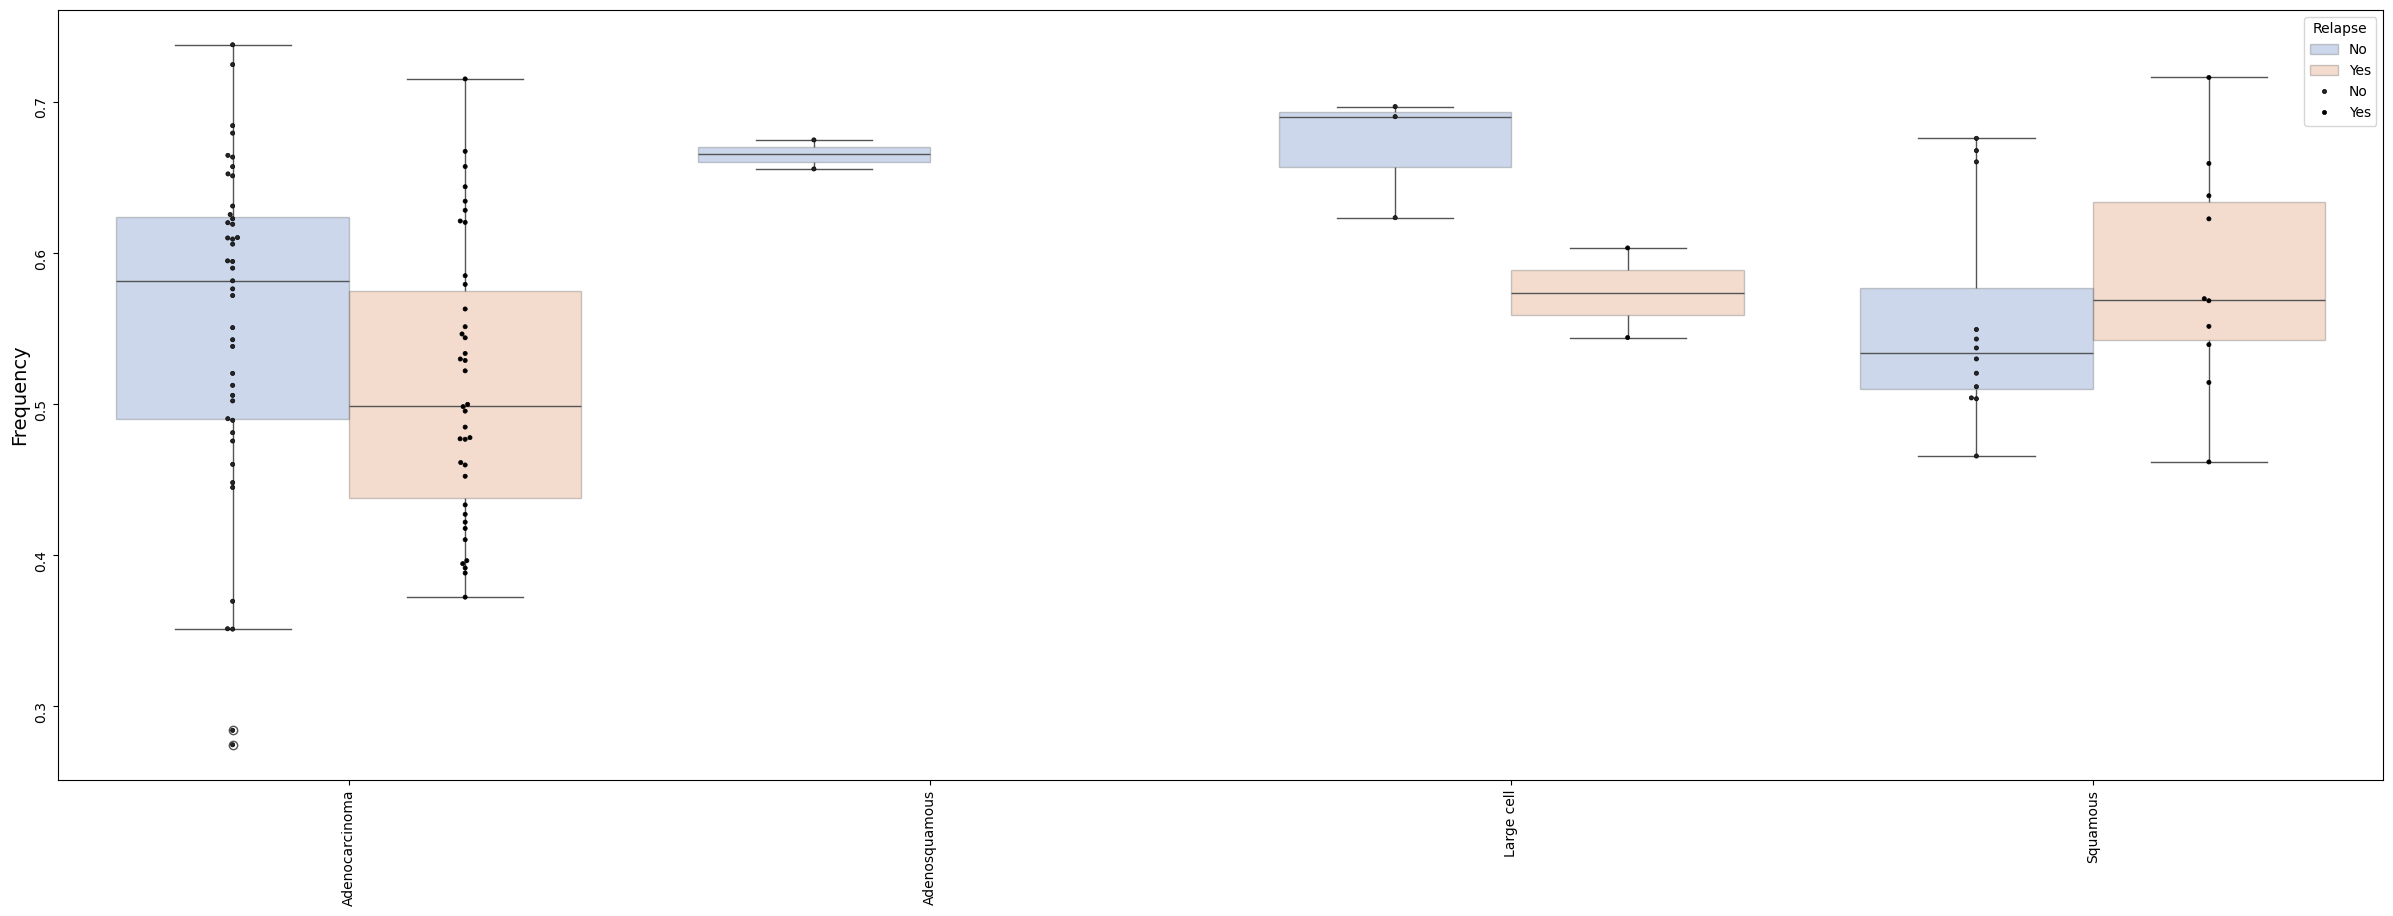

<Figure size 640x480 with 0 Axes>

In [60]:
# Histology
group1 = gdi_results[(gdi_results['Relapse'] == 'Yes')&(gdi_results['Histology'] == 'Adenocarcinoma')]['GDI']
group2 = gdi_results[(gdi_results['Relapse'] == 'No')&(gdi_results['Histology'] == 'Adenocarcinoma')]['GDI']
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print(f"has p value of {p_value}")
#selected_p_values.append(p_value)

# Plot the filtered data
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=gdi_results, x='Histology', y='GDI', hue='Relapse', palette='muted', boxprops=dict(alpha=.3), ax=ax, dodge=True)
sns.swarmplot(data=gdi_results, x='Histology', y='GDI', hue='Relapse', palette='dark:black', size=3.0, dodge=True, ax=ax, edgecolor='auto', linewidth=0.5)



ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()
plt.savefig('GDI_relapse.svg')
plt.close(fig)

## DPI results

In [62]:
adata

AnnData object with n_obs × n_vars = 1187511 × 48
    obs: 'Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y', 'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity', 'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type', 'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy', 'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB', 'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology', 'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate', 'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse', 'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status', 'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion', 'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc', 'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos', 'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos', 'FOXP3_pos', 'Ki67_pos', 'Granzyme_B_pos', 'G6PD_pos', 'pNRF2_pos', 

In [63]:
# Calculate DPI for hotspots
dpi_results = eco.calculate_DPI(spatial_data=adata,
                                scale=32.0,
                                library_key='unique_core',
                                library_id=library_ids,
                                spatial_key='spatial',
                                cluster_key='nb_immune',
                                hotspot=True,
                                metric='Shannon Diversity')
dpi_results

Processing region: TMA_A_A1 at scale 32.0
17.480 per cent patches are empty
Using MoranI
Region TMA_A_A1 contains 47 diversity hotspots
9 islands identified
Processing region: TMA_A_A2 at scale 32.0
20.996 per cent patches are empty
Using MoranI
Region TMA_A_A2 contains 113 diversity hotspots
14 islands identified
Processing region: TMA_A_A3 at scale 32.0
16.992 per cent patches are empty
Using MoranI
Region TMA_A_A3 contains 84 diversity hotspots
7 islands identified
Processing region: TMA_A_A4 at scale 32.0
19.727 per cent patches are empty
Using MoranI
Region TMA_A_A4 contains 67 diversity hotspots
18 islands identified
Processing region: TMA_A_A5 at scale 32.0
17.090 per cent patches are empty
Using MoranI
Region TMA_A_A5 contains 79 diversity hotspots
16 islands identified
Processing region: TMA_A_A6 at scale 32.0
17.188 per cent patches are empty
Using MoranI
Region TMA_A_A6 contains 123 diversity hotspots
14 islands identified
Processing region: TMA_A_A7 at scale 32.0
18.945 per

DPI
TMA_A_A1  15.819969
TMA_A_A2  71.240969
TMA_A_A3  37.281424
TMA_A_A4  26.132810
TMA_A_A5  47.757752
...             ...
TMA_B_J2  17.352671
TMA_B_J3  79.569515
TMA_B_J4  44.458465
TMA_B_J7  50.385984
TMA_B_J8  36.533809

[110 rows x 1 columns]

In [64]:
dpi_results

DPI
TMA_A_A1  15.819969
TMA_A_A2  71.240969
TMA_A_A3  37.281424
TMA_A_A4  26.132810
TMA_A_A5  47.757752
...             ...
TMA_B_J2  17.352671
TMA_B_J3  79.569515
TMA_B_J4  44.458465
TMA_B_J7  50.385984
TMA_B_J8  36.533809

[110 rows x 1 columns]

In [65]:
dpi_results['unique_core'] = dpi_results.index

In [66]:
dpi_results_32= dpi_results

<Axes: xlabel='Surv_Followup', ylabel='DPI'>

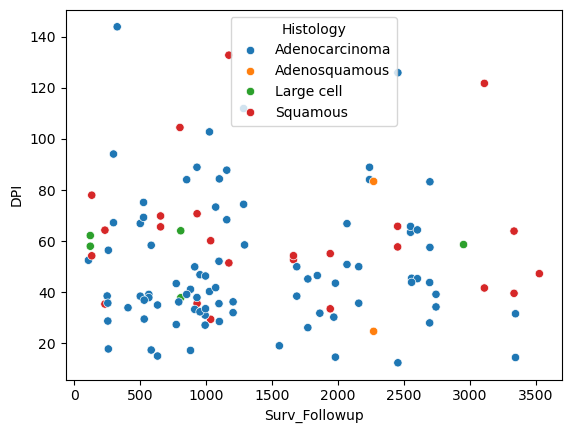

In [90]:
sns.scatterplot(data=dpi_results, x='Surv_Followup', y='DPI', hue='Histology', size=None, style=None, palette=None, hue_order=None, hue_norm=None,
                    sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None)

In [70]:
dpi_results.to_csv('dpi_32_metabolic_xbounds.csv')

In [67]:
dpi_results = pd.merge(dpi_results, df1_unique[['unique_core', 'Histology','Relapse']], on='unique_core', how='left')


# View the resulting dataframe
print(dpi_results)

           DPI unique_core       Histology Relapse
0    15.819969    TMA_A_A1  Adenocarcinoma      No
1    71.240969    TMA_A_A2        Squamous     Yes
2    37.281424    TMA_A_A3  Adenocarcinoma     Yes
3    26.132810    TMA_A_A4  Adenocarcinoma      No
4    47.757752    TMA_A_A5        Squamous     Yes
..         ...         ...             ...     ...
105  17.352671    TMA_B_J2  Adenocarcinoma     Yes
106  79.569515    TMA_B_J3  Adenocarcinoma      No
107  44.458465    TMA_B_J4  Adenocarcinoma     Yes
108  50.385984    TMA_B_J7  Adenocarcinoma      No
109  36.533809    TMA_B_J8  Adenocarcinoma     Yes

[110 rows x 4 columns]


In [67]:
df1_unique.columns

Index(['Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y',
       'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB',
       'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology',
       'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate',
       'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       'FOXP3_pos', 'Ki67_pos', 'Gra

In [82]:
dpi_results = pd.merge(dpi_results, df1_unique[['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup']], on='unique_core', how='left')

In [ ]:
# Calculate DPI for hotspots
#dpi_results = eco.calculate_DPI(spatial_data=adata,
#                                scale=32.0,
#                                library_key='unique_core',
#                                library_id=library_ids,
#                                spatial_key='spatial',
#                                cluster_key='CT_final',
#                                hotspot=True,
#                                metric='Shannon Diversity')
#dpi_results

In [69]:
global_cellfreq_df, global_co_occurrence_df = eco.spot_cellfreq(spatial_data=adata,
                                                                scale=32.0,
                                                                library_key='unique_core',
                                                                library_id=library_ids,
                                                                spatial_key='spatial',
                                                                cluster_key='nb_immune',
                                                                spots='global',
                                                                top=None,
                                                                selected_comb=None,
                                                                restricted=False,
                                                                metric='Shannon Diversity')

Processing region: TMA_A_A1 at scale 32.0


/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/mesa/ecospatial/_ecospatial.py:1281: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  global_cell_count = spatial_df.groupby([library_key, cluster_key]).size().unstack(fill_value=0)


17.480 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: TMA_A_A2 at scale 32.0
20.996 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: TMA_A_A3 at scale 32.0
16.992 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: TMA_A_A4 at scale 32.0
19.727 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: TMA_A_A5 at scale 32.0
17.090 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: TMA_A_A6 at scale 32.0
17.188 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: TMA_A_A7 at scale 32.0
18.945 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: TMA_A_B2 at scale 32.0
19.238 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: TMA_A_B3 at scale 32.0
19.141 per cent patches are empty
Using MoranI
Considering whole tissue
Processing regio

### Global cell FREQUENCY 

In [76]:
global_cellfreq_df_avg.to_csv('global_cellfreq_df_metabolic_xbound.csv')

In [129]:

global_cellfreq_df = pd.read_csv('./Metabolic_entropy/global_cellfreq_df_metabolic.csv')

In [72]:
# Compute averages by every patients
global_cellfreq_df_avg = global_cellfreq_df.groupby(by="unique_core").mean().reset_index()

/tmp/ipykernel_30046/1978782851.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  global_cellfreq_df_avg = global_cellfreq_df.groupby(by="unique_core").mean().reset_index()


In [74]:
global_cellfreq_df_avg

nb_immune unique_core   B_cells   CD4_TFH  CD4_cells  CD8_cells  \
0            TMA_A_A1  0.000212  0.000000   0.047034   0.025424   
1            TMA_A_A2  0.058828  0.010897   0.057249   0.074463   
2            TMA_A_A3  0.004581  0.006386   0.123837   0.011106   
3            TMA_A_A4  0.002923  0.039609   0.321306   0.016730   
4            TMA_A_A5  0.125716  0.021844   0.199954   0.026044   
..                ...       ...       ...        ...        ...   
105          TMA_B_J2  0.000636  0.000000   0.016265   0.018264   
106          TMA_B_J3  0.001560  0.000520   0.108082   0.058089   
107          TMA_B_J4  0.002006  0.000231   0.043059   0.150783   
108          TMA_B_J7  0.084385  0.001865   0.185559   0.058433   
109          TMA_B_J8  0.020341  0.000394   0.058924   0.065945   

nb_immune  Cytotoxic_CD8_cells  Fibroblast  Glutamineimport_PPP   Hypoxic  \
0                     0.000212    0.109534             0.000000  0.000000   
1                     0.000474    0.071462             0.000000  0.021557   
2                     0.000000    0.073858             0.000000  0.000000   
3                     0.000504    0.167204             0.044144  0.000000   
4                     0.000000    0.113649             0.000000  0.000000   
..                         ...         ...                  ...       ...   
105                   0.000000    0.099500             0.003544  0.001545   
106                   0.000669    0.015525             0.033873  0.000000   
107                   0.000077    0.119222             0.002161  0.000000   
108                   0.000274    0.036925             0.000055  0.000000   
109                   0.000000    0.036614             0.473097  0.000000   

nb_immune  Hypoxic_glutamineimport  ...  Macrophages  Macrophages_M2  \
0                         0.000000  ...     0.054237        0.001059   
1                         0.014766  ...     0.085597        0.014371   
2                         0.000694  ...     0.034847        0.011662   
3                         0.000000  ...     0.038500        0.017335   
4                         0.000000  ...     0.058581        0.029405   
..                             ...  ...          ...             ...   
105                       0.024807  ...     0.102317        0.004453   
106                       0.263780  ...     0.052964        0.082157   
107                       0.000000  ...     0.147156        0.043908   
108                       0.000000  ...     0.152255        0.018490   
109                       0.000000  ...     0.023163        0.009580   

nb_immune  Macrophages_M2_PDL1+  Macrophages_PDL1+  Other_Stromal_cells  \
0                      0.000212           0.000424             0.078602   
1                      0.000474           0.000553             0.217625   
2                      0.004720           0.006803             0.062752   
3                      0.033663           0.042028             0.134046   
4                      0.004583           0.007179             0.208585   
..                          ...                ...                  ...   
105                    0.000000           0.000000             0.091322   
106                    0.064998           0.016268             0.032833   
107                    0.008797           0.018597             0.186048   
108                    0.005212           0.022660             0.078679   
109                    0.000131           0.000131             0.082021   

nb_immune    Oxphos  PD1+_CD8_cells   Vessels       low  pNRFhiSDHAhi_CPTA1lo  
0          0.567797        0.000000  0.073093  0.042161              0.000000  
1          0.006001        0.018399  0.105575  0.036481              0.153032  
2          0.000139        0.006942  0.039706  0.609746              0.002221  
3          0.001209        0.034771  0.013707  0.092320              0.000000  
4          0.000000        0.024288  0.049110  0.131062              0.000000  
..              ...     

In [75]:
global_cellfreq_df_avg = pd.merge(global_cellfreq_df_avg, df1_unique[['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'Histology', 'Relapse']], on='unique_core', how='left')

In [79]:
# Melt the dataframe for easier plotting and statistical analysis
global_cellfreq_df_melt = global_cellfreq_df_avg.reset_index().melt(id_vars=['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'Histology', 'Relapse'])
global_cellfreq_df_melt.columns = ['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'Histology', 'Relapse','cell_type', 'Frequency' ]

global_cellfreq_df_melt

unique_core  Surv_status  Surv_Followup  Relapse_status Relapse_followup  \
0       TMA_A_A1          0.0         1968.0             0.0             1968   
1       TMA_A_A2          0.0         1662.0             1.0              234   
2       TMA_A_A3          1.0         1025.0             1.0              233   
3       TMA_A_A4          0.0         1204.0             0.0             1204   
4       TMA_A_A5          0.0         1172.0             1.0              907   
...          ...          ...            ...             ...              ...   
2415    TMA_B_J2          1.0         2602.0             1.0             2262   
2416    TMA_B_J3          0.0          995.0             0.0              995   
2417    TMA_B_J4          1.0          407.0             1.0              214   
2418    TMA_B_J7          0.0         2558.0             0.0             2558   
2419    TMA_B_J8          1.0          530.0             1.0              416   

           Histology Relapse             cell_type  Frequency  
0     Adenocarcinoma      No                 index   0.000000  
1           Squamous     Yes                 index   1.000000  
2     Adenocarcinoma     Yes                 index   2.000000  
3     Adenocarcinoma      No                 index   3.000000  
4           Squamous     Yes                 index   4.000000  
...              ...     ...                   ...        ...  
2415  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.415993  
2416  Adenocarcinoma      No  pNRFhiSDHAhi_CPTA1lo   0.019834  
2417  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.000000  
2418  Adenocarcinoma      No  pNRFhiSDHAhi_CPTA1lo   0.000110  
2419  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.000000  

[2420 rows x 9 columns]

In [80]:
global_cellfreq_df_melt= global_cellfreq_df_melt[~global_cellfreq_df_melt.cell_type.str.contains("index")]

In [81]:
global_cellfreq_df_melt

unique_core  Surv_status  Surv_Followup  Relapse_status Relapse_followup  \
110     TMA_A_A1          0.0         1968.0             0.0             1968   
111     TMA_A_A2          0.0         1662.0             1.0              234   
112     TMA_A_A3          1.0         1025.0             1.0              233   
113     TMA_A_A4          0.0         1204.0             0.0             1204   
114     TMA_A_A5          0.0         1172.0             1.0              907   
...          ...          ...            ...             ...              ...   
2415    TMA_B_J2          1.0         2602.0             1.0             2262   
2416    TMA_B_J3          0.0          995.0             0.0              995   
2417    TMA_B_J4          1.0          407.0             1.0              214   
2418    TMA_B_J7          0.0         2558.0             0.0             2558   
2419    TMA_B_J8          1.0          530.0             1.0              416   

           Histology Relapse             cell_type  Frequency  
110   Adenocarcinoma      No               B_cells   0.000212  
111         Squamous     Yes               B_cells   0.058828  
112   Adenocarcinoma     Yes               B_cells   0.004581  
113   Adenocarcinoma      No               B_cells   0.002923  
114         Squamous     Yes               B_cells   0.125716  
...              ...     ...                   ...        ...  
2415  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.415993  
2416  Adenocarcinoma      No  pNRFhiSDHAhi_CPTA1lo   0.019834  
2417  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.000000  
2418  Adenocarcinoma      No  pNRFhiSDHAhi_CPTA1lo   0.000110  
2419  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.000000  

[2310 rows x 9 columns]

In [82]:
# save file 
global_cellfreq_df_melt.to_csv('global_cellfreq_df_metabolic_melt.csv')

In [137]:
global_cellfreq_df_melt.to_csv('./Metabolic_entropy/global_cellfreq_df_metabolic_melt.csv')

### Global cell CO-OCCURRENCE

In [83]:
global_co_occurrence_df

B_cells                                                     \
           CD4_TFH CD4_cells CD8_cells Cytotoxic_CD8_cells Fibroblast   
TMA_A_A1  0.000000  0.000000  0.000000            0.000000   0.001183   
TMA_A_A2  0.044499  0.113721  0.121137            0.002472   0.090235   
TMA_A_A3  0.007059  0.017647  0.005882            0.000000   0.005882   
TMA_A_A4  0.020681  0.025547  0.006083            0.000000   0.014599   
TMA_A_A5  0.094229  0.310954  0.153121            0.000000   0.243816   
...            ...       ...       ...                 ...        ...   
TMA_B_J2  0.000000  0.001215  0.006075            0.000000   0.008505   
TMA_B_J3  0.000000  0.016413  0.017585            0.000000   0.004689   
TMA_B_J4  0.000000  0.025210  0.022809            0.000000   0.025210   
TMA_B_J7  0.033254  0.409739  0.337292            0.000000   0.254157   
TMA_B_J8  0.003517  0.097304  0.094959            0.000000   0.063306   

                                                                \
         Glutamineimport_PPP   Hypoxic Hypoxic_glutamineimport   
TMA_A_A1            0.000000  0.000000                0.000000   
TMA_A_A2            0.000000  0.004944                0.001236   
TMA_A_A3            0.000000  0.000000                0.000000   
TMA_A_A4            0.000000  0.000000                0.000000   
TMA_A_A5            0.000000  0.000000                0.000000   
...                      ...       ...                     ...   
TMA_B_J2            0.000000  0.000000                0.000000   
TMA_B_J3            0.001172  0.000000                0.002345   
TMA_B_J4            0.000000  0.000000                0.000000   
TMA_B_J7            0.000000  0.000000                0.000000   
TMA_B_J8            0.083236  0.000000                0.000000   

                                                      ...         Oxphos  \
         Hypoxic_glutamineimport_PPP Lipid_oxidation  ... PD1+_CD8_cells   
TMA_A_A1                         0.0        0.000000  ...       0.000000   
TMA_A_A2                         0.0        0.006180  ...       0.003708   
TMA_A_A3                         0.0        0.000000  ...       0.000000   
TMA_A_A4                         0.0        0.000000  ...       0.002433   
TMA_A_A5                         0.0        0.000000  ...       0.000000   
...                              ...             ...  ...            ...   
TMA_B_J2                         0.0        0.000000  ...       0.000000   
TMA_B_J3                         0.0        0.000000  ...       0.000000   
TMA_B_J4                         0.0        0.000000  ...       0.000000   
TMA_B_J7                         0.0        0.038005  ...       0.000000   
TMA_B_J8                         0.0        0.002345  ...       0.000000   

                                                  PD1+_CD8_cells            \
           Vessels       low pNRFhiSDHAhi_CPTA1lo        Vessels       low   
TMA_A_A1  0.244970  0.081657             0.000000       0.000000  0.000000   
TMA_A_A2  0.012361  0.001236             0.013597       0.096415  0.038319   
TMA_A_A3  0.000000  0.001176             0.000000       0.025882  0.043529   
TMA_A_A4  0.000000  0.004866             0.000000       0.040146  0.104623   
TMA_A_A5  0.000000  0.000000             0.000000       0.117786  0.134276   
...            ...       ...                  ...            ...       ...   
TMA_B_J2  0.000000  0.007290             0.004860       0.000000  0.000000   
TMA_B_J3  0.000000  0.000000             0.000000       0.000000  0.000000   
TMA_B_J4  0.000000  0.000000             0.000000       0.000000  0.000000   
TMA_B_J7  0.000000  0.005938             0.000000       0.000000  0.000000   
TMA_B_J8  0.004689  0.003517             0.000000       0.000000  0.000000   

                                Vessels                       \
         pNRFhiSDHAhi_CPTA1lo       low pNRFhiSDHAhi_CPTA1lo   
TMA_A_A1             0.000000  0.042604             0.000000   
TMA_A_

In [109]:
#global_co_occurrence_df.to_csv('./Metabolic_entropy/global_co_occurence_metabolic.csv')

In [123]:
#global_co_occurrence_df= pd.read_csv('./Metabolic_entropy/global_co_occurence_metabolic.csv')

In [85]:
region_to_relapse = dict(zip(adata.obs["unique_core"], adata.obs["Relapse"]))
region_to_condition = dict(zip(adata.obs["unique_core"], adata.obs["Histology"]))
#condition_num2str = {1.0:'CLR', 2.0:'DII'}

In [86]:
global_co_occurrence_subcols = global_co_occurrence_df.loc[:,global_co_occurrence_df.mean()>0.01].columns.tolist()

global_co_occurrence_df['Histology'] = global_co_occurrence_df.index.map(region_to_condition)
global_co_occurrence_df['Relapse'] = global_co_occurrence_df.index.map(region_to_relapse)

global_co_occurrence_subcols.extend([('unqiue_core',''),('Histology',''),('Relapse','')])

In [87]:
global_co_occurrence_df['unique_core']=global_co_occurrence_df.index

In [88]:
global_co_occurrence_df

B_cells                                                     \
           CD4_TFH CD4_cells CD8_cells Cytotoxic_CD8_cells Fibroblast   
TMA_A_A1  0.000000  0.000000  0.000000            0.000000   0.001183   
TMA_A_A2  0.044499  0.113721  0.121137            0.002472   0.090235   
TMA_A_A3  0.007059  0.017647  0.005882            0.000000   0.005882   
TMA_A_A4  0.020681  0.025547  0.006083            0.000000   0.014599   
TMA_A_A5  0.094229  0.310954  0.153121            0.000000   0.243816   
...            ...       ...       ...                 ...        ...   
TMA_B_J2  0.000000  0.001215  0.006075            0.000000   0.008505   
TMA_B_J3  0.000000  0.016413  0.017585            0.000000   0.004689   
TMA_B_J4  0.000000  0.025210  0.022809            0.000000   0.025210   
TMA_B_J7  0.033254  0.409739  0.337292            0.000000   0.254157   
TMA_B_J8  0.003517  0.097304  0.094959            0.000000   0.063306   

                                                                \
         Glutamineimport_PPP   Hypoxic Hypoxic_glutamineimport   
TMA_A_A1            0.000000  0.000000                0.000000   
TMA_A_A2            0.000000  0.004944                0.001236   
TMA_A_A3            0.000000  0.000000                0.000000   
TMA_A_A4            0.000000  0.000000                0.000000   
TMA_A_A5            0.000000  0.000000                0.000000   
...                      ...       ...                     ...   
TMA_B_J2            0.000000  0.000000                0.000000   
TMA_B_J3            0.001172  0.000000                0.002345   
TMA_B_J4            0.000000  0.000000                0.000000   
TMA_B_J7            0.000000  0.000000                0.000000   
TMA_B_J8            0.083236  0.000000                0.000000   

                                                      ...  \
         Hypoxic_glutamineimport_PPP Lipid_oxidation  ...   
TMA_A_A1                         0.0        0.000000  ...   
TMA_A_A2                         0.0        0.006180  ...   
TMA_A_A3                         0.0        0.000000  ...   
TMA_A_A4                         0.0        0.000000  ...   
TMA_A_A5                         0.0        0.000000  ...   
...                              ...             ...  ...   
TMA_B_J2                         0.0        0.000000  ...   
TMA_B_J3                         0.0        0.000000  ...   
TMA_B_J4                         0.0        0.000000  ...   
TMA_B_J7                         0.0        0.038005  ...   
TMA_B_J8                         0.0        0.002345  ...   

                       Oxphos PD1+_CD8_cells                                 \
         pNRFhiSDHAhi_CPTA1lo        Vessels       low pNRFhiSDHAhi_CPTA1lo   
TMA_A_A1             0.000000       0.000000  0.000000             0.000000   
TMA_A_A2             0.013597       0.096415  0.038319             0.126082   
TMA_A_A3             0.000000       0.025882  0.043529             0.000000   
TMA_A_A4             0.000000       0.040146  0.104623             0.000000   
TMA_A_A5             0.000000       0.117786  0.134276             0.000000   
...                       ...            ...       ...                  ...   
TMA_B_J2             0.004860       0.000000  0.000000             0.000000   
TMA_B_J3             0.000000       0.000000  0.000000             0.000000   
TMA_B_J4             0.000000       0.000000  0.000000             0.000000   
TMA_B_J7             0.000000       0.000000  0.000000             0.000000   
TMA_B_J8             0.000000       0.000000  0.000000             0.000000   

           Vessels                                       low       Histology  \
               low pNRFhiSDHAhi_CPTA1lo pNRFhiSDHAhi_CPTA1lo                   
TMA_A_A1  0.042604             0.000000             0.000000  Adenocarcinoma   
TMA_A_A2  0.170581             0.185414             0.095179        Squamous   
TMA_A_A3  0.154118             0.000000             0.007059

In [ ]:
global_co_occurrence_df['unique_core']

In [89]:
# save file 
global_co_occurrence_df.to_csv('global_coocurrence_metabolic_xbound.csv')

### stat tests 

In [147]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y',
       'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB',
       'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology',
       'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate',
       'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       'FOXP3_pos', 'Ki67_pos', 'Gra

In [148]:
global_cellfreq_df_melt

unique_core  Surv_status  Surv_Followup  Relapse_status Relapse_followup  \
119     TMA_A_A1          0.0         1968.0             0.0             1968   
120     TMA_A_A2          0.0         1662.0             1.0              234   
121     TMA_A_A3          1.0         1025.0             1.0              233   
122     TMA_A_A4          0.0         1204.0             0.0             1204   
123     TMA_A_A5          0.0         1172.0             1.0              907   
...          ...          ...            ...             ...              ...   
5231    TMA_B_J2          1.0         2602.0             1.0             2262   
5232    TMA_B_J3          0.0          995.0             0.0              995   
5233    TMA_B_J4          1.0          407.0             1.0              214   
5234    TMA_B_J7          0.0         2558.0             0.0             2558   
5235    TMA_B_J8          1.0          530.0             1.0              416   

           Histology Relapse cell_type  Frequency  
119   Adenocarcinoma      No   B_cells   0.000170  
120         Squamous     Yes   B_cells   0.058828  
121   Adenocarcinoma     Yes   B_cells   0.004581  
122   Adenocarcinoma      No   B_cells   0.002923  
123         Squamous     Yes   B_cells   0.125716  
...              ...     ...       ...        ...  
5231  Adenocarcinoma     Yes   Vessels   0.026079  
5232  Adenocarcinoma      No   Vessels   0.018348  
5233  Adenocarcinoma     Yes   Vessels   0.027626  
5234  Adenocarcinoma      No   Vessels   0.015747  
5235  Adenocarcinoma     Yes   Vessels   0.148688  

[5117 rows x 9 columns]

B_cells has p value of 0.5462664985202497
CD4_TFH has p value of 0.813166545532026
CD4_cells has p value of 0.24317517264019287
CD8_cells has p value of 0.1638018696943681
Cytotoxic_CD8_cells has p value of 0.0680673737467595
Fibroblast has p value of 0.5883197427563951
Glutamine_import has p value of 0.004253791541468562
Hypoxic has p value of 0.1182429771908607
Hypoxic_Glutamine_import has p value of 0.012135588080886928
Hypoxic_Lipid_Oxidation has p value of 0.33571972411991036
Hypoxic_Lipid_Oxidation_Glutamine_import has p value of 0.14295835296775514
Hypoxic_Lipid_Oxidation_PPP has p value of 0.042417315816975575
Hypoxic_Lipid_Oxidation_PPP_Glutamine_import has p value of 0.7473248727058517
Hypoxic_Oxidative_Stress has p value of 0.9615477673887239
Hypoxic_Oxidative_Stress_Glutamine_import has p value of 0.3373334518365876
Hypoxic_Oxidative_Stress_PPP has p value of 0.4458821118304458
Hypoxic_Oxidative_Stress_PPP_Glutamine_import has p value of 0.843747320703879
Hypoxic_PPP has p 

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 47.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

B_cells has p value = 0.690
CD4_TFH has p value = 0.853
CD4_cells has p value = 0.523
CD8_cells has p value = 0.440
Cytotoxic_CD8_cells has p value = 0.260
Fibroblast has p value = 0.701
Glutamine_import has p value = 0.046
Hypoxic has p value = 0.363
Hypoxic_Glutamine_import has p value = 0.087
Hypoxic_Lipid_Oxidation has p value = 0.537
Hypoxic_Lipid_Oxidation_Glutamine_import has p value = 0.410
Hypoxic_Lipid_Oxidation_PPP has p value = 0.228
Hypoxic_Lipid_Oxidation_PPP_Glutamine_import has p value = 0.846
Hypoxic_Oxidative_Stress has p value = 0.962


/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

Hypoxic_Oxidative_Stress_Glutamine_import has p value = 0.537
Hypoxic_Oxidative_Stress_PPP has p value = 0.581
Hypoxic_Oxidative_Stress_PPP_Glutamine_import has p value = 0.864
Hypoxic_PPP has p value = 0.537
Hypoxic_PPP_Glutamine_import has p value = 0.537
Lipid_Oxidation has p value = 0.537
Lipid_Oxidation_Glutamine_import has p value = 0.690
Lipid_Oxidation_PPP has p value = 0.046
Lipid_Oxidation_PPP_Glutamine_import has p value = 0.537
Macrophages has p value = 0.228
Macrophages_M2 has p value = 0.260
Macrophages_M2_PDL1+ has p value = 0.046
Macrophages_PDL1+ has p value = 0.053
Mitochondrial_Lipid_Oxidation has p value = 0.481
Mitochondrial_Lipid_Oxidation_PPP has p value = 0.537
Other_Stromal_cells has p value = 0.701
OxPhos has p value = 0.546
OxPhos_Lipid_Oxidation has p value = 0.554
OxPhos_Lipid_Oxidation_PPP has p value = 0.537
OxPhos_PPP has p value = 0.853
Oxidative_Stress has p value = 0.537
Oxidative_Stress_Glutamine_import has p value = 0.260
Oxidative_Stress_PPP has p 

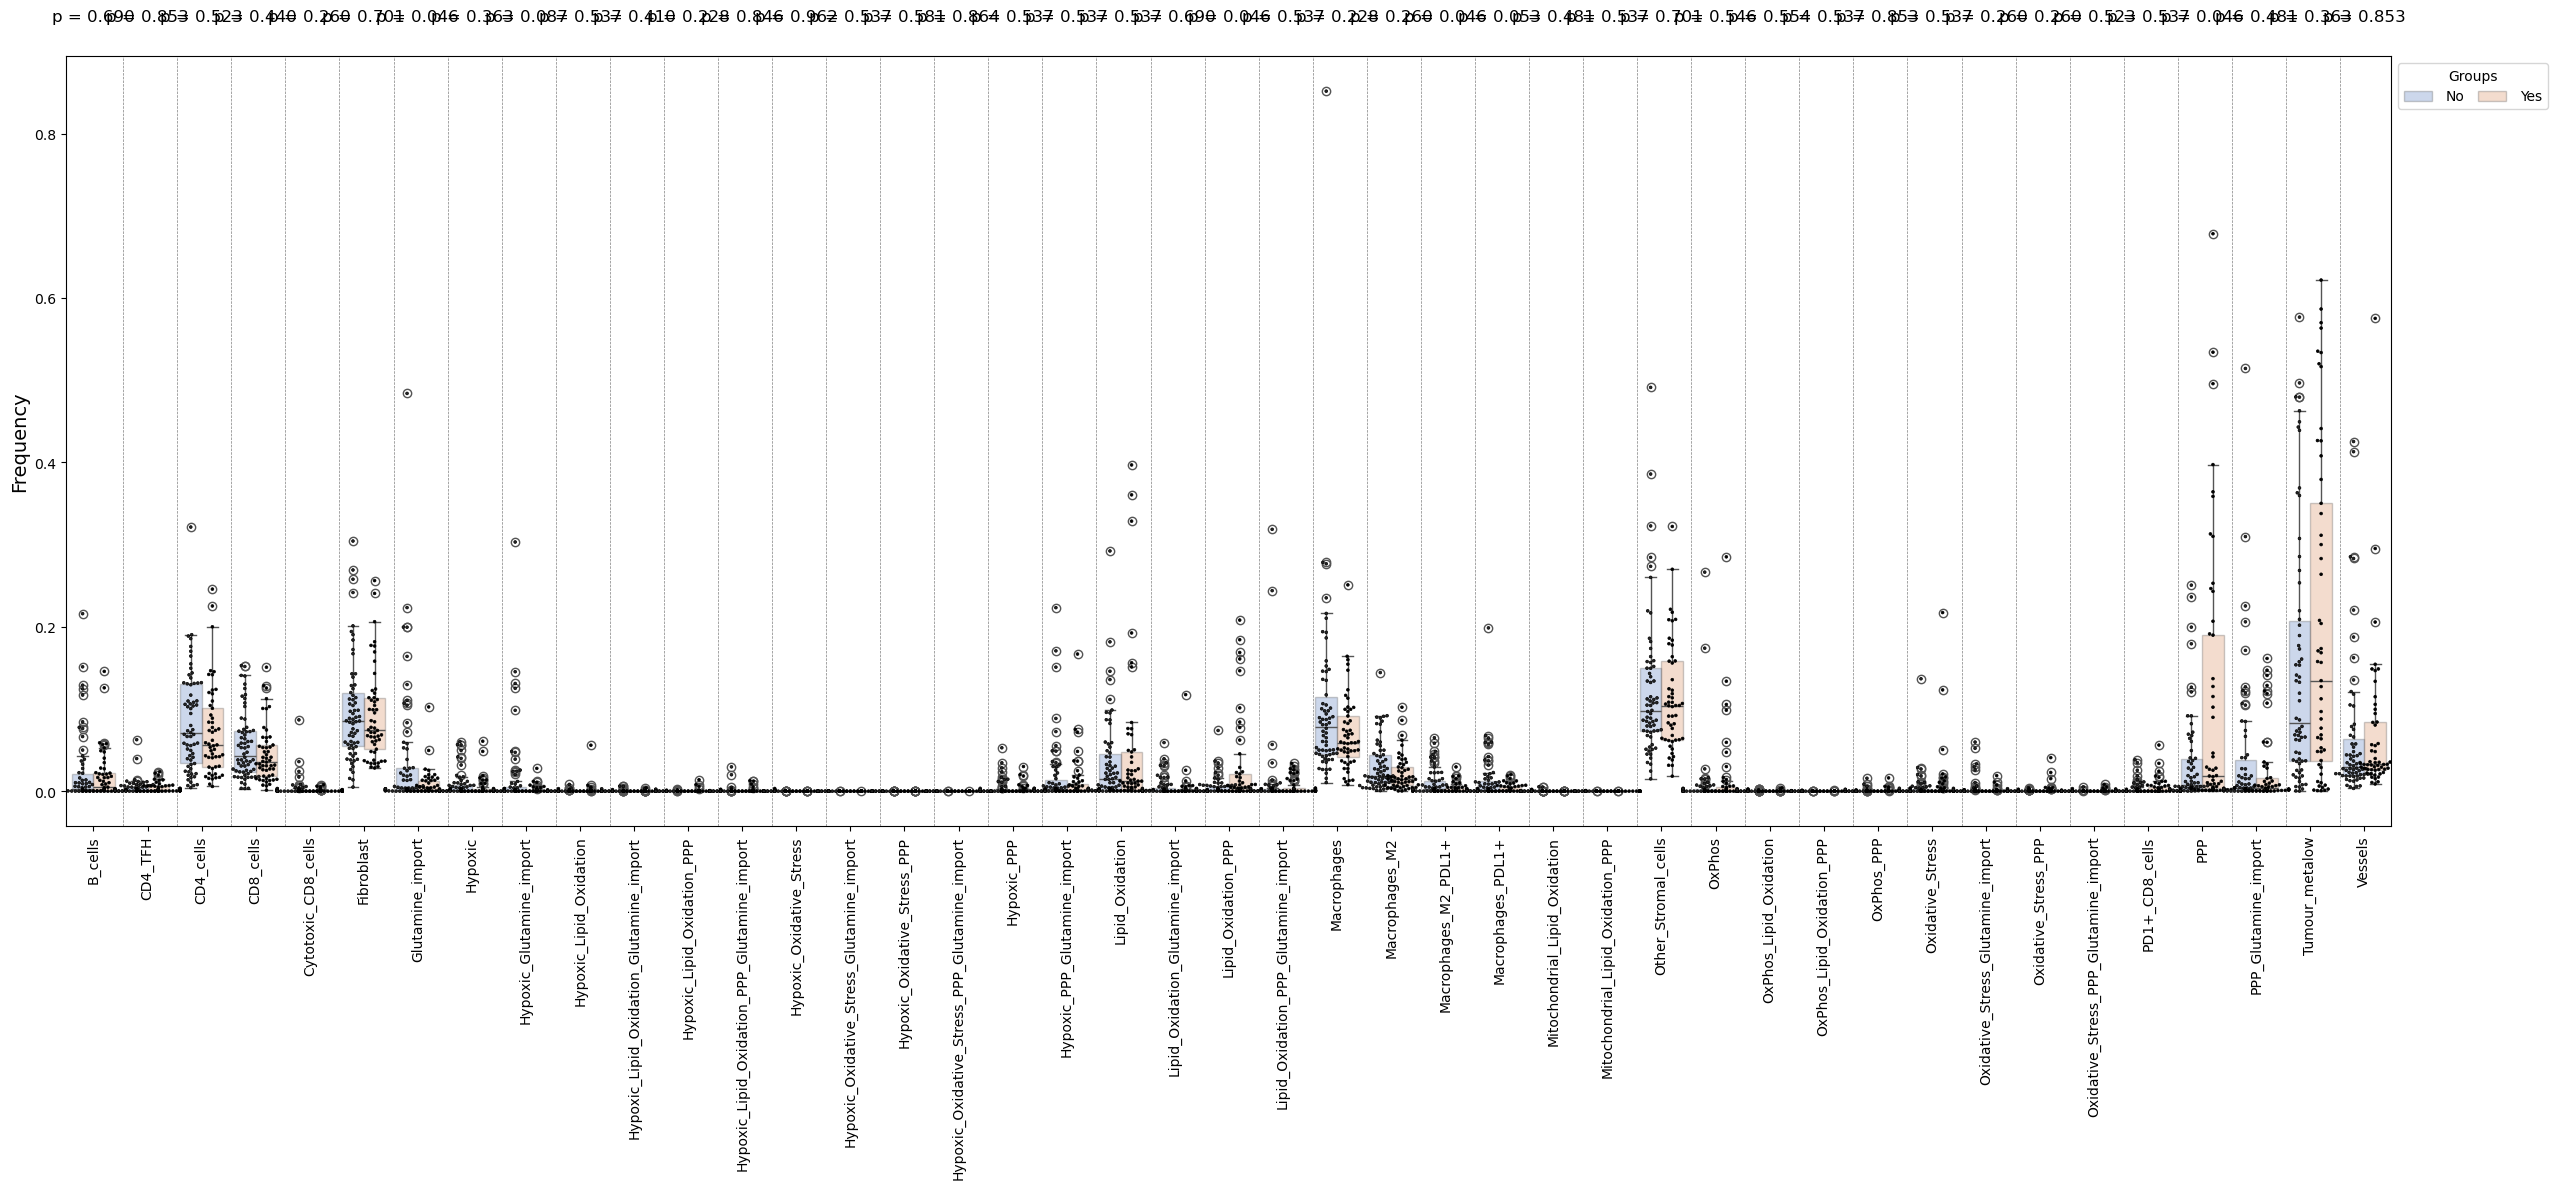

<Figure size 640x480 with 0 Axes>

In [150]:
# Perform t-tests
selected_cell_types = sorted(adata.obs['CT_metatumour_funcimmu'].unique())
selected_p_values = []
for ct in selected_cell_types:
    group1 = global_cellfreq_df_melt[(global_cellfreq_df_melt['cell_type'] == ct) & (global_cellfreq_df_melt['Relapse'] == 'Yes')]['Frequency']
    group2 = global_cellfreq_df_melt[(global_cellfreq_df_melt['cell_type'] == ct) & (global_cellfreq_df_melt['Relapse'] == 'No')]['Frequency']
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"{ct} has p value of {p_value}")
    selected_p_values.append(p_value)

pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')
print('-'*42)
print(f"p-values after correction:")

# Plot
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=global_cellfreq_df_melt, x='cell_type', y='Frequency', hue='Relapse', palette='muted', boxprops=dict(alpha=.3), ax=ax, dodge=True, order=selected_cell_types)
sns.swarmplot(data=global_cellfreq_df_melt, x='cell_type', y='Frequency', hue='Relapse', palette='dark:black', size=2.0, dodge=True, order=selected_cell_types, ax=ax, edgecolor='auto', linewidth=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Groups", handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1), ncol=3, frameon=True)
plt.xticks(rotation=90)

p_vals_corrected_dict = {}
yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
for i, ct in enumerate(selected_cell_types):
    ax.text(i, yrange, f"p = {pvals_corrected[i]:.3f}", ha='center', fontsize=12, rotation=0)
    print(f"{ct} has p value = {pvals_corrected[i]:.3f}", flush=True)
    p_vals_corrected_dict[ct] = pvals_corrected[i]

for i in range(len(selected_cell_types) - 1):
    ax.axvline(i + 0.55, color='grey', linestyle='--', linewidth=0.5)

ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('')
plt.show()
plt.savefig('./Metabolic_entropy/global_frequency.svg')

In [90]:
hot_cellfreq_df, hot_co_occurrence_df = eco.spot_cellfreq(spatial_data=adata,
                                                            scale=32.0,
                                                            library_key='unique_core',
                                                            library_id=library_ids,
                                                            spatial_key='spatial',
                                                            cluster_key='nb_immune',
                                                            spots='hot',
                                                            p_value=0.05,
                                                            top=None,
                                                            selected_comb=None,
                                                            restricted=False,
                                                            metric='Shannon Diversity')


Processing region: TMA_A_A1 at scale 32.0
17.480 per cent patches are empty
Using MoranI
Region TMA_A_A1 contains 108 diversity hotspots
Processing region: TMA_A_A2 at scale 32.0
20.996 per cent patches are empty
Using MoranI
Region TMA_A_A2 contains 254 diversity hotspots
Processing region: TMA_A_A3 at scale 32.0
16.992 per cent patches are empty
Using MoranI
Region TMA_A_A3 contains 147 diversity hotspots
Processing region: TMA_A_A4 at scale 32.0
19.727 per cent patches are empty
Using MoranI
Region TMA_A_A4 contains 202 diversity hotspots
Processing region: TMA_A_A5 at scale 32.0
17.090 per cent patches are empty
Using MoranI
Region TMA_A_A5 contains 264 diversity hotspots
Processing region: TMA_A_A6 at scale 32.0
17.188 per cent patches are empty
Using MoranI
Region TMA_A_A6 contains 223 diversity hotspots
Processing region: TMA_A_A7 at scale 32.0
18.945 per cent patches are empty
Using MoranI
Region TMA_A_A7 contains 254 diversity hotspots
Processing region: TMA_A_B2 at scale 32.0

In [91]:
cold_cellfreq_df, cold_co_occurrence_df = eco.spot_cellfreq(spatial_data=adata,
                                                            scale=32.0,
                                                                library_key='unique_core',
                                                                library_id=library_ids,
                                                                spatial_key='spatial',
                                                                cluster_key='nb_immune',
                                                                spots='cold',
                                                                top=None,
                                                                selected_comb=None,
                                                                restricted=False,
                                                                metric='Shannon Diversity')

Processing region: TMA_A_A1 at scale 32.0
17.480 per cent patches are empty
Using MoranI
Region TMA_A_A1 contains 94 diversity coldspots
Processing region: TMA_A_A2 at scale 32.0
20.996 per cent patches are empty
Using MoranI
Region TMA_A_A2 contains 180 diversity coldspots
Processing region: TMA_A_A3 at scale 32.0
16.992 per cent patches are empty
Using MoranI
Region TMA_A_A3 contains 133 diversity coldspots
Processing region: TMA_A_A4 at scale 32.0
19.727 per cent patches are empty
Using MoranI
Region TMA_A_A4 contains 173 diversity coldspots
Processing region: TMA_A_A5 at scale 32.0
17.090 per cent patches are empty
Using MoranI
Region TMA_A_A5 contains 175 diversity coldspots
Processing region: TMA_A_A6 at scale 32.0
17.188 per cent patches are empty
Using MoranI
Region TMA_A_A6 contains 172 diversity coldspots
Processing region: TMA_A_A7 at scale 32.0
18.945 per cent patches are empty
Using MoranI
Region TMA_A_A7 contains 178 diversity coldspots
Processing region: TMA_A_B2 at scal

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/mesa/ecospatial/_ecospatial.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return cellfreq_df.fillna(0.0).T, co_occurrence_df.fillna(0.0).T


In [110]:
hot_co_occurrence_subcols = hot_co_occurrence_df.loc[:,hot_co_occurrence_df.mean()>0.01].columns.tolist()

hot_co_occurrence_df['Histology'] = hot_co_occurrence_df.index.map(region_to_condition)
hot_co_occurrence_df['Relapse'] = hot_co_occurrence_df.index.map(region_to_relapse)

hot_co_occurrence_subcols.extend([('unqiue_core',''),('Histology',''),('Relapse','')])

TypeError: Could not convert ['AdenocarcinomaSquamousAdenocarcinomaAdenocarcinomaSquamousSquamousAdenocarcinomaSquamousAdenocarcinomaAdenocarcinomaSquamousSquamousAdenocarcinomaAdenocarcinomaAdenocarcinomaSquamousAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaSquamousAdenocarcinomaLarge cellAdenocarcinomaSquamousAdenocarcinomaSquamousAdenocarcinomaLarge cellAdenocarcinomaSquamousAdenocarcinomaSquamousAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaSquamousAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaLarge cellAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaLarge cellAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaSquamousAdenocarcinomaAdenocarcinomaAdenocarcinomaSquamousAdenocarcinomaAdenocarcinomaSquamousSquamousAdenocarcinomaAdenocarcinomaAdenosquamousAdenocarcinomaAdenocarcinomaSquamousSquamousAdenocarcinomaAdenocarcinomaAdenosquamousAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaSquamousLarge cellSquamousAdenocarcinomaAdenocarcinomaAdenocarcinomaSquamousAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinomaAdenocarcinoma'] to numeric

In [93]:
#cold_co_occurrence_subcols = cold_co_occurrence_df.loc[:,cold_co_occurrence_df.mean()>0.01].columns.tolist()

cold_co_occurrence_df['Histology'] = cold_co_occurrence_df.index.map(region_to_condition)
cold_co_occurrence_df['Relapse'] = cold_co_occurrence_df.index.map(region_to_relapse)

#cold_co_occurrence_subcols.extend([('unqiue_core',''),('Histology',''),('Relapse','')])

In [94]:
hot_co_occurrence_df['unique_core']= hot_co_occurrence_df.index

In [95]:
cold_co_occurrence_df['unique_core']= cold_co_occurrence_df.index

In [97]:
cold_cellfreq_df['unique_core']= cold_cellfreq_df.index

In [98]:
cold_cellfreq_df = pd.merge(cold_cellfreq_df, df1_unique[['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'Histology', 'Relapse']], on='unique_core', how='left')

In [99]:
# Melt the dataframe for easier plotting and statistical analysis
cold_cellfreq_df_melt = cold_cellfreq_df.reset_index().melt(id_vars=['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'Histology', 'Relapse'])
cold_cellfreq_df_melt.columns = ['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'Histology', 'Relapse','cell_type', 'Frequency' ]

cold_cellfreq_df_melt

unique_core  Surv_status  Surv_Followup  Relapse_status Relapse_followup  \
0       TMA_A_A1          0.0         1968.0             0.0             1968   
1       TMA_A_A2          0.0         1662.0             1.0              234   
2       TMA_A_A3          1.0         1025.0             1.0              233   
3       TMA_A_A4          0.0         1204.0             0.0             1204   
4       TMA_A_A5          0.0         1172.0             1.0              907   
...          ...          ...            ...             ...              ...   
2393    TMA_B_J2          1.0         2602.0             1.0             2262   
2394    TMA_B_J3          0.0          995.0             0.0              995   
2395    TMA_B_J4          1.0          407.0             1.0              214   
2396    TMA_B_J7          0.0         2558.0             0.0             2558   
2397    TMA_B_J8          1.0          530.0             1.0              416   

           Histology Relapse             cell_type  Frequency  
0     Adenocarcinoma      No                 index   0.000000  
1           Squamous     Yes                 index   1.000000  
2     Adenocarcinoma     Yes                 index   2.000000  
3     Adenocarcinoma      No                 index   3.000000  
4           Squamous     Yes                 index   4.000000  
...              ...     ...                   ...        ...  
2393  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.931034  
2394  Adenocarcinoma      No  pNRFhiSDHAhi_CPTA1lo   0.000000  
2395  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.000000  
2396  Adenocarcinoma      No  pNRFhiSDHAhi_CPTA1lo   0.000000  
2397  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.000000  

[2398 rows x 9 columns]

In [100]:
hot_cellfreq_df['unique_core']= hot_cellfreq_df.index

In [101]:
hot_cellfreq_df = pd.merge(hot_cellfreq_df, df1_unique[['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'Histology', 'Relapse']], on='unique_core', how='left')

In [102]:
# Melt the dataframe for easier plotting and statistical analysis
hot_cellfreq_df_melt = hot_cellfreq_df.reset_index().melt(id_vars=['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'Histology', 'Relapse'])
hot_cellfreq_df_melt.columns = ['unique_core', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'Histology', 'Relapse','cell_type', 'Frequency' ]

hot_cellfreq_df_melt

unique_core  Surv_status  Surv_Followup  Relapse_status Relapse_followup  \
0       TMA_A_A1          0.0         1968.0             0.0             1968   
1       TMA_A_A2          0.0         1662.0             1.0              234   
2       TMA_A_A3          1.0         1025.0             1.0              233   
3       TMA_A_A4          0.0         1204.0             0.0             1204   
4       TMA_A_A5          0.0         1172.0             1.0              907   
...          ...          ...            ...             ...              ...   
2415    TMA_B_J2          1.0         2602.0             1.0             2262   
2416    TMA_B_J3          0.0          995.0             0.0              995   
2417    TMA_B_J4          1.0          407.0             1.0              214   
2418    TMA_B_J7          0.0         2558.0             0.0             2558   
2419    TMA_B_J8          1.0          530.0             1.0              416   

           Histology Relapse             cell_type  Frequency  
0     Adenocarcinoma      No                 index   0.000000  
1           Squamous     Yes                 index   1.000000  
2     Adenocarcinoma     Yes                 index   2.000000  
3     Adenocarcinoma      No                 index   3.000000  
4           Squamous     Yes                 index   4.000000  
...              ...     ...                   ...        ...  
2415  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.149088  
2416  Adenocarcinoma      No  pNRFhiSDHAhi_CPTA1lo   0.007469  
2417  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.000000  
2418  Adenocarcinoma      No  pNRFhiSDHAhi_CPTA1lo   0.000000  
2419  Adenocarcinoma     Yes  pNRFhiSDHAhi_CPTA1lo   0.000000  

[2420 rows x 9 columns]

In [103]:
hot_cellfreq_df_melt= hot_cellfreq_df_melt[~hot_cellfreq_df_melt.cell_type.str.contains("index")]
cold_cellfreq_df_melt= cold_cellfreq_df_melt[~cold_cellfreq_df_melt.cell_type.str.contains("index")]

In [131]:
hot_cellfreq_df

B_cells   CD4_TFH  CD4_cells  CD8_cells  Cytotoxic_CD8_cells  \
0    0.000000  0.000000   0.105189   0.056101             0.000000   
1    0.046981  0.015454   0.082217   0.081599             0.000412   
2    0.014159  0.014749   0.216519   0.027729             0.000000   
3    0.004282  0.043478   0.339262   0.022069             0.000988   
4    0.075982  0.023326   0.227945   0.043649             0.000000   
..        ...       ...        ...        ...                  ...   
105  0.001780  0.000000   0.032933   0.033378             0.000000   
106  0.002561  0.000213   0.204866   0.092830             0.001067   
107  0.003248  0.000433   0.057817   0.109788             0.000000   
108  0.111169  0.002972   0.259395   0.078832             0.000524   
109  0.042489  0.000822   0.099507   0.086349             0.000000   

     Fibroblast  Glutamineimport_PPP   Hypoxic  Hypoxic_glutamineimport  \
0      0.133240             0.000000  0.000000                 0.000000   
1      0.085926             0.000000  0.009273                 0.000000   
2      0.076696             0.000000  0.000000                 0.001770   
3      0.150527             0.016140  0.000000                 0.000000   
4      0.119169             0.000000  0.000000                 0.000000   
..          ...                  ...       ...                      ...   
105    0.140187             0.000890  0.002670                 0.038718   
106    0.014511             0.019206  0.000000                 0.018139   
107    0.138372             0.000217  0.000000                 0.000000   
108    0.054536             0.000000  0.000000                 0.000000   
109    0.047423             0.249452  0.000000                 0.000000   

     Hypoxic_glutamineimport_PPP  ...   Vessels       low  \
0                       0.000000  ...  0.077139  0.089762   
1                       0.000000  ...  0.128580  0.045333   
2                       0.000000  ...  0.087316  0.367552   
3                       0.000000  ...  0.020422  0.068182   
4                       0.000000  ...  0.061432  0.090531   
..                           ...  ...       ...       ...   
105                     0.000000  ...  0.064976  0.201157   
106                     0.002347  ...  0.036705  0.141912   
107                     0.000000  ...  0.038545  0.125595   
108                     0.000000  ...  0.025695  0.127076   
109                     0.000000  ...  0.157621  0.120066   

     pNRFhiSDHAhi_CPTA1lo  unique_core  Surv_status  Surv_Followup  \
0                0.000000     TMA_A_A1          0.0         1968.0   
1                0.100144     TMA_A_A2          0.0         1662.0   
2                0.002950     TMA_A_A3          1.0         1025.0   
3                0.000000     TMA_A_A4          0.0         1204.0   
4                0.000000     TMA_A_A5          0.0         1172.0   
..                    ...          ...          ...            ...   
105              0.149088     TMA_B_J2          1.0         2602.0   
106              0.007469     TMA_B_J3          0.0          995.0   
107              0.000000     TMA_B_J4          1.0          407.0   
108              0.000000     TMA_B_J7          0.0         2558.0   
109              0.000000     TMA_B_J8          1.0          530.0   

     Relapse_status  Relapse_followup       Histology  Relapse  
0               0.0              1968  Adenocarcinoma       No  
1               1.0               234        Squamous      Yes  
2               1.0               233  Adenocarcinoma      Yes  
3               0.0              1204  Adenocarcinoma       No  
4               1.0               907        Squamous      Yes  
..              ...               ...             ...      ...  
105             1.0              2262  Adenocarcinoma      Yes  
106             0.0               995  Adenocarcinoma       No  
107             1.0               214  Adenocarcinoma      Yes  
108             0.0              2558  A

In [132]:
hot_cellfreq_df.to_csv('./Feature_csv/cell_frequency_hot_xbound.csv')
hot_cellfreq_df.to_csv('./Feature_csv/cell_frequency_cold_xbound.csv')

B_cells has p value of 0.9088769947567021
CD4_TFH has p value of 0.8495911014963209
CD4_cells has p value of 0.3816682028675832
CD8_cells has p value of 0.3721957766906605
Cytotoxic_CD8_cells has p value of 0.07374837586239497
Fibroblast has p value of 0.6808001217590641
Glutamine_import has p value of nan
Hypoxic has p value of 0.5643602699936481
Hypoxic_Glutamine_import has p value of nan
Hypoxic_Lipid_Oxidation has p value of nan
Hypoxic_Lipid_Oxidation_Glutamine_import has p value of nan
Hypoxic_Lipid_Oxidation_PPP has p value of nan
Hypoxic_Lipid_Oxidation_PPP_Glutamine_import has p value of nan
Hypoxic_Oxidative_Stress has p value of nan
Hypoxic_Oxidative_Stress_Glutamine_import has p value of nan
Hypoxic_Oxidative_Stress_PPP has p value of nan
Hypoxic_Oxidative_Stress_PPP_Glutamine_import has p value of nan
Hypoxic_PPP has p value of nan
Hypoxic_PPP_Glutamine_import has p value of nan
Lipid_Oxidation has p value of nan
Lipid_Oxidation_Glutamine_import has p value of nan
Lipid_Ox

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

NameError: name 'pvals_corrected' is not defined

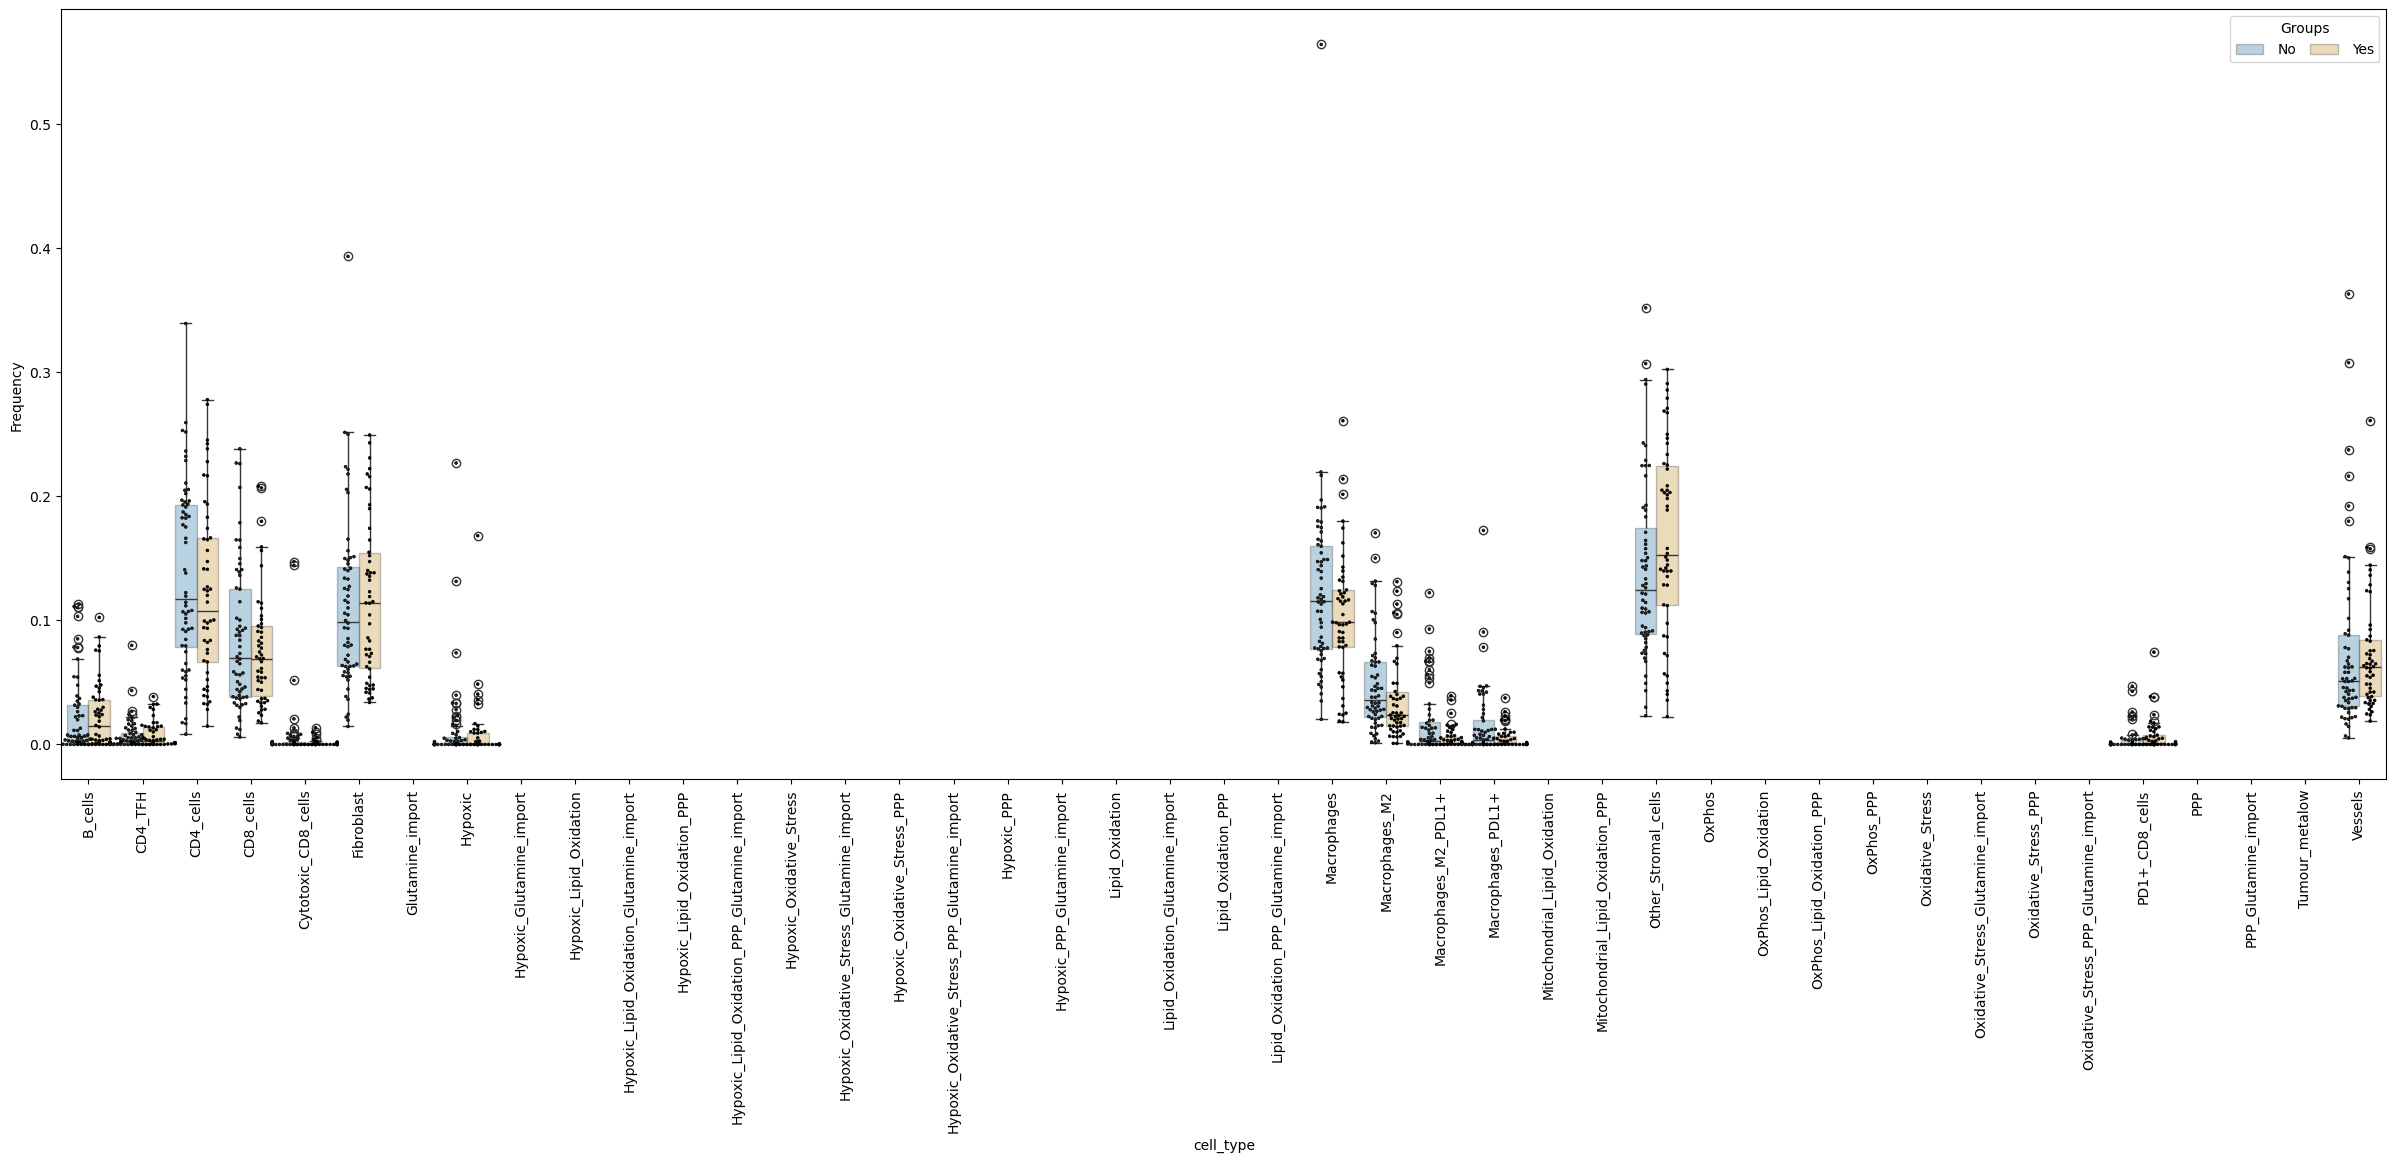

In [106]:
# Perform t-tests
selected_cell_types = sorted(adata.obs['CT_metatumour_funcimmu'].unique())
selected_p_values = []
for ct in selected_cell_types:
    group1 = hot_cellfreq_df_melt[(hot_cellfreq_df_melt['cell_type'] == ct) & (hot_cellfreq_df_melt['Relapse'] == 'Yes')]['Frequency']
    group2 = hot_cellfreq_df_melt[(hot_cellfreq_df_melt['cell_type'] == ct) & (hot_cellfreq_df_melt['Relapse'] == 'No')]['Frequency']
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"{ct} has p value of {p_value}")
    selected_p_values.append(p_value)

#pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')
print('-'*42)
print(f"p-values after correction:")

# Plot
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=hot_cellfreq_df_melt, x='cell_type', y='Frequency', hue='Relapse', palette='colorblind', boxprops=dict(alpha=.3), ax=ax, dodge=True, order=selected_cell_types)
sns.swarmplot(data=hot_cellfreq_df_melt, x='cell_type', y='Frequency', hue='Relapse', palette='dark:black', size=2.0, dodge=True, order=selected_cell_types, ax=ax, edgecolor='auto', linewidth=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Groups", handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1), ncol=3, frameon=True)
plt.xticks(rotation=90)

p_vals_corrected_dict = {}
yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
for i, ct in enumerate(selected_cell_types):
    ax.text(i, yrange, f"p = {pvals_corrected[i]:.3f}", ha='center', fontsize=12, rotation=0)
    print(f"{ct} has p value = {pvals_corrected[i]:.3f}", flush=True)
    p_vals_corrected_dict[ct] = pvals_corrected[i]

for i in range(len(selected_cell_types) - 1):
    ax.axvline(i + 0.55, color='grey', linestyle='--', linewidth=0.5)

ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('')
plt.show()
plt.savefig('./Metabolic_entropy/hotcell_frequency.svg')

B_cells has p value of 0.8028708880006501
CD4_TFH has p value of 0.5720778442581438
CD4_cells has p value of 0.707882166762941
CD8_cells has p value of 0.39104364982635353
Cytotoxic_CD8_cells has p value of 0.7934085420900536
Fibroblast has p value of 0.1693931515204684
Glutamine_import has p value of nan
Hypoxic has p value of 0.5830341021143373
Hypoxic_Glutamine_import has p value of nan
Hypoxic_Lipid_Oxidation has p value of nan
Hypoxic_Lipid_Oxidation_Glutamine_import has p value of nan
Hypoxic_Lipid_Oxidation_PPP has p value of nan
Hypoxic_Lipid_Oxidation_PPP_Glutamine_import has p value of nan
Hypoxic_Oxidative_Stress has p value of nan
Hypoxic_Oxidative_Stress_Glutamine_import has p value of nan
Hypoxic_Oxidative_Stress_PPP has p value of nan
Hypoxic_Oxidative_Stress_PPP_Glutamine_import has p value of nan
Hypoxic_PPP has p value of nan
Hypoxic_PPP_Glutamine_import has p value of nan
Lipid_Oxidation has p value of nan
Lipid_Oxidation_Glutamine_import has p value of nan
Lipid_Oxi

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

NameError: name 'pvals_corrected' is not defined

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


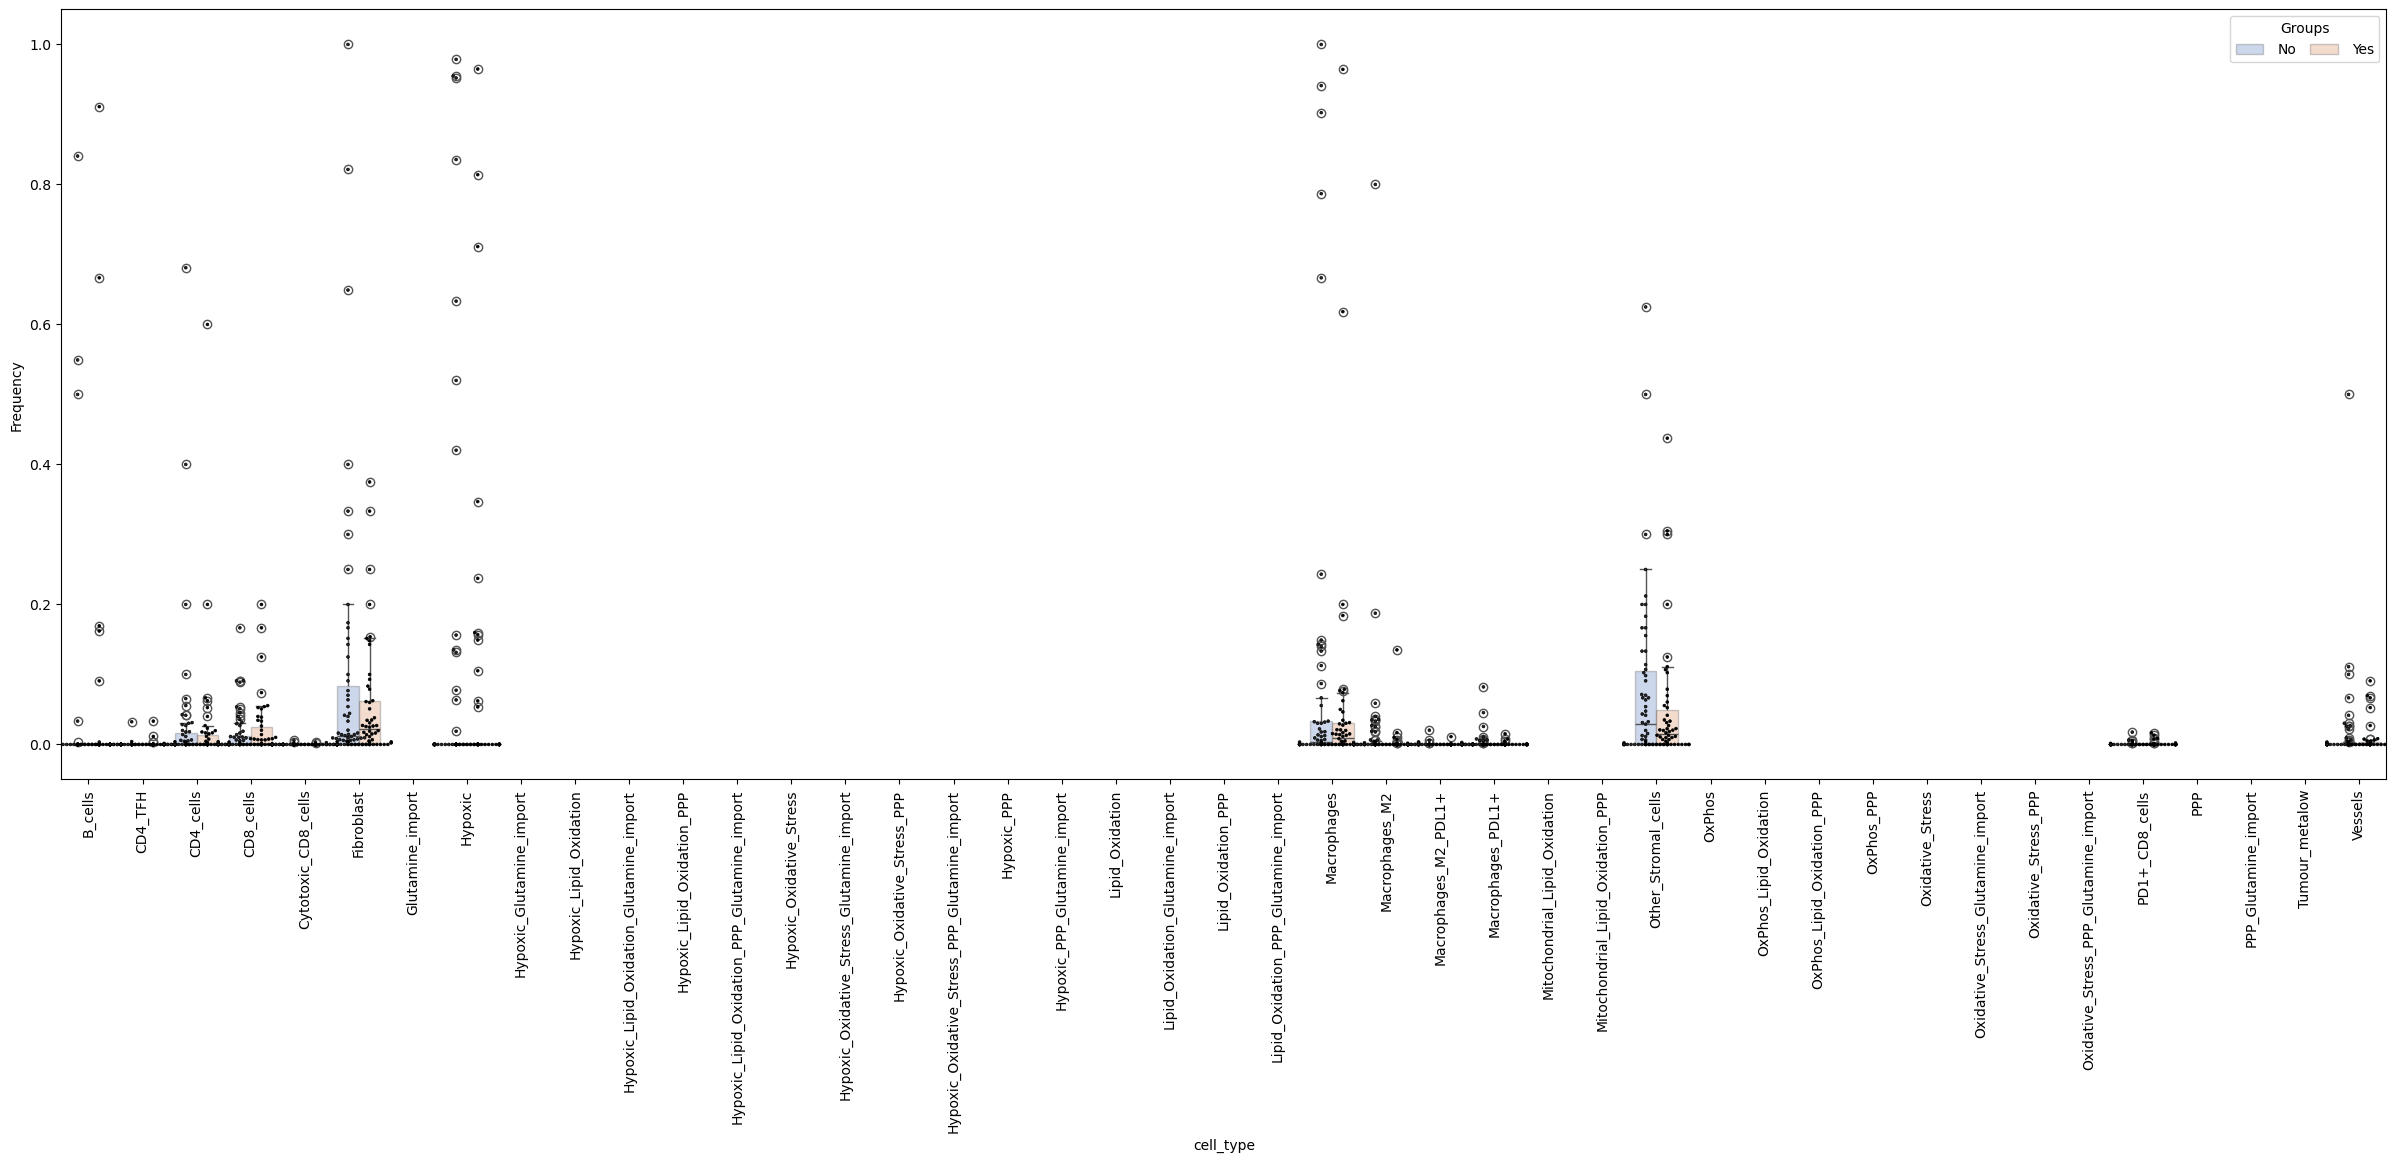

In [107]:
# Perform t-tests
selected_cell_types = sorted(adata.obs['CT_metatumour_funcimmu'].unique())
selected_p_values = []
for ct in selected_cell_types:
    group1 = cold_cellfreq_df_melt[(cold_cellfreq_df_melt['cell_type'] == ct) & (cold_cellfreq_df_melt['Relapse'] == 'Yes')]['Frequency']
    group2 = cold_cellfreq_df_melt[(cold_cellfreq_df_melt['cell_type'] == ct) & (cold_cellfreq_df_melt['Relapse'] == 'No')]['Frequency']
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"{ct} has p value of {p_value}")
    selected_p_values.append(p_value)

#pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')
print('-'*42)
print(f"p-values after correction:")

# Plot
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=cold_cellfreq_df_melt, x='cell_type', y='Frequency', hue='Relapse', palette='muted', boxprops=dict(alpha=.3), ax=ax, dodge=True, order=selected_cell_types)
sns.swarmplot(data=cold_cellfreq_df_melt, x='cell_type', y='Frequency', hue='Relapse', palette='dark:black', size=2.0, dodge=True, order=selected_cell_types, ax=ax, edgecolor='auto', linewidth=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Groups", handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1), ncol=3, frameon=True)
plt.xticks(rotation=90)

p_vals_corrected_dict = {}
yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
for i, ct in enumerate(selected_cell_types):
    ax.text(i, yrange, f"p = {pvals_corrected[i]:.3f}", ha='center', fontsize=12, rotation=0)
    print(f"{ct} has p value = {pvals_corrected[i]:.3f}", flush=True)
    p_vals_corrected_dict[ct] = pvals_corrected[i]

for i in range(len(selected_cell_types) - 1):
    ax.axvline(i + 0.55, color='grey', linestyle='--', linewidth=0.5)

ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('')
plt.show()
plt.savefig('./Metabolic_entropy/coldcell_frequency.svg')

In [108]:
union_cols = set(global_co_occurrence_subcols).union(set(hot_co_occurrence_subcols)).union(set(cold_co_occurrence_subcols))
print(len(union_cols))

NameError: name 'hot_co_occurrence_subcols' is not defined

In [173]:
# Make them have the same set of columns
global_co_occurrence_df = global_co_occurrence_df.reindex(columns=union_cols).fillna(0)
hot_co_occurrence_df = hot_co_occurrence_df.reindex(columns=union_cols).fillna(0)
cold_co_occurrence_df = cold_co_occurrence_df.reindex(columns=union_cols).fillna(0)

In [112]:
global_co_occurrence_df

B_cells                                                     \
           CD4_TFH CD4_cells CD8_cells Cytotoxic_CD8_cells Fibroblast   
TMA_A_A1  0.000000  0.000000  0.000000            0.000000   0.001183   
TMA_A_A2  0.044499  0.113721  0.121137            0.002472   0.090235   
TMA_A_A3  0.007059  0.017647  0.005882            0.000000   0.005882   
TMA_A_A4  0.020681  0.025547  0.006083            0.000000   0.014599   
TMA_A_A5  0.094229  0.310954  0.153121            0.000000   0.243816   
...            ...       ...       ...                 ...        ...   
TMA_B_J2  0.000000  0.001215  0.006075            0.000000   0.008505   
TMA_B_J3  0.000000  0.016413  0.017585            0.000000   0.004689   
TMA_B_J4  0.000000  0.025210  0.022809            0.000000   0.025210   
TMA_B_J7  0.033254  0.409739  0.337292            0.000000   0.254157   
TMA_B_J8  0.003517  0.097304  0.094959            0.000000   0.063306   

                                                                \
         Glutamineimport_PPP   Hypoxic Hypoxic_glutamineimport   
TMA_A_A1            0.000000  0.000000                0.000000   
TMA_A_A2            0.000000  0.004944                0.001236   
TMA_A_A3            0.000000  0.000000                0.000000   
TMA_A_A4            0.000000  0.000000                0.000000   
TMA_A_A5            0.000000  0.000000                0.000000   
...                      ...       ...                     ...   
TMA_B_J2            0.000000  0.000000                0.000000   
TMA_B_J3            0.001172  0.000000                0.002345   
TMA_B_J4            0.000000  0.000000                0.000000   
TMA_B_J7            0.000000  0.000000                0.000000   
TMA_B_J8            0.083236  0.000000                0.000000   

                                                      ...  \
         Hypoxic_glutamineimport_PPP Lipid_oxidation  ...   
TMA_A_A1                         0.0        0.000000  ...   
TMA_A_A2                         0.0        0.006180  ...   
TMA_A_A3                         0.0        0.000000  ...   
TMA_A_A4                         0.0        0.000000  ...   
TMA_A_A5                         0.0        0.000000  ...   
...                              ...             ...  ...   
TMA_B_J2                         0.0        0.000000  ...   
TMA_B_J3                         0.0        0.000000  ...   
TMA_B_J4                         0.0        0.000000  ...   
TMA_B_J7                         0.0        0.038005  ...   
TMA_B_J8                         0.0        0.002345  ...   

                       Oxphos PD1+_CD8_cells                                 \
         pNRFhiSDHAhi_CPTA1lo        Vessels       low pNRFhiSDHAhi_CPTA1lo   
TMA_A_A1             0.000000       0.000000  0.000000             0.000000   
TMA_A_A2             0.013597       0.096415  0.038319             0.126082   
TMA_A_A3             0.000000       0.025882  0.043529             0.000000   
TMA_A_A4             0.000000       0.040146  0.104623             0.000000   
TMA_A_A5             0.000000       0.117786  0.134276             0.000000   
...                       ...            ...       ...                  ...   
TMA_B_J2             0.004860       0.000000  0.000000             0.000000   
TMA_B_J3             0.000000       0.000000  0.000000             0.000000   
TMA_B_J4             0.000000       0.000000  0.000000             0.000000   
TMA_B_J7             0.000000       0.000000  0.000000             0.000000   
TMA_B_J8             0.000000       0.000000  0.000000             0.000000   

           Vessels                                       low       Histology  \
               low pNRFhiSDHAhi_CPTA1lo pNRFhiSDHAhi_CPTA1lo                   
TMA_A_A1  0.042604             0.000000             0.000000  Adenocarcinoma   
TMA_A_A2  0.170581             0.185414             0.095179        Squamous   
TMA_A_A3  0.154118             0.000000             0.007059

In [149]:
# Global Cell Co-Occurrence
# Multi-index to single-index column
new_columns = []
for col in global_co_occurrence_df.columns:
    if isinstance(col, tuple):  # This checks if the column is a MultiIndex
        # Join only if the column name is not 'Mouse' or 'Condition' #"unique_core" not in col and 
        if "Relapse" not in col and "Histology" not in col and "unique_core" not in col:
            new_columns.append('&'.join(map(str, col)).strip())
        else:
            # If 'Mouse' or 'Condition' is in the column, it is not joined with '&'
            new_columns.append(col[0])
    else:
        new_columns.append(col)

global_co_occurrence_df_single = global_co_occurrence_df.copy()
global_co_occurrence_df_single.columns = new_columns
global_co_occurrence_df_single = global_co_occurrence_df_single[[col for col in global_co_occurrence_df_single.columns]]



In [150]:
global_co_occurrence_df_single['unique_core'] = global_co_occurrence_df_single.index

In [151]:
# Melt the DataFrame
global_co_occurrence_melted = global_co_occurrence_df_single.melt(id_vars=['unique_core', 'Relapse', 'Histology'], var_name='Cell Combination', value_name='Frequency')
global_co_occurrence_melted

unique_core Relapse       Histology Cell Combination Frequency
0        TMA_A_A1      No  Adenocarcinoma  B_cells&CD4_TFH       0.0
1        TMA_A_A2     Yes        Squamous  B_cells&CD4_TFH  0.044499
2        TMA_A_A3     Yes  Adenocarcinoma  B_cells&CD4_TFH  0.007059
3        TMA_A_A4      No  Adenocarcinoma  B_cells&CD4_TFH  0.020681
4        TMA_A_A5     Yes        Squamous  B_cells&CD4_TFH  0.094229
...           ...     ...             ...              ...       ...
23205    TMA_B_J2     Yes  Adenocarcinoma     unqiue_core&  TMA_B_J2
23206    TMA_B_J3      No  Adenocarcinoma     unqiue_core&  TMA_B_J3
23207    TMA_B_J4     Yes  Adenocarcinoma     unqiue_core&  TMA_B_J4
23208    TMA_B_J7      No  Adenocarcinoma     unqiue_core&  TMA_B_J7
23209    TMA_B_J8     Yes  Adenocarcinoma     unqiue_core&  TMA_B_J8

[23210 rows x 5 columns]

In [148]:
global_co_occurrence_melted_avg = global_co_occurrence_melted.groupby(by=['unique_core', 'Cell Combination', 'Histology', 'Relapse'])['Frequency'].mean().reset_index()
#global_co_occurrence_melted_avg['Condition'] = global_co_occurrence_melted_avg['Condition'].map(condition_num2str)
global_co_occurrence_melted_avg

TypeError: agg function failed [how->mean,dtype->object]

p-value before correction:
B_cells&CD4_TFH has p value = 0.699
B_cells&CD4_cells has p value = 0.436
B_cells&CD8_cells has p value = 0.391
B_cells&Cytotoxic_CD8_cells has p value = 0.130
B_cells&Fibroblast has p value = 0.542
B_cells&Glutamineimport_PPP has p value = 0.088
B_cells&Hypoxic has p value = 0.352
B_cells&Hypoxic_glutamineimport has p value = 0.470
B_cells&Hypoxic_glutamineimport_PPP has p value = 0.262
B_cells&Lipid_oxidation has p value = 0.773
B_cells&Macrophages has p value = 0.266
B_cells&Macrophages_M2 has p value = 0.104
B_cells&Macrophages_M2_PDL1+ has p value = 0.104
B_cells&Macrophages_PDL1+ has p value = 0.107
B_cells&Other_Stromal_cells has p value = 0.620
B_cells&Oxphos has p value = 0.974
B_cells&PD1+_CD8_cells has p value = 0.378
B_cells&Vessels has p value = 0.794
B_cells&low has p value = 0.459
B_cells&pNRFhiSDHAhi_CPTA1lo has p value = 0.255
CD4_TFH&CD4_cells has p value = 0.708
CD4_TFH&CD8_cells has p value = 0.773
CD4_TFH&Cytotoxic_CD8_cells has p value =

/tmp/ipykernel_30046/3377275746.py:22: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Relapse', palette='dark:black', size=1.0, dodge=True,order=selected_cell_types, ax=ax, edgecolor='gray', linewidth=0.5)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot b

------------------------------------------
p-values after correction:
B_cells&CD4_TFH has p value = 0.859
B_cells&CD4_cells has p value = 0.659
B_cells&CD8_cells has p value = 0.641
B_cells&Cytotoxic_CD8_cells has p value = 0.409
B_cells&Fibroblast has p value = 0.764
B_cells&Glutamineimport_PPP has p value = 0.362
B_cells&Hypoxic has p value = 0.621
B_cells&Hypoxic_glutamineimport has p value = 0.690
B_cells&Hypoxic_glutamineimport_PPP has p value = 0.532
B_cells&Lipid_oxidation has p value = 0.886
B_cells&Macrophages has p value = 0.532
B_cells&Macrophages_M2 has p value = 0.399
B_cells&Macrophages_M2_PDL1+ has p value = 0.399
B_cells&Macrophages_PDL1+ has p value = 0.399
B_cells&Other_Stromal_cells has p value = 0.809
B_cells&Oxphos has p value = 0.979
B_cells&PD1+_CD8_cells has p value = 0.641
B_cells&Vessels has p value = 0.886
B_cells&low has p value = 0.684
B_cells&pNRFhiSDHAhi_CPTA1lo has p value = 0.532
CD4_TFH&CD4_cells has p value = 0.861
CD4_TFH&CD8_cells has p value = 0.88

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarnin

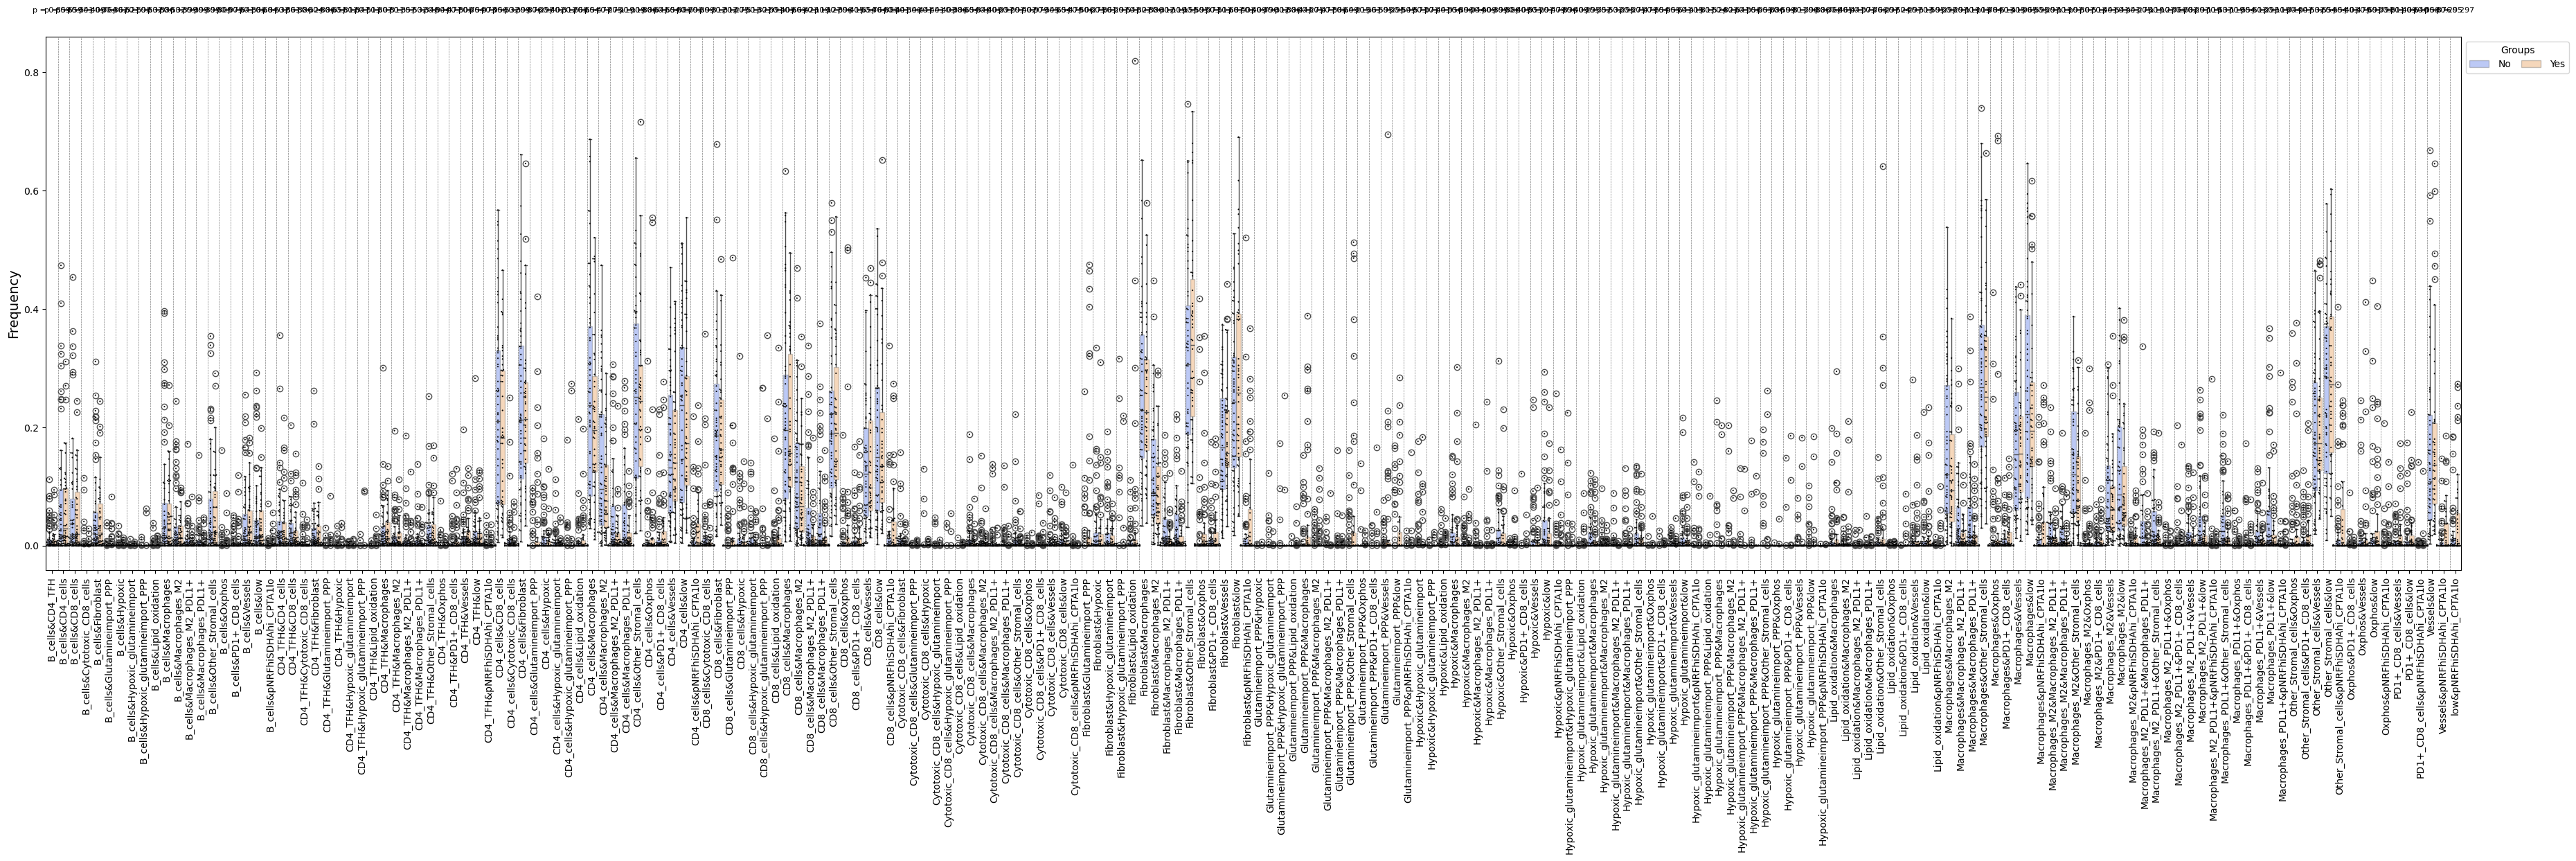

In [152]:
# Global Cell Co-Occurrence
selected_cell_types = sorted(global_co_occurrence_melted_avg['Cell Combination'].unique())
selected_p_values = []

# Perform t-tests
print(f"p-value before correction:")
for ct in selected_cell_types:
    subset = global_co_occurrence_melted_avg[global_co_occurrence_melted_avg['Cell Combination'] == ct]
    group1 = subset[subset['Relapse'] == 'Yes']['Frequency']
    group2 = subset[subset['Relapse'] == 'No']['Frequency']

    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"{ct} has p value = {p_value:.3f}")
    selected_p_values.append(p_value)

# Filter the dataframe based on selected Cell Combinations
df_filtered = global_co_occurrence_melted_avg[global_co_occurrence_melted_avg['Cell Combination'].isin(selected_cell_types)]

# Plot the filtered data
fig, ax = plt.subplots(figsize=(45,10))
sns.boxplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Relapse', palette='bright', boxprops=dict(alpha=.3), ax=ax, dodge=True,order=selected_cell_types)
sns.swarmplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Relapse', palette='dark:black', size=1.0, dodge=True,order=selected_cell_types, ax=ax, edgecolor='gray', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Groups", handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1), ncol=3, frameon=True)

pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')

print('-'*42)
print(f"p-values after correction:")

p_vals_corrected_dict = {}
yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
for i, ct in enumerate(selected_cell_types):
    ax.text(i, yrange, f"p = {pvals_corrected[i]:.3f}", ha='center', fontsize=8, rotation=0)
    print(f"{ct} has p value = {pvals_corrected[i]:.3f}", flush=True)
    p_vals_corrected_dict[ct] = pvals_corrected[i]

for i in range(len(selected_cell_types) - 1):
    ax.axvline(i + 0.55, color='grey', linestyle='--', linewidth=0.5)

ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('')
plt.xticks(rotation=90)
plt.show()

## Hot 


In [120]:
# Global Cell Co-Occurrence
# Multi-index to single-index column
new_columns = []
for col in hot_co_occurrence_df.columns:
    if isinstance(col, tuple):  # This checks if the column is a MultiIndex
        # Join only if the column name is not 'Mouse' or 'Condition' #"unique_core" not in col and 
        if "Relapse" not in col and "Histology" not in col and "unique_core" not in col:
            new_columns.append('&'.join(map(str, col)).strip())
        else:
            # If 'Mouse' or 'Condition' is in the column, it is not joined with '&'
            new_columns.append(col[0])
    else:
        new_columns.append(col)

hot_co_occurrence_df_single = hot_co_occurrence_df.copy()
hot_co_occurrence_df_single.columns = new_columns
hot_co_occurrence_df_single = hot_co_occurrence_df_single[[col for col in hot_co_occurrence_df_single.columns]]



In [122]:
hot_co_occurrence_df_single['unique_core'] = hot_co_occurrence_df_single.index

In [123]:
# Melt the DataFrame
hot_co_occurrence_melted = hot_co_occurrence_df_single.melt(id_vars=['unique_core', 'Relapse', 'Histology'], var_name='Cell Combination', value_name='Frequency')
hot_co_occurrence_melted

unique_core Relapse       Histology          Cell Combination  Frequency
0        TMA_A_A1      No  Adenocarcinoma           B_cells&CD4_TFH   0.000000
1        TMA_A_A2     Yes        Squamous           B_cells&CD4_TFH   0.094488
2        TMA_A_A3     Yes  Adenocarcinoma           B_cells&CD4_TFH   0.027211
3        TMA_A_A4      No  Adenocarcinoma           B_cells&CD4_TFH   0.039604
4        TMA_A_A5     Yes        Squamous           B_cells&CD4_TFH   0.136364
...           ...     ...             ...                       ...        ...
23095    TMA_B_J2     Yes  Adenocarcinoma  low&pNRFhiSDHAhi_CPTA1lo   0.315152
23096    TMA_B_J3      No  Adenocarcinoma  low&pNRFhiSDHAhi_CPTA1lo   0.055085
23097    TMA_B_J4     Yes  Adenocarcinoma  low&pNRFhiSDHAhi_CPTA1lo   0.000000
23098    TMA_B_J7      No  Adenocarcinoma  low&pNRFhiSDHAhi_CPTA1lo   0.000000
23099    TMA_B_J8     Yes  Adenocarcinoma  low&pNRFhiSDHAhi_CPTA1lo   0.000000

[23100 rows x 5 columns]

In [124]:
hot_co_occurrence_melted_avg = hot_co_occurrence_melted.groupby(by=['unique_core', 'Cell Combination', 'Histology', 'Relapse'])['Frequency'].mean().reset_index()
#global_co_occurrence_melted_avg['Condition'] = global_co_occurrence_melted_avg['Condition'].map(condition_num2str)
hot_co_occurrence_melted_avg

unique_core                     Cell Combination       Histology  \
0        TMA_A_A1                      B_cells&CD4_TFH  Adenocarcinoma   
1        TMA_A_A1                    B_cells&CD4_cells  Adenocarcinoma   
2        TMA_A_A1                    B_cells&CD8_cells  Adenocarcinoma   
3        TMA_A_A1          B_cells&Cytotoxic_CD8_cells  Adenocarcinoma   
4        TMA_A_A1                   B_cells&Fibroblast  Adenocarcinoma   
...           ...                                  ...             ...   
23095    TMA_B_J8                   PD1+_CD8_cells&low  Adenocarcinoma   
23096    TMA_B_J8  PD1+_CD8_cells&pNRFhiSDHAhi_CPTA1lo  Adenocarcinoma   
23097    TMA_B_J8                          Vessels&low  Adenocarcinoma   
23098    TMA_B_J8         Vessels&pNRFhiSDHAhi_CPTA1lo  Adenocarcinoma   
23099    TMA_B_J8             low&pNRFhiSDHAhi_CPTA1lo  Adenocarcinoma   

      Relapse  Frequency  
0          No   0.000000  
1          No   0.000000  
2          No   0.000000  
3          No   0.000000  
4          No   0.000000  
...       ...        ...  
23095     Yes   0.000000  
23096     Yes   0.000000  
23097     Yes   0.539326  
23098     Yes   0.000000  
23099     Yes   0.000000  

[23100 rows x 5 columns]

p-value before correction:
B_cells&CD4_TFH has p value = 0.785
B_cells&CD4_cells has p value = 0.730
B_cells&CD8_cells has p value = 0.817
B_cells&Cytotoxic_CD8_cells has p value = 0.170
B_cells&Fibroblast has p value = 0.830
B_cells&Glutamineimport_PPP has p value = 0.147
B_cells&Hypoxic has p value = 0.663
B_cells&Hypoxic_glutamineimport has p value = 0.927
B_cells&Hypoxic_glutamineimport_PPP has p value = 0.274
B_cells&Lipid_oxidation has p value = 0.869
B_cells&Macrophages has p value = 0.354
B_cells&Macrophages_M2 has p value = 0.155
B_cells&Macrophages_M2_PDL1+ has p value = 0.180
B_cells&Macrophages_PDL1+ has p value = 0.169
B_cells&Other_Stromal_cells has p value = 0.875
B_cells&Oxphos has p value = 0.903
B_cells&PD1+_CD8_cells has p value = 0.276
B_cells&Vessels has p value = 0.952
B_cells&low has p value = 0.831
B_cells&pNRFhiSDHAhi_CPTA1lo has p value = 0.300
CD4_TFH&CD4_cells has p value = 0.843
CD4_TFH&CD8_cells has p value = 0.866
CD4_TFH&Cytotoxic_CD8_cells has p value =

/tmp/ipykernel_30046/1287561546.py:22: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Relapse', palette='dark:black', size=1.0, dodge=True,order=selected_cell_types, ax=ax, edgecolor='gray', linewidth=0.5)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be

------------------------------------------
p-values after correction:
B_cells&CD4_TFH in hot spots has p value = 0.910
B_cells&CD4_cells in hot spots has p value = 0.897
B_cells&CD8_cells in hot spots has p value = 0.928
B_cells&Cytotoxic_CD8_cells in hot spots has p value = 0.463
B_cells&Fibroblast in hot spots has p value = 0.928
B_cells&Glutamineimport_PPP in hot spots has p value = 0.459
B_cells&Hypoxic in hot spots has p value = 0.863
B_cells&Hypoxic_glutamineimport in hot spots has p value = 0.964
B_cells&Hypoxic_glutamineimport_PPP in hot spots has p value = 0.545
B_cells&Lipid_oxidation in hot spots has p value = 0.937
B_cells&Macrophages in hot spots has p value = 0.600
B_cells&Macrophages_M2 in hot spots has p value = 0.459
B_cells&Macrophages_M2_PDL1+ in hot spots has p value = 0.473
B_cells&Macrophages_PDL1+ in hot spots has p value = 0.463
B_cells&Other_Stromal_cells in hot spots has p value = 0.937
B_cells&Oxphos in hot spots has p value = 0.953
B_cells&PD1+_CD8_cells in 

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 66.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

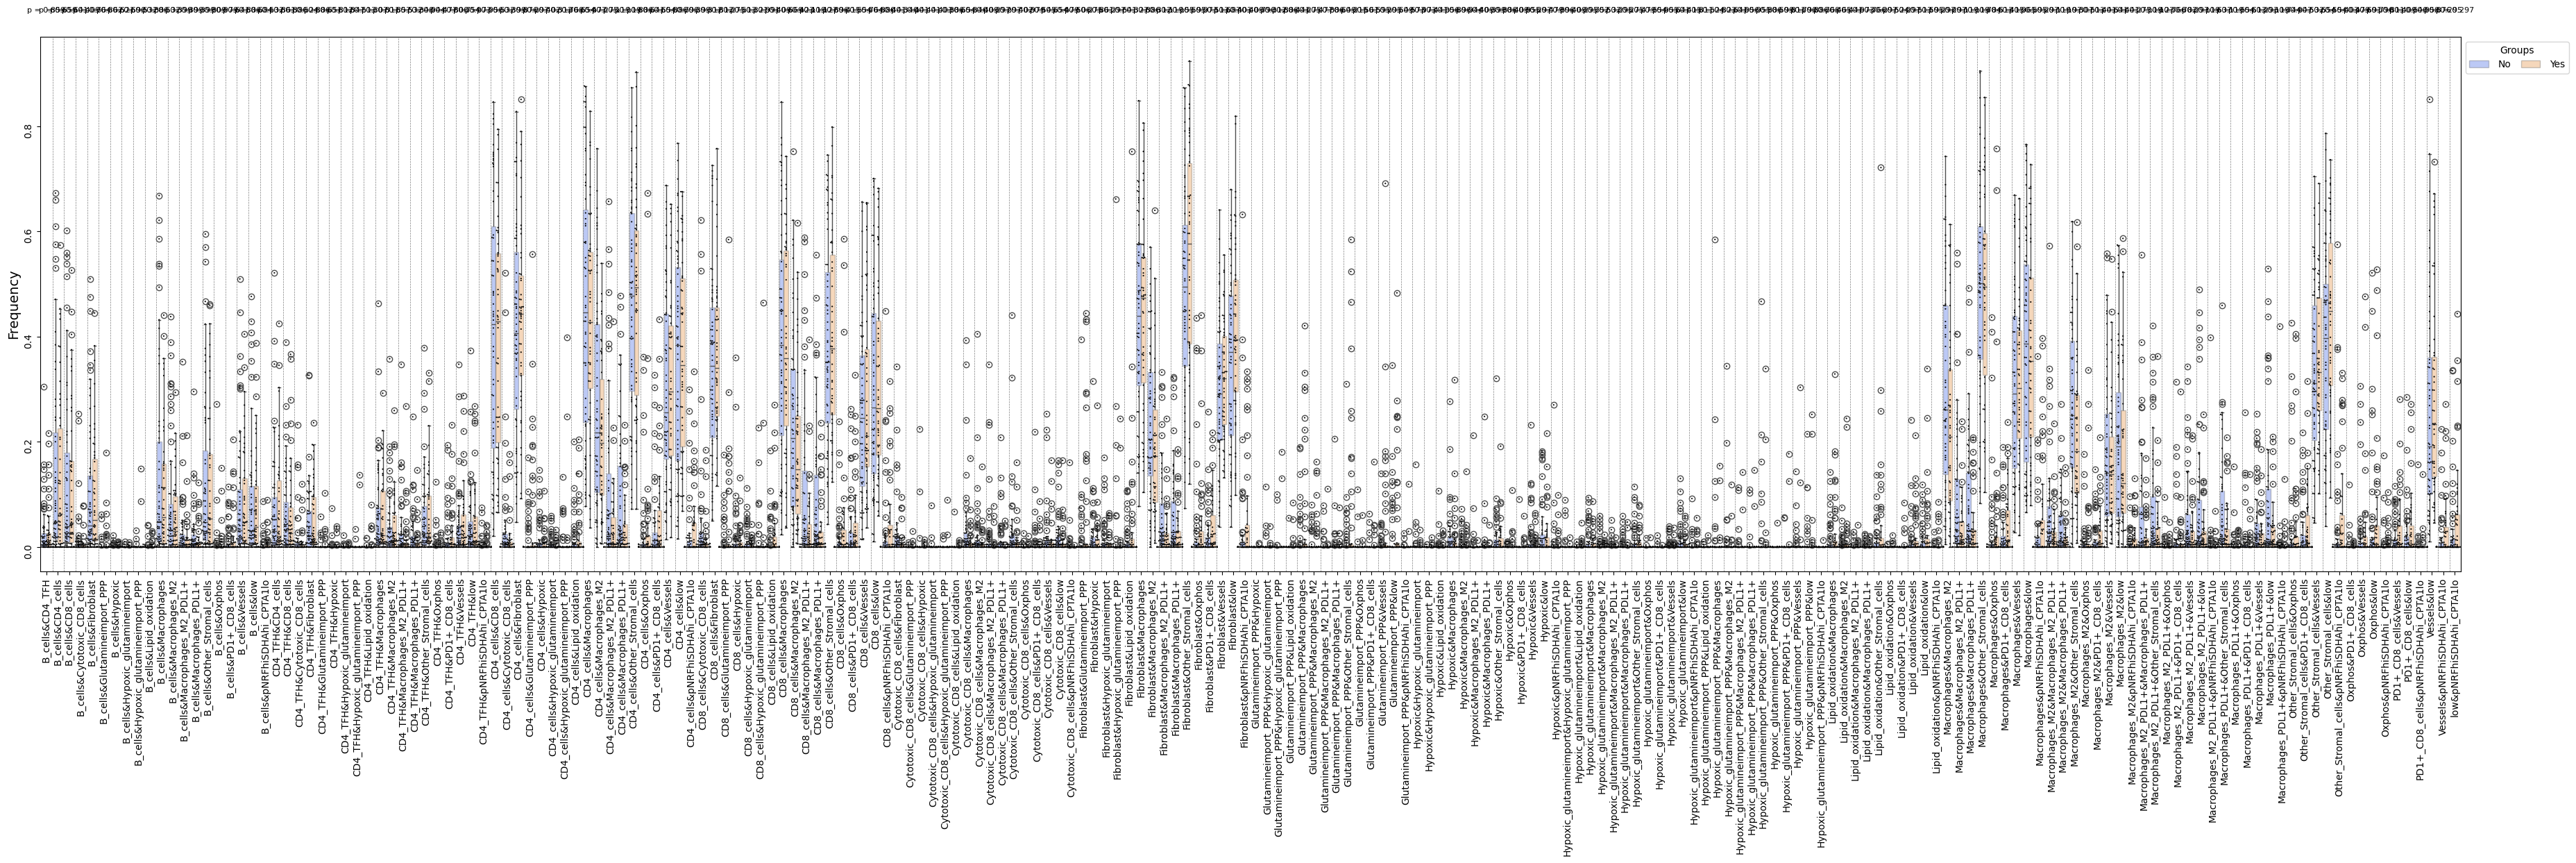

In [166]:
# Global Cell Co-Occurrence
selected_cell_types = sorted(hot_co_occurrence_melted_avg['Cell Combination'].unique())
selected_p_values = []

# Perform t-tests
print(f"p-value before correction:")
for ct in selected_cell_types:
    subset = hot_co_occurrence_melted_avg[hot_co_occurrence_melted_avg['Cell Combination'] == ct]
    group1 = subset[subset['Relapse'] == 'Yes']['Frequency']
    group2 = subset[subset['Relapse'] == 'No']['Frequency']

    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"{ct} has p value = {p_value:.3f}")
    selected_p_values.append(p_value)

# Filter the dataframe based on selected Cell Combinations
df_filtered = hot_co_occurrence_melted_avg[hot_co_occurrence_melted_avg['Cell Combination'].isin(selected_cell_types)]

# Plot the filtered data
fig, ax = plt.subplots(figsize=(45,10))
sns.boxplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Relapse', palette='bright', boxprops=dict(alpha=.3), ax=ax, dodge=True,order=selected_cell_types)
sns.swarmplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Relapse', palette='dark:black', size=1.0, dodge=True,order=selected_cell_types, ax=ax, edgecolor='gray', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Groups", handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1), ncol=3, frameon=True)

selected_p_values = np.array(selected_p_values)
selected_p_values = selected_p_values[~np.isnan(selected_p_values)]

hot_pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')
hot_pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')

print('-'*42)
print(f"p-values after correction:")

highlighted_comb = []
yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
for i, ct in enumerate(selected_cell_types):
    ax.text(i, yrange, f"p = {pvals_corrected[i]:.3f}", ha='center', fontsize=8, rotation=0)
    print(f"{ct} in hot spots has p value = {hot_pvals_corrected[i]:.3f}", flush=True)
    if hot_pvals_corrected[i] < 0.05 and p_vals_corrected_dict[ct] >= 0.05:
        highlighted_comb.append(tuple(map(str.strip, ct.split('&'))))
        print(f"{ct} in whole tissue has p value = {p_vals_corrected_dict[ct]:.3f}", flush=True)
        print('*'*42)

for i in range(len(selected_cell_types) - 1):
    ax.axvline(i + 0.55, color='grey', linestyle='--', linewidth=0.5)

ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

## Cold

In [125]:
# Global Cell Co-Occurrence
# Multi-index to single-index column
new_columns = []
for col in cold_co_occurrence_df.columns:
    if isinstance(col, tuple):  # This checks if the column is a MultiIndex
        # Join only if the column name is not 'Mouse' or 'Condition' #"unique_core" not in col and 
        if "Relapse" not in col and "Histology" not in col and "unique_core" not in col:
            new_columns.append('&'.join(map(str, col)).strip())
        else:
            # If 'Mouse' or 'Condition' is in the column, it is not joined with '&'
            new_columns.append(col[0])
    else:
        new_columns.append(col)

cold_co_occurrence_df_single = cold_co_occurrence_df.copy()
cold_co_occurrence_df_single.columns = new_columns
cold_co_occurrence_df_single = cold_co_occurrence_df_single[[col for col in cold_co_occurrence_df_single.columns]]



In [130]:
cold_co_occurrence_df_single.to_csv('cold_cooccurence_xbounds.csv')
hot_co_occurrence_df_single.to_csv('hot_cooccurence_xbounds.csv')
global_co_occurrence_df_single.to_csv('global_cooccurence_xbounds.csv')

In [127]:
cold_co_occurrence_df_single['unique_core'] = cold_co_occurrence_df_single.index

In [129]:
# Melt the DataFrame
cold_co_occurrence_melted = cold_co_occurrence_df_single.melt(id_vars=['unique_core', 'Relapse', 'Histology'], var_name='Cell Combination', value_name='Frequency')
cold_co_occurrence_melted

unique_core Relapse       Histology          Cell Combination  Frequency
0        TMA_A_A1      No  Adenocarcinoma         B_cells&CD4_cells   0.000000
1        TMA_A_A2     Yes        Squamous         B_cells&CD4_cells   0.000000
2        TMA_A_A3     Yes  Adenocarcinoma         B_cells&CD4_cells   0.000000
3        TMA_A_A4      No  Adenocarcinoma         B_cells&CD4_cells   0.000000
4        TMA_A_A5     Yes        Squamous         B_cells&CD4_cells   0.055556
...           ...     ...             ...                       ...        ...
15691    TMA_B_J2     Yes  Adenocarcinoma  low&pNRFhiSDHAhi_CPTA1lo   0.000000
15692    TMA_B_J3      No  Adenocarcinoma  low&pNRFhiSDHAhi_CPTA1lo   0.000000
15693    TMA_B_J4     Yes  Adenocarcinoma  low&pNRFhiSDHAhi_CPTA1lo   0.000000
15694    TMA_B_J7      No  Adenocarcinoma  low&pNRFhiSDHAhi_CPTA1lo   0.000000
15695    TMA_B_J8     Yes  Adenocarcinoma  low&pNRFhiSDHAhi_CPTA1lo   0.000000

[15696 rows x 5 columns]

In [223]:
cold_co_occurrence_melted_avg = cold_co_occurrence_melted.groupby(by=['unique_core', 'Cell Combination', 'Histology', 'Relapse'])['Frequency'].mean().reset_index()
#cold_co_occurrence_melted_avg['Condition'] = global_co_occurrence_melted_avg['Condition'].map(condition_num2str)
cold_co_occurrence_melted_avg

unique_core                     Cell Combination       Histology  \
0        TMA_A_A1                      B_cells&CD4_TFH  Adenocarcinoma   
1        TMA_A_A1                    B_cells&CD4_cells  Adenocarcinoma   
2        TMA_A_A1                    B_cells&CD8_cells  Adenocarcinoma   
3        TMA_A_A1                   B_cells&Fibroblast  Adenocarcinoma   
4        TMA_A_A1              B_cells&Lipid_Oxidation  Adenocarcinoma   
...           ...                                  ...             ...   
26671    TMA_B_J8                          PPP&Vessels  Adenocarcinoma   
26672    TMA_B_J8  PPP_Glutamine_import&Tumour_metalow  Adenocarcinoma   
26673    TMA_B_J8         PPP_Glutamine_import&Vessels  Adenocarcinoma   
26674    TMA_B_J8               Tumour_metalow&Vessels  Adenocarcinoma   
26675    TMA_B_J8                         unqiue_core&  Adenocarcinoma   

      Relapse  Frequency  
0          No        0.0  
1          No        0.0  
2          No        0.0  
3          No        0.0  
4          No        0.0  
...       ...        ...  
26671     Yes        0.0  
26672     Yes        0.0  
26673     Yes        0.0  
26674     Yes        0.0  
26675     Yes        0.0  

[26676 rows x 5 columns]

p-value before correction:
B_cells&CD4_TFH has p value = 0.322
B_cells&CD4_cells has p value = 0.398
B_cells&CD8_cells has p value = 0.357
B_cells&Fibroblast has p value = nan
B_cells&Lipid_Oxidation has p value = 0.321
B_cells&Macrophages has p value = 0.656
B_cells&Macrophages_M2 has p value = 0.321
B_cells&Macrophages_M2_PDL1+ has p value = nan
B_cells&Macrophages_PDL1+ has p value = nan
B_cells&Other_Stromal_cells has p value = 0.615
B_cells&PD1+_CD8_cells has p value = 0.322
B_cells&PPP has p value = nan
B_cells&Tumour_metalow has p value = 0.321
B_cells&Vessels has p value = 0.504
CD4_TFH&CD4_cells has p value = 0.990
CD4_TFH&CD8_cells has p value = 0.383
CD4_TFH&Cytotoxic_CD8_cells has p value = nan
CD4_TFH&Fibroblast has p value = 0.321
CD4_TFH&Lipid_Oxidation has p value = nan
CD4_TFH&Macrophages has p value = 0.322
CD4_TFH&Macrophages_M2 has p value = nan
CD4_TFH&Macrophages_M2_PDL1+ has p value = nan
CD4_TFH&Macrophages_PDL1+ has p value = 0.321
CD4_TFH&Other_Stromal_cells h

/tmp/ipykernel_31637/2997435921.py:22: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Relapse', palette='dark:black', size=1.0, dodge=True,order=selected_cell_types, ax=ax, edgecolor='gray', linewidth=0.5)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 92.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 89.2% of the points cannot b

ValueError: `ps` must include only numbers between 0 and 1.

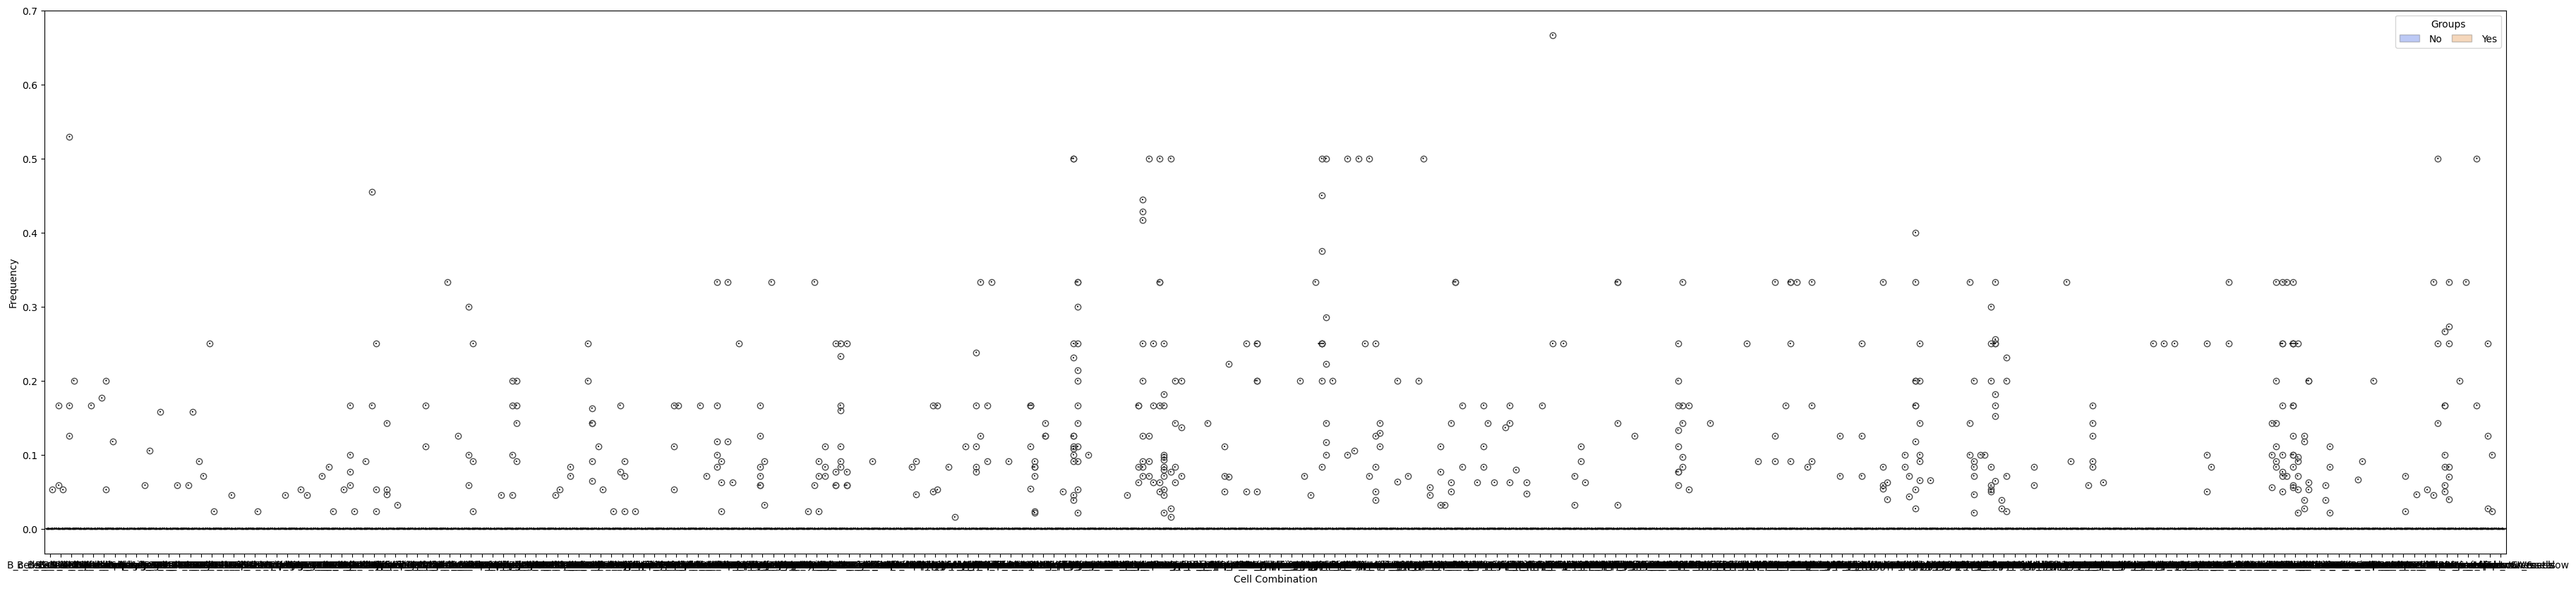

In [224]:
# Global Cell Co-Occurrence
selected_cell_types = sorted(cold_co_occurrence_melted_avg['Cell Combination'].unique())
selected_p_values = []

# Perform t-tests
print(f"p-value before correction:")
for ct in selected_cell_types:
    subset = cold_co_occurrence_melted_avg[cold_co_occurrence_melted_avg['Cell Combination'] == ct]
    group1 = subset[subset['Relapse'] == 'Yes']['Frequency']
    group2 = subset[subset['Relapse'] == 'No']['Frequency']

    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"{ct} has p value = {p_value:.3f}")
    selected_p_values.append(p_value)

# Filter the dataframe based on selected Cell Combinations
df_filtered = cold_co_occurrence_melted_avg[cold_co_occurrence_melted_avg['Cell Combination'].isin(selected_cell_types)]

# Plot the filtered data
fig, ax = plt.subplots(figsize=(45,10))
sns.boxplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Relapse', palette='bright', boxprops=dict(alpha=.3), ax=ax, dodge=True,order=selected_cell_types)
sns.swarmplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Relapse', palette='dark:black', size=1.0, dodge=True,order=selected_cell_types, ax=ax, edgecolor='gray', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Groups", handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1), ncol=3, frameon=True)

pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')

print('-'*42)
print(f"p-values after correction:")

p_vals_corrected_dict = {}
yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
for i, ct in enumerate(selected_cell_types):
    ax.text(i, yrange, f"p = {pvals_corrected[i]:.3f}", ha='center', fontsize=8, rotation=0)
    print(f"{ct} has p value = {pvals_corrected[i]:.3f}", flush=True)
    p_vals_corrected_dict[ct] = pvals_corrected[i]

for i in range(len(selected_cell_types) - 1):
    ax.axvline(i + 0.55, color='grey', linestyle='--', linewidth=0.5)

ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('')
plt.xticks(rotation=90)
plt.show()

In [227]:
global_co_occurrence_df

Macrophages Macrophages_M2_PDL1+             CD4_TFH  \
         Macrophages_PDL1+              Vessels Other_Stromal_cells   
TMA_A_A8          0.000000             0.002315            0.002315   
TMA_A_B8          0.000000             0.003538            0.001179   
TMA_A_C8          0.001157             0.000000            0.004630   
TMA_A_D8          0.000000             0.000000            0.000000   
TMA_A_E8          0.000000             0.001256            0.006281   
...                    ...                  ...                 ...   
TMA_B_J2          0.000000             0.000000            0.000000   
TMA_B_J3          0.079719             0.134818            0.001172   
TMA_B_J4          0.138055             0.037215            0.003601   
TMA_B_J7          0.168646             0.019002            0.029691   
TMA_B_J8          0.000000             0.002345            0.007034   

         Lipid_Oxidation_PPP Oxidative_Stress_Glutamine_import CD8_cells  \
              Tumour_metalow                    Tumour_metalow    OxPhos   
TMA_A_A8            0.000000                          0.000000  0.000000   
TMA_A_B8            0.001179                          0.000000  0.000000   
TMA_A_C8            0.015046                          0.000000  0.000000   
TMA_A_D8            0.019093                          0.000000  0.000000   
TMA_A_E8            0.002513                          0.000000  0.000000   
...                      ...                               ...       ...   
TMA_B_J2            0.077764                          0.023086  0.000000   
TMA_B_J3            0.030481                          0.004689  0.000000   
TMA_B_J4            0.072029                          0.000000  0.000000   
TMA_B_J7            0.065321                          0.033254  0.112827   
TMA_B_J8            0.019930                          0.000000  0.000000   

         Lipid_Oxidation  Other_Stromal_cells                  PPP  \
          Tumour_metalow PPP_Glutamine_import PPP_Glutamine_import   
TMA_A_A8        0.000000             0.193287             0.001157   
TMA_A_B8        0.000000             0.195755             0.004717   
TMA_A_C8        0.005787             0.149306             0.167824   
TMA_A_D8        0.001193             0.270883             0.178998   
TMA_A_E8        0.006281             0.074121             0.005025   
...                  ...                  ...                  ...   
TMA_B_J2        0.360875             0.036452             0.105711   
TMA_B_J3        0.048066             0.120750             0.357562   
TMA_B_J4        0.056423             0.056423             0.057623   
TMA_B_J7        0.439430             0.156770             0.071259   
TMA_B_J8        0.005862             0.050410             0.084408   

              CD8_cells  ... Hypoxic_PPP_Glutamine_import Glutamine_import  \
         PD1+_CD8_cells  ...          Other_Stromal_cells          Vessels   
TMA_A_A8       0.043981  ...                     0.114583         0.000000   
TMA_A_B8       0.001179  ...                     0.119104         0.001179   
TMA_A_C8       0.001157  ...                     0.009259         0.004630   
TMA_A_D8       0.001193  ...                     0.004773         0.000000   
TMA_A_E8       0.001256  ...                     0.003769         0.000000   
...                 ...  ...                          ...              ...   
TMA_B_J2       0.000000  ...                     0.012151         0.031592   
TMA_B_J3       0.000000  ...                     0.021102         0.050410   
TMA_B_J4       0.000000  ...                     0.040816         0.004802   
TMA_B_J7       0.000000  ...                     0.008314         0.036817   
TMA_B_J8       0.000000  ...                     0.003517         0.008206   

          Lipid_Oxidation_PPP           CD4_cells Cytotoxic_CD8_cells  \
         PPP_Glutamine_import Cytotoxic_CD8_cells         Macrophages   
TMA_A_A8             0.005787 

In [139]:
global_co_occurrence_df['unqiue_core'] = global_co_occurrence_df.index

# circle plot

In [140]:
circoplot_df1 = global_co_occurrence_df.sort_index(axis=1, level=[0,1]).drop(columns=['unqiue_core', 'Histology'])

In [141]:
circoplot_df1

B_cells                                                     \
           CD4_TFH CD4_cells CD8_cells Cytotoxic_CD8_cells Fibroblast   
TMA_A_A1  0.000000  0.000000  0.000000            0.000000   0.001183   
TMA_A_A2  0.044499  0.113721  0.121137            0.002472   0.090235   
TMA_A_A3  0.007059  0.017647  0.005882            0.000000   0.005882   
TMA_A_A4  0.020681  0.025547  0.006083            0.000000   0.014599   
TMA_A_A5  0.094229  0.310954  0.153121            0.000000   0.243816   
...            ...       ...       ...                 ...        ...   
TMA_B_J2  0.000000  0.001215  0.006075            0.000000   0.008505   
TMA_B_J3  0.000000  0.016413  0.017585            0.000000   0.004689   
TMA_B_J4  0.000000  0.025210  0.022809            0.000000   0.025210   
TMA_B_J7  0.033254  0.409739  0.337292            0.000000   0.254157   
TMA_B_J8  0.003517  0.097304  0.094959            0.000000   0.063306   

                                                                \
         Glutamineimport_PPP   Hypoxic Hypoxic_glutamineimport   
TMA_A_A1            0.000000  0.000000                0.000000   
TMA_A_A2            0.000000  0.004944                0.001236   
TMA_A_A3            0.000000  0.000000                0.000000   
TMA_A_A4            0.000000  0.000000                0.000000   
TMA_A_A5            0.000000  0.000000                0.000000   
...                      ...       ...                     ...   
TMA_B_J2            0.000000  0.000000                0.000000   
TMA_B_J3            0.001172  0.000000                0.002345   
TMA_B_J4            0.000000  0.000000                0.000000   
TMA_B_J7            0.000000  0.000000                0.000000   
TMA_B_J8            0.083236  0.000000                0.000000   

                                                      ...    Oxphos  \
         Hypoxic_glutamineimport_PPP Lipid_oxidation  ...       low   
TMA_A_A1                         0.0        0.000000  ...  0.081657   
TMA_A_A2                         0.0        0.006180  ...  0.001236   
TMA_A_A3                         0.0        0.000000  ...  0.001176   
TMA_A_A4                         0.0        0.000000  ...  0.004866   
TMA_A_A5                         0.0        0.000000  ...  0.000000   
...                              ...             ...  ...       ...   
TMA_B_J2                         0.0        0.000000  ...  0.007290   
TMA_B_J3                         0.0        0.000000  ...  0.000000   
TMA_B_J4                         0.0        0.000000  ...  0.000000   
TMA_B_J7                         0.0        0.038005  ...  0.005938   
TMA_B_J8                         0.0        0.002345  ...  0.003517   

                              PD1+_CD8_cells                                 \
         pNRFhiSDHAhi_CPTA1lo        Vessels       low pNRFhiSDHAhi_CPTA1lo   
TMA_A_A1             0.000000       0.000000  0.000000             0.000000   
TMA_A_A2             0.013597       0.096415  0.038319             0.126082   
TMA_A_A3             0.000000       0.025882  0.043529             0.000000   
TMA_A_A4             0.000000       0.040146  0.104623             0.000000   
TMA_A_A5             0.000000       0.117786  0.134276             0.000000   
...                       ...            ...       ...                  ...   
TMA_B_J2             0.004860       0.000000  0.000000             0.000000   
TMA_B_J3             0.000000       0.000000  0.000000             0.000000   
TMA_B_J4             0.000000       0.000000  0.000000             0.000000   
TMA_B_J7             0.000000       0.000000  0.000000             0.000000   
TMA_B_J8             0.000000       0.000000  0.000000             0.000000   

         Relapse   Vessels                                       low  \
                       low pNRFhiSDHAhi_CPTA1lo pNRFhiSDHAhi_CPTA1lo   
TMA_A_A1      No  0.042604             0.000000             0.000000   
TMA_A_A2     Yes  0.170581        

In [142]:
global_co_occurrence_df['Relapse'] = global_co_occurrence_df.index.map(region_to_relapse)

In [163]:
global_cellfreq_df['Relapse'] = global_cellfreq_df.index.map(region_to_relapse)

In [144]:
circoplot_df1

B_cells                                                     \
           CD4_TFH CD4_cells CD8_cells Cytotoxic_CD8_cells Fibroblast   
TMA_A_A1  0.000000  0.000000  0.000000            0.000000   0.001183   
TMA_A_A2  0.044499  0.113721  0.121137            0.002472   0.090235   
TMA_A_A3  0.007059  0.017647  0.005882            0.000000   0.005882   
TMA_A_A4  0.020681  0.025547  0.006083            0.000000   0.014599   
TMA_A_A5  0.094229  0.310954  0.153121            0.000000   0.243816   
...            ...       ...       ...                 ...        ...   
TMA_B_J2  0.000000  0.001215  0.006075            0.000000   0.008505   
TMA_B_J3  0.000000  0.016413  0.017585            0.000000   0.004689   
TMA_B_J4  0.000000  0.025210  0.022809            0.000000   0.025210   
TMA_B_J7  0.033254  0.409739  0.337292            0.000000   0.254157   
TMA_B_J8  0.003517  0.097304  0.094959            0.000000   0.063306   

                                                                \
         Glutamineimport_PPP   Hypoxic Hypoxic_glutamineimport   
TMA_A_A1            0.000000  0.000000                0.000000   
TMA_A_A2            0.000000  0.004944                0.001236   
TMA_A_A3            0.000000  0.000000                0.000000   
TMA_A_A4            0.000000  0.000000                0.000000   
TMA_A_A5            0.000000  0.000000                0.000000   
...                      ...       ...                     ...   
TMA_B_J2            0.000000  0.000000                0.000000   
TMA_B_J3            0.001172  0.000000                0.002345   
TMA_B_J4            0.000000  0.000000                0.000000   
TMA_B_J7            0.000000  0.000000                0.000000   
TMA_B_J8            0.083236  0.000000                0.000000   

                                                      ...    Oxphos  \
         Hypoxic_glutamineimport_PPP Lipid_oxidation  ...       low   
TMA_A_A1                         0.0        0.000000  ...  0.081657   
TMA_A_A2                         0.0        0.006180  ...  0.001236   
TMA_A_A3                         0.0        0.000000  ...  0.001176   
TMA_A_A4                         0.0        0.000000  ...  0.004866   
TMA_A_A5                         0.0        0.000000  ...  0.000000   
...                              ...             ...  ...       ...   
TMA_B_J2                         0.0        0.000000  ...  0.007290   
TMA_B_J3                         0.0        0.000000  ...  0.000000   
TMA_B_J4                         0.0        0.000000  ...  0.000000   
TMA_B_J7                         0.0        0.038005  ...  0.005938   
TMA_B_J8                         0.0        0.002345  ...  0.003517   

                              PD1+_CD8_cells                                 \
         pNRFhiSDHAhi_CPTA1lo        Vessels       low pNRFhiSDHAhi_CPTA1lo   
TMA_A_A1             0.000000       0.000000  0.000000             0.000000   
TMA_A_A2             0.013597       0.096415  0.038319             0.126082   
TMA_A_A3             0.000000       0.025882  0.043529             0.000000   
TMA_A_A4             0.000000       0.040146  0.104623             0.000000   
TMA_A_A5             0.000000       0.117786  0.134276             0.000000   
...                       ...            ...       ...                  ...   
TMA_B_J2             0.004860       0.000000  0.000000             0.000000   
TMA_B_J3             0.000000       0.000000  0.000000             0.000000   
TMA_B_J4             0.000000       0.000000  0.000000             0.000000   
TMA_B_J7             0.000000       0.000000  0.000000             0.000000   
TMA_B_J8             0.000000       0.000000  0.000000             0.000000   

         Relapse   Vessels                                       low  \
                       low pNRFhiSDHAhi_CPTA1lo pNRFhiSDHAhi_CPTA1lo   
TMA_A_A1      No  0.042604             0.000000             0.000000   
TMA_A_A2     Yes  0.170581        

In [ ]:
circoplot_df1 = circoplot_df1.groupby('Relapse').mean().reset_index()

In [158]:
global_co_occurrence_df

B_cells                                                     \
           CD4_TFH CD4_cells CD8_cells Cytotoxic_CD8_cells Fibroblast   
TMA_A_A1  0.000000  0.000000  0.000000            0.000000   0.001183   
TMA_A_A2  0.044499  0.113721  0.121137            0.002472   0.090235   
TMA_A_A3  0.007059  0.017647  0.005882            0.000000   0.005882   
TMA_A_A4  0.020681  0.025547  0.006083            0.000000   0.014599   
TMA_A_A5  0.094229  0.310954  0.153121            0.000000   0.243816   
...            ...       ...       ...                 ...        ...   
TMA_B_J2  0.000000  0.001215  0.006075            0.000000   0.008505   
TMA_B_J3  0.000000  0.016413  0.017585            0.000000   0.004689   
TMA_B_J4  0.000000  0.025210  0.022809            0.000000   0.025210   
TMA_B_J7  0.033254  0.409739  0.337292            0.000000   0.254157   
TMA_B_J8  0.003517  0.097304  0.094959            0.000000   0.063306   

                                                                \
         Glutamineimport_PPP   Hypoxic Hypoxic_glutamineimport   
TMA_A_A1            0.000000  0.000000                0.000000   
TMA_A_A2            0.000000  0.004944                0.001236   
TMA_A_A3            0.000000  0.000000                0.000000   
TMA_A_A4            0.000000  0.000000                0.000000   
TMA_A_A5            0.000000  0.000000                0.000000   
...                      ...       ...                     ...   
TMA_B_J2            0.000000  0.000000                0.000000   
TMA_B_J3            0.001172  0.000000                0.002345   
TMA_B_J4            0.000000  0.000000                0.000000   
TMA_B_J7            0.000000  0.000000                0.000000   
TMA_B_J8            0.083236  0.000000                0.000000   

                                                      ... PD1+_CD8_cells  \
         Hypoxic_glutamineimport_PPP Lipid_oxidation  ...        Vessels   
TMA_A_A1                         0.0        0.000000  ...       0.000000   
TMA_A_A2                         0.0        0.006180  ...       0.096415   
TMA_A_A3                         0.0        0.000000  ...       0.025882   
TMA_A_A4                         0.0        0.000000  ...       0.040146   
TMA_A_A5                         0.0        0.000000  ...       0.117786   
...                              ...             ...  ...            ...   
TMA_B_J2                         0.0        0.000000  ...       0.000000   
TMA_B_J3                         0.0        0.000000  ...       0.000000   
TMA_B_J4                         0.0        0.000000  ...       0.000000   
TMA_B_J7                         0.0        0.038005  ...       0.000000   
TMA_B_J8                         0.0        0.002345  ...       0.000000   

                                          Vessels                       \
               low pNRFhiSDHAhi_CPTA1lo       low pNRFhiSDHAhi_CPTA1lo   
TMA_A_A1  0.000000             0.000000  0.042604             0.000000   
TMA_A_A2  0.038319             0.126082  0.170581             0.185414   
TMA_A_A3  0.043529             0.000000  0.154118             0.000000   
TMA_A_A4  0.104623             0.000000  0.043796             0.000000   
TMA_A_A5  0.134276             0.000000  0.207303             0.000000   
...            ...                  ...       ...                  ...   
TMA_B_J2  0.000000             0.000000  0.087485             0.063183   
TMA_B_J3  0.000000             0.000000  0.085580             0.002345   
TMA_B_J4  0.000000             0.000000  0.180072             0.000000   
TMA_B_J7  0.000000             0.000000  0.127078             0.000000   
TMA_B_J8  0.000000             0.000000  0.290739             0.000000   

                          low       Histology Relapse unique_core unqiue_core  
         pNRFhiSDHAhi_CPTA1lo                                                  
TMA_A_A1             0.000000  Adenocarcinoma      No    TMA_A_A1    TMA_A_A1  
TMA_A_A2  

In [160]:
circoplot_df1 = global_co_occurrence_df.sort_index(axis=1, level=[0,1]).drop(columns=['unqiue_core','unique_core', 'Histology'])
#circoplot_df1 = global_co_occurrence_df.sort_index(axis=1, level=[0,1]).drop(columns=['unique_core'])
#circoplot_df1 = global_co_occurrence_df.sort_index(axis=1, level=[0,1]).drop(columns=['Histology'])
#circoplot_df1['Relapse'] = circoplot_df1['Relapse'].map(condition_num2str)
#circoplot_df1 = circoplot_df1[[col for col in circoplot_df1.columns if 'undefined' not in col]]
# Group by 'Condition' and calculate the mean of the other columns
circoplot_df1 = circoplot_df1.groupby('Relapse').mean().reset_index()
circoplot_df1 = circoplot_df1.set_index('Relapse')
circoplot_df1

B_cells                                                     \
          CD4_TFH CD4_cells CD8_cells Cytotoxic_CD8_cells Fibroblast   
Relapse                                                                
No       0.012785  0.075418  0.066585            0.005860   0.052226   
Yes      0.011149  0.061379  0.052601            0.001764   0.044547   

                                                               \
        Glutamineimport_PPP   Hypoxic Hypoxic_glutamineimport   
Relapse                                                         
No                 0.001571  0.001962                0.000560   
Yes                0.005465  0.001147                0.000358   

                                                     ...         Oxphos  \
        Hypoxic_glutamineimport_PPP Lipid_oxidation  ... PD1+_CD8_cells   
Relapse                                              ...                  
No                         0.000478        0.001834  ...       0.002857   
Yes                        0.002382        0.001541  ...       0.000741   

                                                 PD1+_CD8_cells            \
          Vessels       low pNRFhiSDHAhi_CPTA1lo        Vessels       low   
Relapse                                                                     
No       0.017129  0.033582             0.006810       0.008664  0.012775   
Yes      0.026467  0.042103             0.009341       0.017148  0.019584   

                               Vessels                       \
        pNRFhiSDHAhi_CPTA1lo       low pNRFhiSDHAhi_CPTA1lo   
Relapse                                                       
No                  0.003201  0.161722             0.010290   
Yes                 0.003543  0.171872             0.025239   

                         low  
        pNRFhiSDHAhi_CPTA1lo  
Relapse                       
No                  0.019445  
Yes                 0.042768  

[2 rows x 210 columns]

In [162]:
global_cellfreq_df.columns

Index(['B_cells', 'CD4_TFH', 'CD4_cells', 'CD8_cells', 'Cytotoxic_CD8_cells',
       'Fibroblast', 'Glutamineimport_PPP', 'Hypoxic',
       'Hypoxic_glutamineimport', 'Hypoxic_glutamineimport_PPP',
       'Lipid_oxidation', 'Macrophages', 'Macrophages_M2',
       'Macrophages_M2_PDL1+', 'Macrophages_PDL1+', 'Other_Stromal_cells',
       'Oxphos', 'PD1+_CD8_cells', 'Vessels', 'low', 'pNRFhiSDHAhi_CPTA1lo'],
      dtype='object', name='nb_immune')

In [164]:
circoplot_df2 = global_cellfreq_df#.drop(columns=['unqiue_core','unique_core', 'Histology'])
#circoplot_df2['Condition'] = circoplot_df2['Condition'].map(condition_num2str)
# Group by 'Condition' and calculate the mean of the other columns
circoplot_df2 = circoplot_df2.groupby('Relapse').mean().reset_index()
circoplot_df2 = circoplot_df2.set_index('Relapse')
circoplot_df2

nb_immune   B_cells   CD4_TFH  CD4_cells  CD8_cells  Cytotoxic_CD8_cells  \
Relapse                                                                    
No         0.021433  0.004869   0.090010   0.058147             0.004161   
Yes        0.018871  0.004206   0.070115   0.047704             0.000807   

nb_immune  Fibroblast  Glutamineimport_PPP   Hypoxic  Hypoxic_glutamineimport  \
Relapse                                                                         
No           0.097839             0.016683  0.043565                 0.044884   
Yes          0.089925             0.069311  0.037997                 0.022536   

nb_immune  Hypoxic_glutamineimport_PPP  ...  Macrophages  Macrophages_M2  \
Relapse                                 ...                                
No                            0.047264  ...     0.107359        0.033705   
Yes                           0.016529  ...     0.073290        0.022775   

nb_immune  Macrophages_M2_PDL1+  Macrophages_PDL1+  Other_Stromal_cells  \
Relapse                                                                   
No                     0.010699           0.015115             0.109613   
Yes                    0.003041           0.003521             0.115595   

nb_immune    Oxphos  PD1+_CD8_cells   Vessels       low  pNRFhiSDHAhi_CPTA1lo  
Relapse                                                                        
No         0.045561        0.003301  0.066417  0.146323              0.024058  
Yes        0.040352        0.004760  0.054557  0.189038              0.064280  

[2 rows x 21 columns]

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

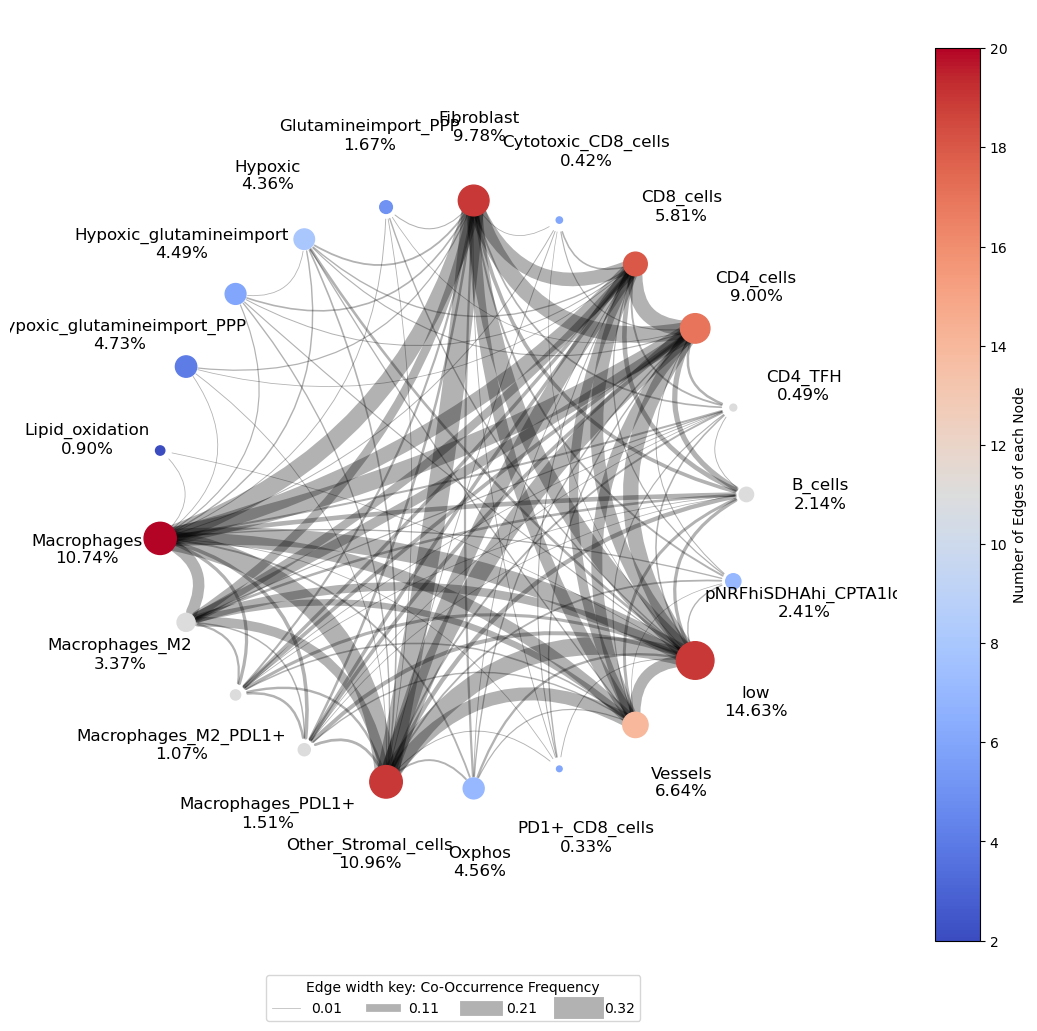

In [169]:
patient_group = 'No'
eco.create_circos_plot(circoplot_df1.loc[[patient_group]],
                       cell_type_colors_hex=None,
                       cell_abundance=circoplot_df2.loc[[patient_group]],
                       threshold=0.01,
                       edge_weights_scaler=50,
                       highlighted_edges=highlighted_comb,
                       node_weights_scaler=5000,
                       figure_size=(10,10),
                       save_path='Non_responder_globalcellcooccurrence.svg')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

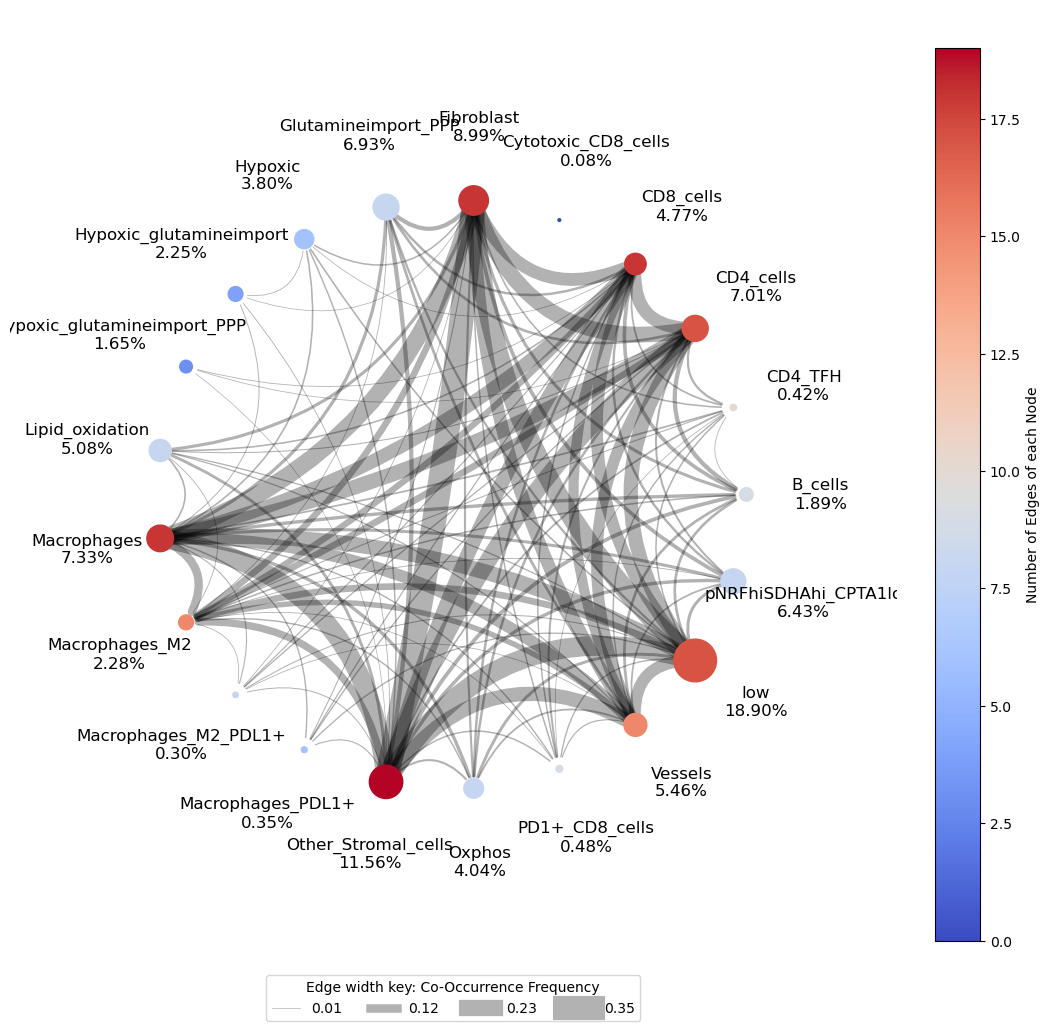

In [170]:
patient_group = 'Yes'
eco.create_circos_plot(circoplot_df1.loc[[patient_group]],
                       cell_type_colors_hex=None,
                       cell_abundance=circoplot_df2.loc[[patient_group]],
                       threshold=0.01,
                       edge_weights_scaler=50,
                       highlighted_edges=highlighted_comb,
                       node_weights_scaler=5000,
                       figure_size=(10,10),
                       save_path='responder_globalcellcooccurrence.svg')

# Visualisation

In [264]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y',
       'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB',
       'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology',
       'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate',
       'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       'FOXP3_pos', 'Ki67_pos', 'Gra

17.188 per cent patches are empty


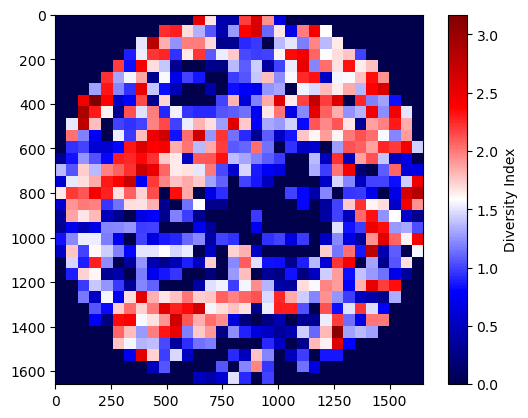

In [52]:
# Visualize the diversity indices of quadrats
sampleID = [#'TMA_A_H2',
            'TMA_A_A6']#,'TMA_A_E4']
scale =32.
for sample in sampleID:
    # Generate Quardrats
    patches_coordinates = eco.generate_patches(spatial_data=adata,
                                           library_key='unique_core',
                                           library_id=sample,
                                           scaling_factor=scale,
                                           spatial_key='spatial')



    patch_indices, patches_comp = eco.calculate_diversity_index(spatial_data=adata,
                                                            library_key='unique_core',
                                                            library_id=sample,
                                                            spatial_key='spatial',
                                                            patches=patches_coordinates,
                                                            cluster_key='nb_immune',
                                                            metric='Shannon Diversity', return_comp=True)



    grid, heatmap_fig = eco.diversity_heatmap(spatial_data=adata,
                                          library_key='unique_core',
                                          library_id=sample,
                                          spatial_key='spatial',
                                          patches=patches_coordinates,
                                          heterogeneity_indices=patch_indices,
                                          tissue_only=False,
                                          plot=True,
                                          return_fig=True)

In [ ]:
patches_comp

Using MoranI


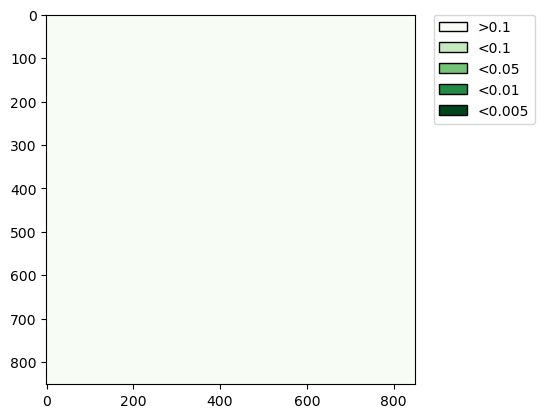

In [270]:


    
heatmap_fig = eco.signif_heatmap(spatial_data=adata,
                                 library_key='unique_core',
                                 library_id='TMA_A_H2',
                                 spatial_key='spatial',
                                 patches=patches_coordinates,
                                 heterogeneity_indices=pd.Series(lisa.p_sim),
                                 tissue_only=False,
                                 plot=True,
                                 discrete=True,
                                 return_fig=True)




Using MoranI


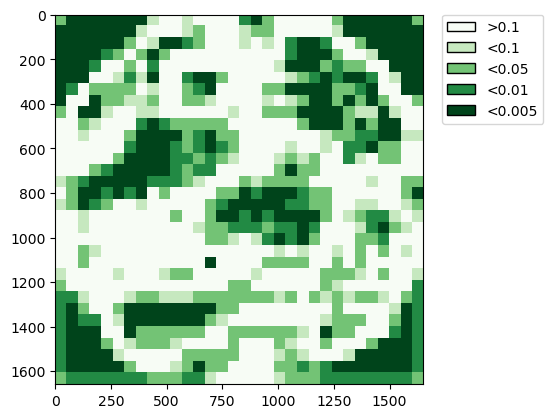

In [53]:
_, _, lisa = eco.local_spatial_stats(grid=grid,
                                     mode='MoranI',
                                     tissue_only=False,
                                     p_value=0.01,
                                     seed=42,
                                     plot_weights=False,
                                     return_stats=True)
#for sample in sampleID:

heatmap_fig = eco.signif_heatmap(spatial_data=adata,
                                 library_key='unique_core',
                                 library_id='TMA_A_A6',
                                 spatial_key='spatial',
                                 patches=patches_coordinates,
                                 heterogeneity_indices=pd.Series(lisa.p_sim),
                                 tissue_only=False,
                                 plot=True,
                                 discrete=True,
                                 return_fig=True)


In [ ]:
patches_coordinates

In [13]:
patches_coordinates = eco.generate_patches(spatial_data=adata,
                                           library_key='unique_core',
                                           library_id='TMA_A_G6',
                                           scaling_factor=scale,
                                           spatial_key='spatial')



patch_indices, patches_comp = eco.calculate_diversity_index(spatial_data=adata,
                                                            library_key='unique_core',
                                                            library_id='TMA_A_G6',
                                                            spatial_key='spatial',
                                                            patches=patches_coordinates,
                                                            cluster_key='CT_metatumour_funcimmu',
                                                            metric='Shannon Diversity', return_comp=True)

grid, heatmap_fig = eco.diversity_heatmap(spatial_data=adata,
                                          library_key='unique_core',
                                          library_id='TMA_AG',
                                          spatial_key='spatial',
                                          patches=patches_coordinates,
                                          heterogeneity_indices=patch_indices,
                                          tissue_only=False,
                                          plot=True,
                                          return_fig=True)

_, _, lisa = eco.local_spatial_stats(grid=grid,
                                     mode='MoranI',
                                     tissue_only=False,
                                     p_value=0.01,
                                     seed=42,
                                     plot_weights=False,
                                     return_stats=True)
#for sample in sampleID:

heatmap_fig = eco.signif_heatmap(spatial_data=adata,
                                 library_key='unique_core',
                                 library_id='TMA_A_G6',
                                 spatial_key='spatial',
                                 patches=patches_coordinates,
                                 heterogeneity_indices=pd.Series(lisa.p_sim),
                                 tissue_only=False,
                                 plot=True,
                                 discrete=True,
                                 return_fig=True)


#_, _, lisa = eco.local_spatial_stats(grid=grid,
#                                     mode='MoranI',
#                                     tissue_only=False,
#                                     p_value=0.01,
#                                     seed=42,
#                                     plot_weights=False,
#                                     return_stats=True)
#
#heatmap_fig = eco.signif_heatmap(spatial_data=adata,
#                                 library_key='unique_core',
#                                 library_id='TMA_A_G6',
#                                 spatial_key='spatial',
#                                 patches=patches_coordinates,
#                                 heterogeneity_indices=pd.Series(lisa.p_sim),
#                                 tissue_only=False,
#                                 plot=True,
#                                 discrete=True,
#                                 return_fig=True)

18.262 per cent patches are empty


ValueError: zero-size array to reduction operation minimum which has no identity

In [282]:
spatial_value

ArrayView([[4613.87475, 5750.118  ],
           [4605.12855, 5759.1693 ],
           [4612.45095, 5759.4744 ],
           ...,
           [4579.09335, 6585.53265],
           [4544.8713 , 6585.6852 ],
           [4594.7043 , 6586.3971 ]])

In [294]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y',
       'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB',
       'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology',
       'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate',
       'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       'FOXP3_pos', 'Ki67_pos', 'Gra

In [15]:
adata

AnnData object with n_obs × n_vars = 1187511 × 48
    obs: 'Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y', 'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity', 'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type', 'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy', 'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB', 'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology', 'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate', 'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse', 'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status', 'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion', 'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc', 'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos', 'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos', 'FOXP3_pos', 'Ki67_pos', 'Granzyme_B_pos', 'G6PD_pos', 'pNRF2_pos', 

In [30]:
spatial_value.min(axis=0)

x    12639.7
y    16418.2
dtype: float64

In [13]:
sample_id = ['TMA_A_A6']

In [55]:
spatial_value = protein[protein['unique_core']==sample_id][['x', 'y']]

In [54]:
# Visualise hot/coldspots

sample_id = 'TMA_A_A6'

# Calculate LDI and find hot/coldspots
hotspots, coldspots = eco.local_spatial_stats(grid, mode='MoranI', p_value=0.05, tissue_only=False)



Using MoranI


In [21]:
coldspots

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [56]:
combined_spots = (hotspots * 1) + (coldspots * -1)
seismic = plt.cm.seismic
colors = [seismic(0), "white", seismic(0.999)]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_map", colors)

In [328]:
patch_indices

11     -0.000000
12     -0.000000
13      1.000000
14      1.842371
15      1.351644
          ...   
1008    3.182006
1009    1.789929
1010    1.792481
1011    2.121928
1012    1.921928
Length: 840, dtype: float64

In [24]:
protein = adata.obs

In [44]:
patches_coordinates = eco.generate_patches(spatial_data=protein,
                                           library_key='unique_core',
                                           library_id=sample_id,
                                           scaling_factor=scale,
                                           spatial_key=['x','y'])



patch_indices, patches_comp = eco.calculate_diversity_index(spatial_data=protein,
                                                            library_key='unique_core',
                                                            library_id=sample_id,
                                                            spatial_key=['x','y'],
                                                            patches=patches_coordinates,
                                                            cluster_key='CT_metatumour_funcimmu',
                                                            metric='Shannon Diversity', return_comp=True)

17.188 per cent patches are empty


In [57]:
import pandas as pd

# Dictionary to store patch indices for each sample
patch_indices_dict = {}

sample_ids = ['TMA_A_A6'] #list(set(adata.obs['unique_core']))

# Loop over each sample
for sample_id in sample_ids:
    patches_coordinates = eco.generate_patches(
        spatial_data=protein,
        library_key='unique_core',
        library_id=sample_id,
        scaling_factor=scale,
        spatial_key=['x', 'y']
    )
    
    patch_indices, patches_comp = eco.calculate_diversity_index(
        spatial_data=protein,
        library_key='unique_core',
        library_id=sample_id,
        spatial_key=['x', 'y'],
        patches=patches_coordinates,
        cluster_key='nb_immune',
        metric='Shannon Diversity',
        return_comp=True
    )
    
    # Save patch indices to dictionary
    patch_indices_dict[sample_id] = patch_indices

# Convert dictionary to DataFrame
patch_indices_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in patch_indices_dict.items()]))

# Check result
print(patch_indices_df.head())


17.188 per cent patches are empty
    TMA_A_A6
11 -0.000000
12  2.521641
13  1.664498
14  0.413817
15  0.391244


In [50]:
patch_indices_df

TMA_A_G6
12    2.321928
13    1.491115
14    2.199688
15    2.345852
16    2.434250
...        ...
1009  1.156780
1010  1.483832
1011 -0.000000
1012  0.811278
1013  1.000000

[837 rows x 1 columns]

In [338]:
len(patch_indices_df['TMA_B_C7'])

963

width: 1652.600, height: 1658.840


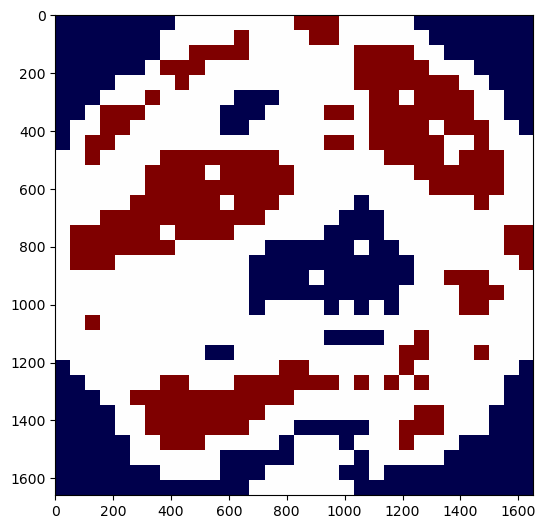

In [58]:
min_x, min_y = spatial_value.min(axis=0)['x'], spatial_value.min(axis=0)['y']
max_x, max_y = spatial_value.max(axis=0)['x'], spatial_value.max(axis=0)['y']
width = max_x - min_x
height = max_y - min_y
print(f"width: {width:.3f}, height: {height:.3f}")
w, h = figaspect(height/width)

spot_fig = plt.figure(figsize=(w, h))
ax = spot_fig.add_axes([0, 0, 1, 1])

# Create a 2D grid
grid = np.zeros((int(max_y - min_y + 1), int(max_x - min_x + 1)))

# Fill the grid with heterogeneity indices
for patch, diversity_index in enumerate(combined_spots.flatten()):
    x0, y0, x1, y1 = patches_coordinates[patch]
    grid[int(y0-min_y):int(y1-min_y+1), int(x0-min_x):int(x1-min_x+1)] = diversity_index

# Plot the heatmap
ax.imshow(grid, cmap=cmap, interpolation='none', vmin=-1, vmax=1)

In [36]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y',
       'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB',
       'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology',
       'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate',
       'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       'FOXP3_pos', 'Ki67_pos', 'Gra

In [31]:
from matplotlib import colors as mcolors
from matplotlib import colormaps

tab10 = colormaps['tab10']
tab20b = colormaps['tab20b']
tab20c = colormaps['tab20c']

# Extract specific colors by indexing into the colormap (values from 0 to 1)
# From tab20b: indices 8 to 19
colors_from_tab20b = [tab20b(i) for i in range(8, 20)] + [tab20b(0),tab20b(4),tab20b(3)]
# From tab20c: indices 0-3, 8-11, and 16-19
colors_from_tab20c = [tab20c(i) for i in range(4)] + [tab20c(i) for i in range(8, 12)] + [tab20c(i) for i in range(16, 20)]


# Combine the colors into a custom palette
custom_palette = colors_from_tab20c + colors_from_tab20b
cell_names = list(set(adata.obs['protein_exp_nb']))
colors_hex = [mcolors.rgb2hex(color) for color in custom_palette]
color_dict = dict(zip(cell_names, colors_hex))
color_dict['Glutamineimport_PPP'] = '#9000b3ff'
color_dict['Hypoxic'] = '#735cddff'
color_dict['Hypoxic_glutamineimport']= '#b3c2f2ff'
color_dict['Hypoxic_glutamineimport_PPP'] = '#5ecb6cff'
color_dict['Lipid_oxidation'] = '#8cd867ff'
color_dict['Oxphos'] = '#ed7d3aff'
color_dict['low'] = '#ef2d56ff'
color_dict['pNRFhiSDHAhi_CPTA1lo'] = '#363537ff'

color_dict['Fibroblast'] = '#0094C6'# middle blue
color_dict['CD4_cells'] = '#F08CAE' # middle pink 
color_dict['CD4_TFH'] = '#FFB2E6' # middle/light pink 
color_dict['B_cells'] = '#BCEDF6'
color_dict['Macrophages_M2'] = '#143109' # dark green 
color_dict['Macrophages_M2_PDL1+'] = '#DDFBD2' # light green
color_dict['Macrophages_PDL1+'] = '#DDEBD2'
color_dict['CD8_cells'] = '#1D1A31' # deep purple
color_dict['PD1+_CD8_cells'] = '#8447FF' # deep purple

color_dict['Vessels'] = '#EC4E20' # vessels
color_dict['Cytotoxic_CD8_cells'] = '#C1A5A9' # dusty pink 
color_dict['Other_Stromal_cells'] = '#FFB800' # yellow/organge
color_dict['Macrophages'] = '#2B3A67' # dark blue



In [55]:
color_dict

{'Lipid_oxidation': '#8cd867ff',
 'Hypoxic': '#735cddff',
 'low': '#ef2d56ff',
 'Hypoxic_glutamineimport_PPP': '#5ecb6cff',
 'pNRFhiSDHAhi_CPTA1lo': '#363537ff',
 'Oxphos': '#ed7d3aff',
 'Hypoxic_glutamineimport': '#b3c2f2ff',
 'Glutamineimport_PPP': '#9000b3ff'}

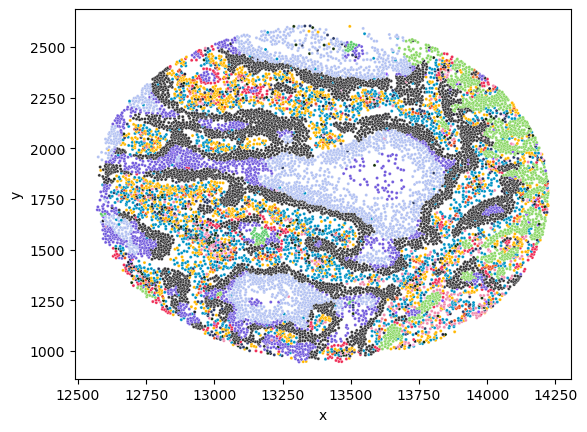

In [33]:
sample = protein[protein['unique_core']=='TMA_A_A6']
ax = sns.scatterplot(data =sample, x = 'x', y= 'y', hue='nb_immune', palette = color_dict,
                    legend=False, s=5)
fig = ax.get_figure()
fig.savefig('spatialmap_proteinexp_A6.png')

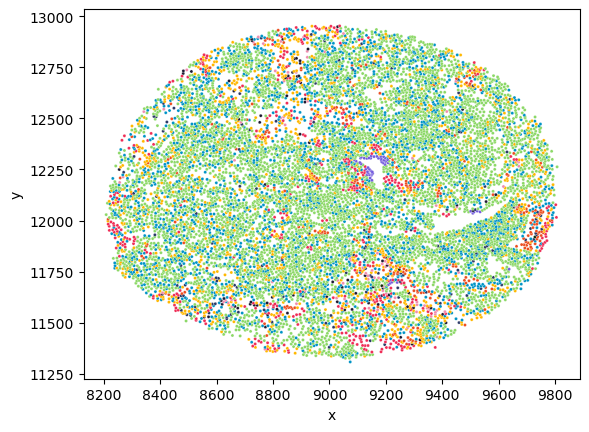

In [28]:
sample = protein[protein['unique_core']=='TMA_A_E4']
ax = sns.scatterplot(data =sample, x = 'x', y= 'y', hue='nb_immune', palette = color_dict,
                    legend=False, s=5)
fig = ax.get_figure()
fig.savefig('spatialmap_proteinexp_AE4.png')

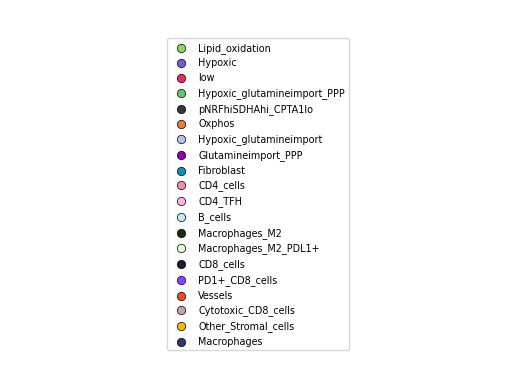

In [72]:
fig, ax = plt.subplots()

for label, color in color_dict.items():
    ax.scatter([], [], c=color, label=label, marker='o',edgecolors='black', linewidths=0.5)

ax.legend(loc='center', ncol=1, fontsize='x-small')
ax.axis('off')
plt.savefig('legend_nbimmune.svg')
plt.show()


### MDI without 2.0 

In [40]:
library_ids = adata.obs['unique_core'].unique().tolist()

# Define the sequence of scales
scales = [4., 8., 16., 24., 32., 48., 64., 72.]

mdi_results_2 = eco.calculate_MDI(spatial_data=adata,
                                scales=scales,
                                library_key='unique_core',
                                library_id=library_ids,
                                spatial_key='spatial',
                                cluster_key='CT_metatumour_funcimmu',
                                selecting_scale=True,
                                random_patch=False,
                                plotfigs=False,
                                savefigs=False,
                                patch_kwargs={'random_seed': None, 'min_points':2},
                                other_kwargs={'metric': 'Shannon Diversity'})

Processing region: TMA_A_A8 at scale 2.0
0.000 per cent patches are empty
TMA_A_A8 at scale 2.0 has 0 patches with zero diveristy
TMA_A_A8 at scale 2.0 diversity is 3.1669494901557584
Processing region: TMA_A_B8 at scale 2.0
0.000 per cent patches are empty
TMA_A_B8 at scale 2.0 has 0 patches with zero diveristy
TMA_A_B8 at scale 2.0 diversity is 2.935447304537931
Processing region: TMA_A_C8 at scale 2.0
0.000 per cent patches are empty
TMA_A_C8 at scale 2.0 has 0 patches with zero diveristy
TMA_A_C8 at scale 2.0 diversity is 2.8647457468922557
Processing region: TMA_A_D8 at scale 2.0
0.000 per cent patches are empty
TMA_A_D8 at scale 2.0 has 0 patches with zero diveristy
TMA_A_D8 at scale 2.0 diversity is 2.689968996022446
Processing region: TMA_A_E8 at scale 2.0
0.000 per cent patches are empty
TMA_A_E8 at scale 2.0 has 0 patches with zero diveristy
TMA_A_E8 at scale 2.0 diversity is 2.341114530690173
Processing region: TMA_A_F8 at scale 2.0
0.000 per cent patches are empty
TMA_A_F8 

In [44]:
# Add 'Condition' and 'Sample_id' to the columns
#mdi_results['Condition'] = ' '
mdi_results_2['unique_core'] = mdi_results_2.index

# Map histology 
#mdi_results.loc[mdi_results.index.str.contains('BALBc'), 'Condition'] = 'BALBc'
#mdi_results.loc[mdi_results.index.str.contains('MRL'), 'Condition'] = 'MRL'
mdi_results_2

2.0       4.0       8.0      16.0      24.0      32.0  \
TMA_A_A8 -0.333333   0.34678  0.462303  0.583392  0.614163  0.579348   
TMA_A_B8 -0.333333  0.359035  0.258656  0.603112  0.618992  0.532495   
TMA_A_C8 -0.333333 -0.075814   0.37885  0.609377  0.567877  0.491677   
TMA_A_D8 -0.333333   0.02814   0.43427  0.553599  0.571702  0.457956   
TMA_A_E8 -0.333333 -0.010172  0.303651  0.563567  0.573611   0.50483   
...            ...       ...       ...       ...       ...       ...   
TMA_B_J2 -0.333333 -0.176669  0.108341  0.597057  0.637786  0.644832   
TMA_B_J3 -0.333333 -0.064451 -0.025468  0.531933  0.593937  0.617345   
TMA_B_J4 -0.333333 -0.152544  0.112564  0.656594  0.711155  0.715928   
TMA_B_J7 -0.333333   0.05726  0.097492  0.638815  0.729386  0.752155   
TMA_B_J8 -0.333333  0.214916 -0.006723  0.516529  0.577688  0.557429   

              48.0      64.0      72.0     Slope unique_core  
TMA_A_A8  0.442043  0.304211  0.261788 -0.082479    TMA_A_A8  
TMA_A_B8  0.348013  0.176081  0.138748 -0.065259    TMA_A_B8  
TMA_A_C8  0.274597  0.144985  0.094102 -0.083662    TMA_A_C8  
TMA_A_D8  0.262921  0.141835  0.095333 -0.071300    TMA_A_D8  
TMA_A_E8  0.385618   0.25467  0.211045 -0.105081    TMA_A_E8  
...            ...       ...       ...       ...         ...  
TMA_B_J2  0.561978   0.39198  0.313303 -0.159643    TMA_B_J2  
TMA_B_J3  0.542092  0.439792  0.377573 -0.162283    TMA_B_J3  
TMA_B_J4  0.658589  0.504217   0.44744 -0.184092    TMA_B_J4  
TMA_B_J7  0.722827  0.599991  0.523311 -0.185260    TMA_B_J7  
TMA_B_J8  0.430421  0.338154  0.311434 -0.118289    TMA_B_J8  

[119 rows x 11 columns]

In [ ]:
mdi_results_2

In [42]:
mdi_results_2.to_csv('./Metabolic_entropy/metabolicnb_mdi_2.csv')

In [ ]:
mdi_results_2

In [115]:
mapping = {'relapse'{'TMA_A_A1':'0.0',
 'TMA_A_A2':'1.0',
 'TMA_A_A3':'1.0',
 'TMA_A_A4':'0.0',
 'TMA_A_A5':'1.0',
 'TMA_A_A6':'1.0',
 'TMA_A_A7':'1.0',
 'TMA_A_A8':'0.0',
 'TMA_A_B2':'1.0',
 'TMA_A_B3':'1.0',
 'TMA_A_B4':'0.0',
 'TMA_A_B5':'1.0',
 'TMA_A_B6':'1.0',
 'TMA_A_B7':'1.0',
 'TMA_A_B8':'0.0',
 'TMA_A_C1':'0.0',
 'TMA_A_C2':'1.0',
 'TMA_A_C3':'1.0',
 'TMA_A_C4':'0.0',
 'TMA_A_C5':'0.0',
 'TMA_A_C6':'1.0',
 'TMA_A_C7':'1.0',
 'TMA_A_C8':'0.0',
 'TMA_A_D1':'0.0',
 'TMA_A_D5':'0.0',
 'TMA_A_D6':'1.0',
 'TMA_A_D7':'1.0',
 'TMA_A_D8':'0.0',
 'TMA_A_E1':'0.0',
 'TMA_A_E3':'0.0',
 t
 'TMA_A_E5':'0.0',
 'TMA_A_E6':'1.0',
 'TMA_A_E7':'1.0',
 'TMA_A_E8':'0.0',
 'TMA_A_F1':'0.0',
 'TMA_A_F3':'0.0',
 'TMA_A_F4':'1.0',
 'TMA_A_F5':'0.0',
 'TMA_A_F6':'1.0',
 'TMA_A_F7':'1.0',
 'TMA_A_F8':'0.0',
 'TMA_A_G1':'0.0',
 'TMA_A_G2':'1.0',
 'TMA_A_G3':'0.0',
 'TMA_A_G4':'0.0',
 'TMA_A_G5':'0.0',
 'TMA_A_G6':'1.0',
 'TMA_A_G7':'0.0',
 'TMA_A_G8':'1.0',
 'TMA_A_H1':'0.0',
 'TMA_A_H2':'1.0',
 'TMA_A_H5':'0.0',
 'TMA_A_H6':'1.0',
 'TMA_A_H7':'0.0',
 'TMA_A_H8':'1.0',
 'TMA_A_I2':'1.0',
 'TMA_A_I3':'1.0',
 'TMA_A_I4':'0.0',
 'TMA_A_I5':'1.0',
 'TMA_A_I6':'0.0',
 'TMA_A_I7':'0.0',
 'TMA_A_I8':'1.0',
 'TMA_A_J2':'1.0',
 'TMA_A_J4':'0.0',
 'TMA_A_J5':'1.0',
 'TMA_A_J6':'0.0',
 'TMA_A_J7':'0.0',
 'TMA_B_A1':'1.0',
 'TMA_B_A2':'0.0',
 'TMA_B_A6':'0.0',
 'TMA_B_A8':'0.0',
 'TMA_B_B1':'1.0',
 'TMA_B_B2':'0.0',
 'TMA_B_B6':'0.0',
 'TMA_B_B8':'0.0',
 'TMA_B_C1':'0.0',
 'TMA_B_C2':'0.0',
 'TMA_B_C3':'1.0',
 'TMA_B_C5':'0.0',
 'TMA_B_C6':'0.0',
 'TMA_B_C7':'0.0',
 'TMA_B_C8':'0.0',
 'TMA_B_D1':'0.0',
 'TMA_B_D2':'0.0',
 'TMA_B_D3':'1.0',
 'TMA_B_D4':'1.0',
 'TMA_B_D6':'0.0',
 'TMA_B_D7':'0.0',
 'TMA_B_D8':'0.0',
 'TMA_B_E2':'1.0',
 'TMA_B_E3':'0.0',
 'TMA_B_E4':'0.0',
 'TMA_B_E5':'1.0',
 'TMA_B_E8':'1.0',
 'TMA_B_F2':'1.0',
 'TMA_B_F3':'0.0',
 'TMA_B_F4':'0.0',
 'TMA_B_F5':'1.0',
 'TMA_B_F8':'1.0',
 'TMA_B_G1':'1.0',
 'TMA_B_G3':'0.0',
 'TMA_B_G4':'0.0',
 'TMA_B_G5':'0.0',
 'TMA_B_G6':'1.0',
 'TMA_B_G7':'0.0',
 'TMA_B_H4':'0.0',
 'TMA_B_H5':'0.0',
 'TMA_B_H6':'1.0',
 'TMA_B_H7':'0.0',
 'TMA_B_I2':'1.0',
 'TMA_B_I3':'0.0',
 'TMA_B_I7':'0.0',
 'TMA_B_I8':'1.0',
 'TMA_B_J2':'1.0',
 'TMA_B_J3':'0.0',
 'TMA_B_J4':'1.0',
 'TMA_B_J7':'0.0',
 'TMA_B_J8':'1.0'}}

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1955665501.py, line 1)

In [116]:
histology = {'TMA_A_A1':'Adenocarcinoma',
 'TMA_A_A2':'Squamous',
 'TMA_A_A3':'Adenocarcinoma',
 'TMA_A_A4':'Adenocarcinoma',
 'TMA_A_A5':'Squamous',
 'TMA_A_A6':'Squamous',
 'TMA_A_A7':'Adenocarcinoma',
 'TMA_A_A8':'Adenocarcinoma',
 'TMA_A_B2':'Squamous',
 'TMA_A_B3':'Adenocarcinoma',
 'TMA_A_B4':'Adenocarcinoma',
 'TMA_A_B5':'Squamous',
 'TMA_A_B6':'Squamous',
 'TMA_A_B7':'Adenocarcinoma',
 'TMA_A_B8':'Adenocarcinoma',
 'TMA_A_C1':'Adenocarcinoma',
 'TMA_A_C2':'Adenocarcinoma',
 'TMA_A_C3':'Squamous',
 'TMA_A_C4':'Adenocarcinoma',
 'TMA_A_C5':'Adenocarcinoma',
 'TMA_A_C6':'Adenocarcinoma',
 'TMA_A_C7':'Adenocarcinoma',
 'TMA_A_C8':'Adenocarcinoma',
 'TMA_A_D1':'Adenocarcinoma',
 'TMA_A_D5':'Adenocarcinoma',
 'TMA_A_D6':'Adenocarcinoma',
 'TMA_A_D7':'Adenocarcinoma',
 'TMA_A_D8':'Adenocarcinoma',
 'TMA_A_E1':'Squamous',
 'TMA_A_E3':'Adenocarcinoma',
 'TMA_A_E4':'Large cell',
 'TMA_A_E5':'Adenocarcinoma',
 'TMA_A_E6':'Squamous',
 'TMA_A_E7':'Adenocarcinoma',
 'TMA_A_E8':'Squamous',
 'TMA_A_F1':'Squamous',
 'TMA_A_F3':'Adenocarcinoma',
 'TMA_A_F4':'Large cell',
 'TMA_A_F5':'Adenocarcinoma',
 'TMA_A_F6':'Squamous',
 'TMA_A_F7':'Adenocarcinoma',
 'TMA_A_F8':'Squamous',
 'TMA_A_G1':'Squamous',
 'TMA_A_G2':'Adenocarcinoma',
 'TMA_A_G3':'Adenocarcinoma',
 'TMA_A_G4':'Adenocarcinoma',
 'TMA_A_G5':'Adenocarcinoma',
 'TMA_A_G6':'Adenocarcinoma',
 'TMA_A_G7':'Adenocarcinoma',
 'TMA_A_G8':'Adenocarcinoma',
 'TMA_A_H1':'Squamous',
 'TMA_A_H2':'Adenocarcinoma',
 'TMA_A_H5':'Adenocarcinoma',
 'TMA_A_H6':'Adenocarcinoma',
 'TMA_A_H7':'Adenocarcinoma',
 'TMA_A_H8':'Adenocarcinoma',
 'TMA_A_I2':'Adenocarcinoma',
 'TMA_A_I3':'Adenocarcinoma',
 'TMA_A_I4':'Large cell',
 'TMA_A_I5':'Adenocarcinoma',
 'TMA_A_I6':'Adenocarcinoma',
 'TMA_A_I7':'Adenocarcinoma',
 'TMA_A_I8':'Adenocarcinoma',
 'TMA_A_J2':'Adenocarcinoma',
 'TMA_A_J4':'Large cell',
 'TMA_A_J5':'Adenocarcinoma',
 'TMA_A_J6':'Adenocarcinoma',
 'TMA_A_J7':'Adenocarcinoma',
 'TMA_B_A1':'Adenocarcinoma',
 'TMA_B_A2':'Squamous',
 'TMA_B_A6':'Adenocarcinoma',
 'TMA_B_A8':'Adenocarcinoma',
 'TMA_B_B1':'Adenocarcinoma',
 'TMA_B_B2':'Squamous',
 'TMA_B_B6':'Adenocarcinoma',
 'TMA_B_B8':'Adenocarcinoma',
 'TMA_B_C1':'Squamous',
 'TMA_B_C2':'Squamous',
 'TMA_B_C3':'Adenocarcinoma',
 'TMA_B_C5':'Adenocarcinoma',
 'TMA_B_C6':'Adenosquamous',
 'TMA_B_C7':'Adenocarcinoma',
 'TMA_B_C8':'Adenocarcinoma',
 'TMA_B_D1':'Squamous',
 'TMA_B_D2':'Squamous',
 'TMA_B_D3':'Adenocarcinoma',
 'TMA_B_D4':'Adenocarcinoma',
 'TMA_B_D6':'Adenosquamous',
 'TMA_B_D7':'Adenocarcinoma',
 'TMA_B_D8':'Adenocarcinoma',
 'TMA_B_E2':'Adenocarcinoma',
 'TMA_B_E3':'Adenocarcinoma',
 'TMA_B_E4':'Adenocarcinoma',
 'TMA_B_E5':'Adenocarcinoma',
 'TMA_B_E8':'Adenocarcinoma',
 'TMA_B_F2':'Adenocarcinoma',
 'TMA_B_F3':'Adenocarcinoma',
 'TMA_B_F4':'Adenocarcinoma',
 'TMA_B_F5':'Adenocarcinoma',
 'TMA_B_F8':'Adenocarcinoma',
 'TMA_B_G1':'Squamous',
 'TMA_B_G3':'Large cell',
 'TMA_B_G4':'Squamous',
 'TMA_B_G5':'Adenocarcinoma',
 'TMA_B_G6':'Adenocarcinoma',
 'TMA_B_G7':'Adenocarcinoma',
 'TMA_B_H4':'Squamous',
 'TMA_B_H5':'Adenocarcinoma',
 'TMA_B_H6':'Adenocarcinoma',
 'TMA_B_H7':'Adenocarcinoma',
 'TMA_B_I2':'Adenocarcinoma',
 'TMA_B_I3':'Adenocarcinoma',
 'TMA_B_I7':'Adenocarcinoma',
 'TMA_B_I8':'Adenocarcinoma',
 'TMA_B_J2':'Adenocarcinoma',
 'TMA_B_J3':'Adenocarcinoma',
 'TMA_B_J4':'Adenocarcinoma',
 'TMA_B_J7':'Adenocarcinoma',
 'TMA_B_J8':'Adenocarcinoma'}

In [46]:
df1_unique = adata.obs.drop_duplicates(subset='unique_core', keep='first')

# Merge df1_unique (only unique patients) with df2 on the 'patient' column
mdi_results_2 = pd.merge(mdi_results_2, df1_unique[['unique_core', 'Histology','Relapse']], on='unique_core', how='left')


# View the resulting dataframe
print(mdi_results_2)


          2.0       4.0       8.0      16.0      24.0      32.0      48.0  \
0   -0.333333   0.34678  0.462303  0.583392  0.614163  0.579348  0.442043   
1   -0.333333  0.359035  0.258656  0.603112  0.618992  0.532495  0.348013   
2   -0.333333 -0.075814   0.37885  0.609377  0.567877  0.491677  0.274597   
3   -0.333333   0.02814   0.43427  0.553599  0.571702  0.457956  0.262921   
4   -0.333333 -0.010172  0.303651  0.563567  0.573611   0.50483  0.385618   
..        ...       ...       ...       ...       ...       ...       ...   
114 -0.333333 -0.176669  0.108341  0.597057  0.637786  0.644832  0.561978   
115 -0.333333 -0.064451 -0.025468  0.531933  0.593937  0.617345  0.542092   
116 -0.333333 -0.152544  0.112564  0.656594  0.711155  0.715928  0.658589   
117 -0.333333   0.05726  0.097492  0.638815  0.729386  0.752155  0.722827   
118 -0.333333  0.214916 -0.006723  0.516529  0.577688  0.557429  0.430421   

         64.0      72.0     Slope unique_core       Histology Relapse  
0  

In [42]:
mdi_results_2.to_csv('./Metabolic_entropy/metabolicnb_mdi_2.csv')